# Chapter 11: Sampling and Statistical Inference in Behavioral Psychology

This chapter explores sampling methods and statistical inference through the lens of behavioral psychology. We'll examine how these concepts apply to real-world research scenarios in cognitive psychology, perception, reaction time studies, and other behavioral measures. Each concept will be explained with clear mathematical formulas, detailed examples, and visual illustrations.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import pandas as pd
from IPython.display import Markdown, display
import warnings
warnings.filterwarnings("ignore")


# Set plotting parameters
plt.rcParams['figure.dpi'] = 300
plt.style.use('seaborn-v0_8-whitegrid')

## 1. Introduction to Sampling in Behavioral Research

Sampling is fundamental to psychological research as we rarely can study entire populations. Understanding sampling methods helps researchers:
- Make valid inferences about populations
- Control for selection bias
- Determine appropriate sample sizes
- Account for sampling error in their conclusions

### 1.1 Population vs. Sample

In psychology research, we typically want to draw conclusions about a **population** (the entire group of interest) but we can only collect data from a **sample** (a subset of that population).

For example, if we're studying anxiety disorders, our population might be "all adults with generalized anxiety disorder," but our sample might be "150 adults diagnosed with generalized anxiety disorder who participated in our study."

### 1.2 Key Sampling Concepts

When collecting samples, several important statistical concepts arise:

- **Population parameters**: The true values in the population (typically unknown)
- **Sample statistics**: Values calculated from our sample (our best estimates of population parameters)
- **Sampling error**: The difference between sample statistics and population parameters
- **Sampling distribution**: The theoretical distribution of a statistic across repeated samples

### 1.3 Notation and Terminology

We use specific notation to distinguish between population parameters and sample statistics:

| Measure | Population Parameter | Sample Statistic |
|---------|----------------------|-----------------|
| Mean | $\mu$ (mu) | $\bar{X}$ (x-bar) |
| Standard Deviation | $\sigma$ (sigma) | $s$ |
| Variance | $\sigma^2$ | $s^2$ |
| Proportion | $P$ | $p$ |
| Correlation | $\rho$ (rho) | $r$ |

Let's create a visual example of population vs. sample means:

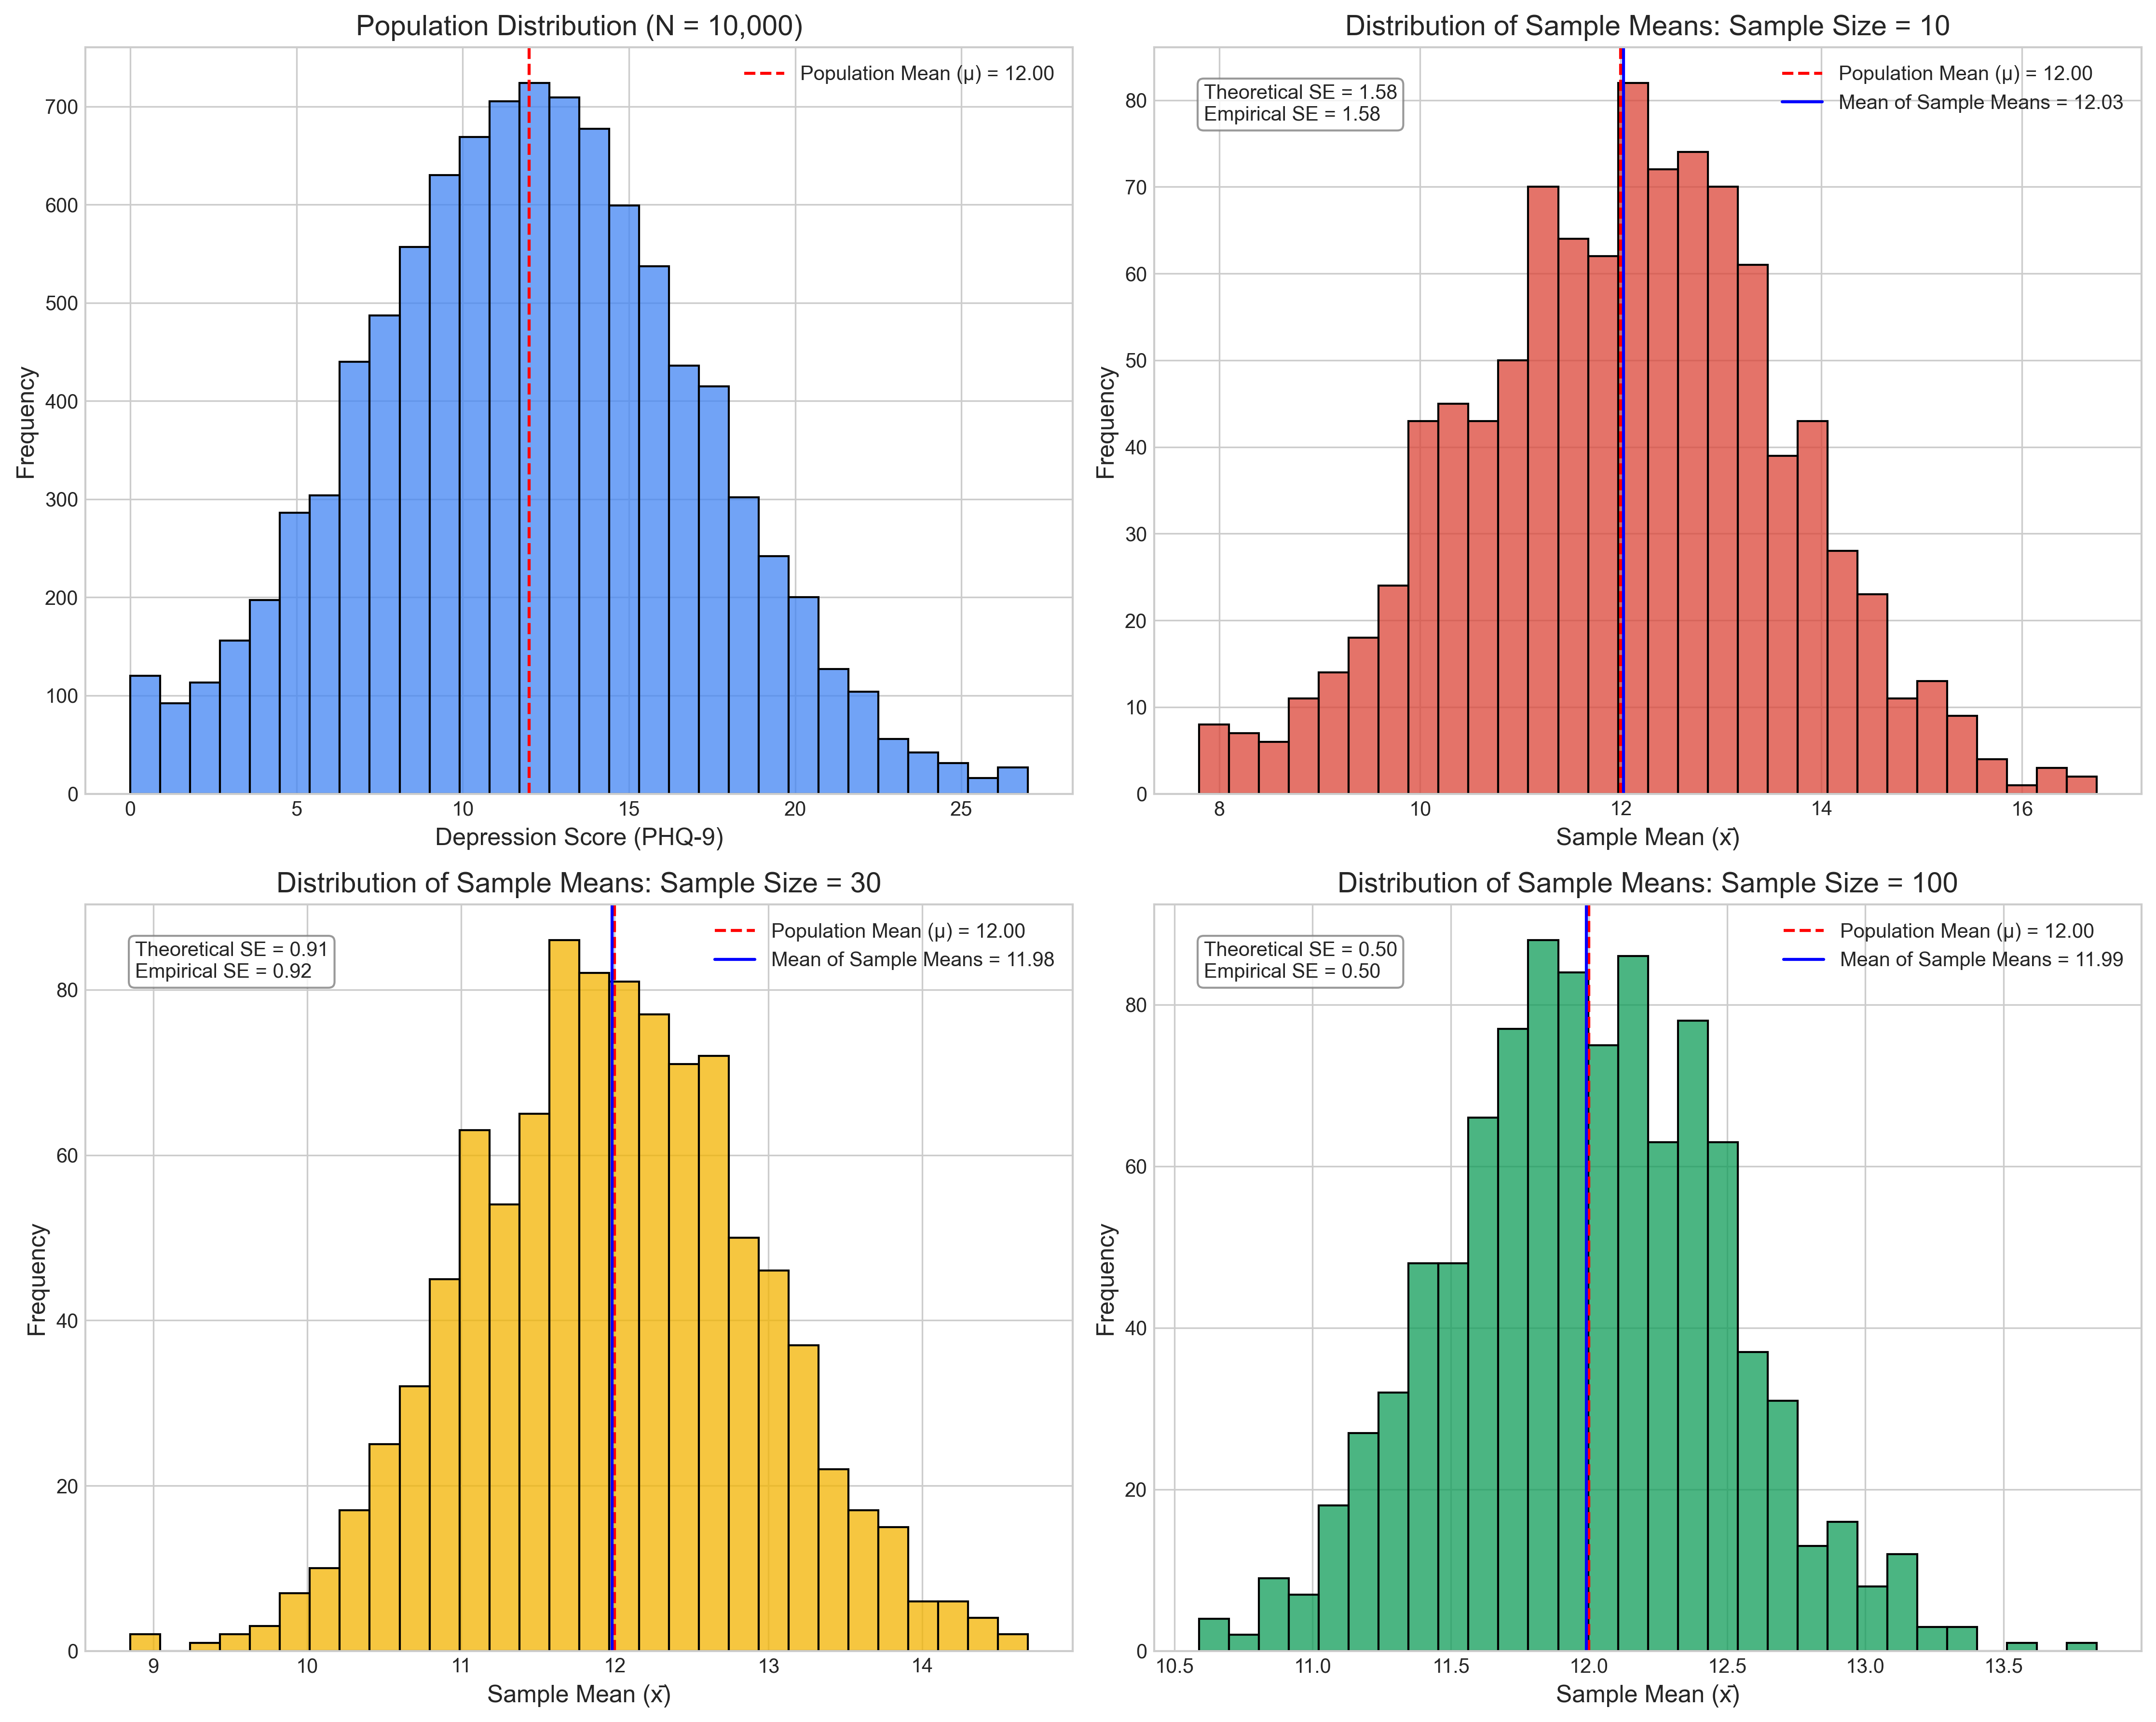

Key observations about sampling distributions:

Sample size = 10:
  Mean of sample means = 12.0294
  Standard deviation of sample means (SE) = 1.5806
  Theoretical standard error = 1.5811
  95% of sample means fall between 8.7481 and 15.0879

Sample size = 30:
  Mean of sample means = 11.9828
  Standard deviation of sample means (SE) = 0.9238
  Theoretical standard error = 0.9129
  95% of sample means fall between 10.2211 and 13.7710

Sample size = 100:
  Mean of sample means = 11.9905
  Standard deviation of sample means (SE) = 0.4967
  Theoretical standard error = 0.5000
  95% of sample means fall between 11.0795 and 12.9925


In [2]:
# Generate a population of depression scores (0-27 scale, PHQ-9)
np.random.seed(42)
population_size = 10000
population_mean = 12  # True population mean
population_sd = 5     # True population standard deviation

# Generate the population (bounded between 0-27)
population_data = np.clip(np.random.normal(population_mean, population_sd, population_size), 0, 27)

# Function to take random samples and calculate their means
def take_samples(population, sample_size, n_samples):
    sample_means = []
    for _ in range(n_samples):
        sample = np.random.choice(population, size=sample_size, replace=False)
        sample_means.append(np.mean(sample))
    return sample_means

# Take multiple samples of different sizes
sample_sizes = [10, 30, 100]
n_samples = 1000
all_sample_means = [take_samples(population_data, size, n_samples) for size in sample_sizes]

# Plotting
fig, axes = plt.subplots(2, 2, figsize=(15, 12))

# Plot the population distribution
sns.histplot(population_data, bins=30, ax=axes[0, 0], color='#4285F4')
axes[0, 0].axvline(population_mean, color='red', linestyle='--', 
                   label=f'Population Mean (μ) = {np.mean(population_data):.2f}')
axes[0, 0].set_title('Population Distribution (N = 10,000)', fontsize=14)
axes[0, 0].set_xlabel('Depression Score (PHQ-9)', fontsize=12)
axes[0, 0].set_ylabel('Frequency', fontsize=12)
axes[0, 0].legend(fontsize=10)

# Plot sample means for different sample sizes
colors = ['#DB4437', '#F4B400', '#0F9D58']
titles = ['Sample Size = 10', 'Sample Size = 30', 'Sample Size = 100']
positions = [(0, 1), (1, 0), (1, 1)]

for i, (means, color, title, pos) in enumerate(zip(all_sample_means, colors, titles, positions)):
    ax = axes[pos]
    sns.histplot(means, bins=30, ax=ax, color=color)
    ax.axvline(population_mean, color='red', linestyle='--', 
              label=f'Population Mean (μ) = {population_mean:.2f}')
    ax.axvline(np.mean(means), color='blue', linestyle='-', 
              label=f'Mean of Sample Means = {np.mean(means):.2f}')
    ax.set_title(f'Distribution of Sample Means: {title}', fontsize=14)
    ax.set_xlabel('Sample Mean (x̄)', fontsize=12)
    ax.set_ylabel('Frequency', fontsize=12)
    ax.legend(fontsize=10)
    
    # Add standard error annotation
    theoretical_se = population_sd / np.sqrt(sample_sizes[i])
    empirical_se = np.std(means)
    ax.annotate(f"Theoretical SE = {theoretical_se:.2f}\nEmpirical SE = {empirical_se:.2f}",
               xy=(0.05, 0.95), xycoords='axes fraction', 
               bbox=dict(boxstyle="round,pad=0.3", fc="white", ec="gray", alpha=0.8),
               ha='left', va='top', fontsize=10)

plt.tight_layout()
plt.show()

# Print key findings about the sampling distributions
print("Key observations about sampling distributions:")
for i, size in enumerate(sample_sizes):
    means = all_sample_means[i]
    print(f"\nSample size = {size}:")
    print(f"  Mean of sample means = {np.mean(means):.4f}")
    print(f"  Standard deviation of sample means (SE) = {np.std(means):.4f}")
    print(f"  Theoretical standard error = {population_sd/np.sqrt(size):.4f}")
    print(f"  95% of sample means fall between {np.percentile(means, 2.5):.4f} and {np.percentile(means, 97.5):.4f}")

### 1.4 Central Limit Theorem in Psychological Research

The **Central Limit Theorem (CLT)** is one of the most important concepts in statistical inference. It states that regardless of the shape of the population distribution, the sampling distribution of the mean will be approximately normally distributed if the sample size is sufficiently large.

Formally, if we have:
- A population with mean $\mu$ and standard deviation $\sigma$
- Random samples of size $n$

Then, as $n$ increases, the sampling distribution of $\bar{X}$ approaches a normal distribution with:
- Mean $\mu_{\bar{X}} = \mu$
- Standard deviation $\sigma_{\bar{X}} = \frac{\sigma}{\sqrt{n}}$ (This is known as the **standard error of the mean**)

The demonstration above shows the CLT in action. Even though individual depression scores have a skewed distribution, the sampling distribution of means becomes more normal as sample size increases, and the standard deviation of this distribution decreases as predicted by the formula $\sigma_{\bar{X}} = \frac{\sigma}{\sqrt{n}}$.

This has profound implications for psychological research, allowing us to use normal-based statistical methods even when our raw data isn't normally distributed, as long as our samples are sufficiently large.

## 2. Sampling Methods in Practice

Let's explore different sampling methods through a visual search experiment example. In this study, participants need to find a target stimulus among distractors, and we measure their reaction times.

### 2.1 Common Sampling Methods

There are several ways to select participants for psychological studies:

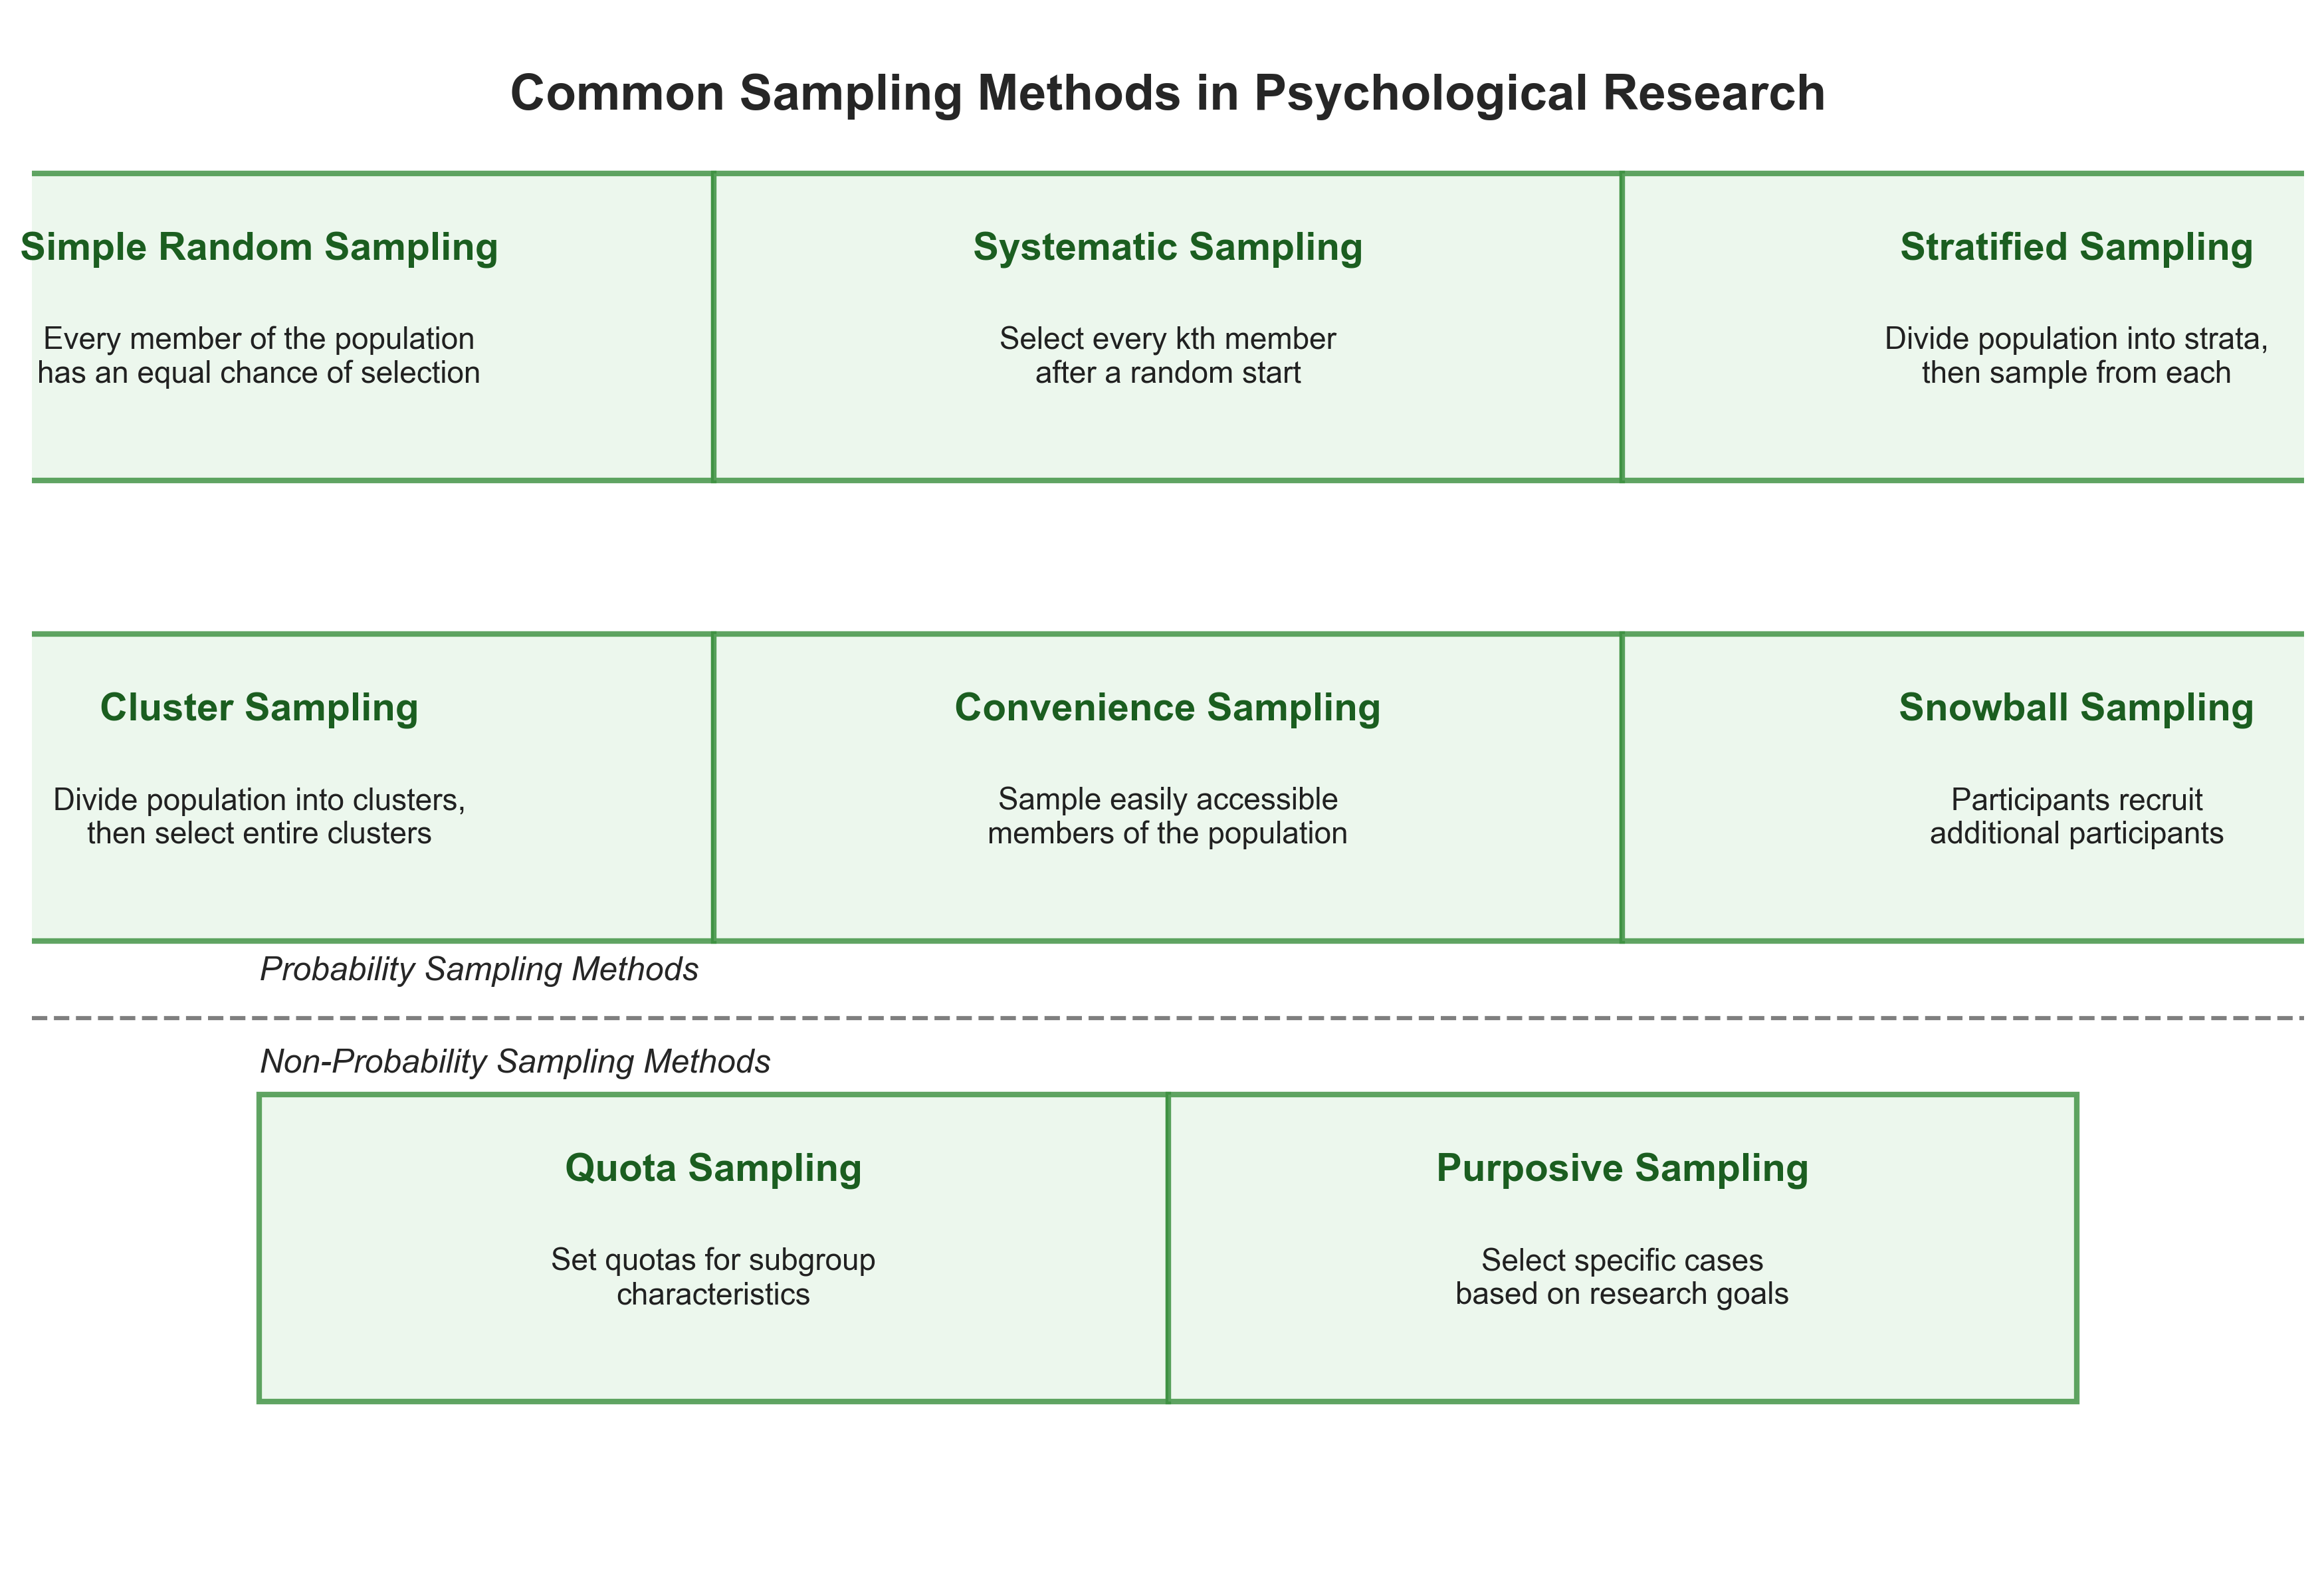

In [3]:
# Display a diagram explaining sampling methods
def sampling_methods_diagram():
    # Create figure and axis
    fig, ax = plt.subplots(figsize=(12, 8))
    ax.set_xlim(0, 10)
    ax.set_ylim(0, 10)
    ax.axis('off')
    
    # Title
    ax.text(5, 9.5, 'Common Sampling Methods in Psychological Research', 
            ha='center', va='center', fontsize=18, fontweight='bold')
    
    # Draw boxes for the different methods
    methods = [
        (1, 8, 'Simple Random Sampling', 
         'Every member of the population\nhas an equal chance of selection'),
        (5, 8, 'Systematic Sampling',
         'Select every kth member\nafter a random start'),
        (9, 8, 'Stratified Sampling',
         'Divide population into strata,\nthen sample from each'),
        (1, 5, 'Cluster Sampling',
         'Divide population into clusters,\nthen select entire clusters'),
        (5, 5, 'Convenience Sampling',
         'Sample easily accessible\nmembers of the population'),
        (9, 5, 'Snowball Sampling',
         'Participants recruit\nadditional participants'),
        (3, 2, 'Quota Sampling',
         'Set quotas for subgroup\ncharacteristics'),
        (7, 2, 'Purposive Sampling',
         'Select specific cases\nbased on research goals')
    ]
    
    for x, y, title, desc in methods:
        # Draw box
        rect = plt.Rectangle((x-2, y-1), 4, 2, facecolor='#E8F5E9', 
                             edgecolor='#388E3C', alpha=0.8, linewidth=2)
        ax.add_patch(rect)
        
        # Add title and description
        ax.text(x, y+0.5, title, ha='center', va='center', 
                fontsize=14, fontweight='bold', color='#1B5E20')
        ax.text(x, y-0.2, desc, ha='center', va='center', 
                fontsize=11, color='#212121')
    
    # Add classification lines
    # Probability vs. Non-probability
    ax.plot([0, 10], [3.5, 3.5], 'k--', alpha=0.5)
    ax.text(1, 3.7, 'Probability Sampling Methods', ha='left', va='bottom', 
            fontsize=12, fontstyle='italic')
    ax.text(1, 3.3, 'Non-Probability Sampling Methods', ha='left', va='top', 
            fontsize=12, fontstyle='italic')
    
    plt.tight_layout()
    plt.show()

# Display the diagram
sampling_methods_diagram()

Now let's implement and compare three of the most common probability sampling methods using a visual search experiment example:

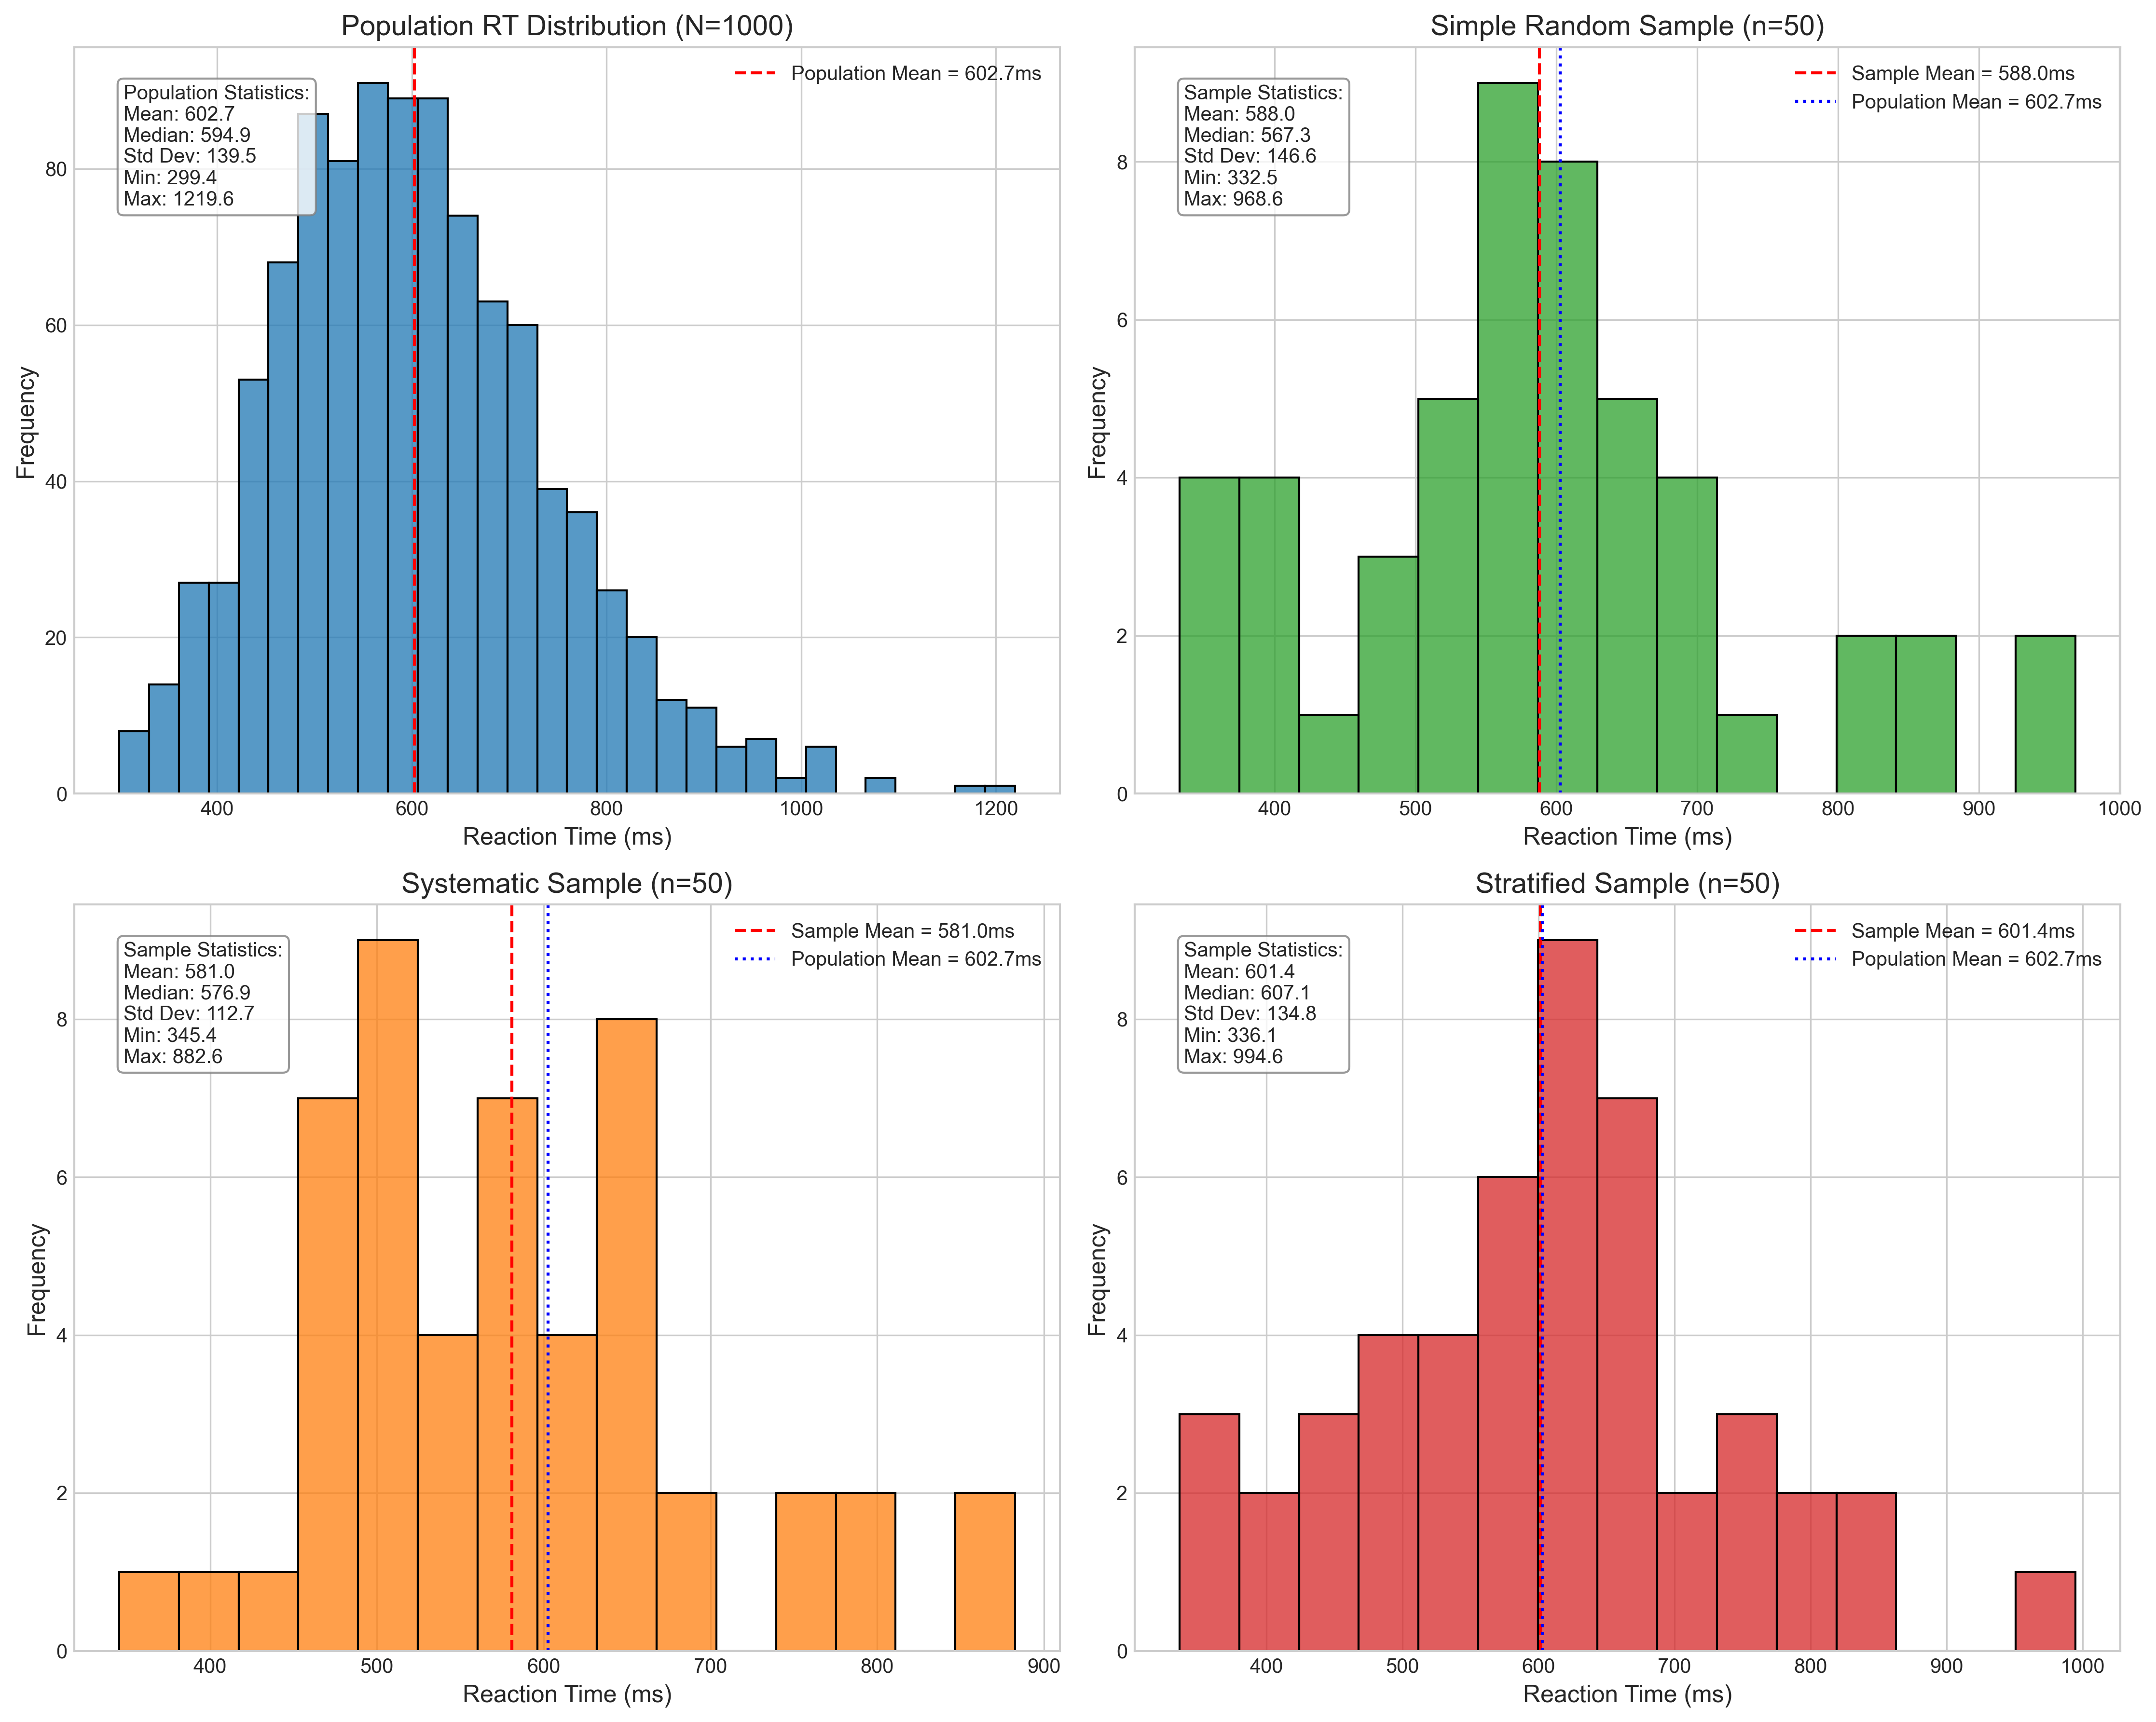

Sampling Errors (compared to population mean):

Simple Random Sampling:
  Absolute Error: 14.76 ms
  Percentage Error: 2.45%

Systematic Sampling:
  Absolute Error: 21.73 ms
  Percentage Error: 3.61%

Stratified Sampling:
  Absolute Error: 1.28 ms
  Percentage Error: 0.21%


In [4]:
# Simulate reaction time data for a visual search task
np.random.seed(42)

# Population parameters
n_population = 1000
mean_rt = 500  # mean reaction time in milliseconds
std_rt = 100   # standard deviation

# Generate population data (ex-Gaussian distribution for RT)
# The ex-Gaussian is a common distribution for reaction times
# It's a convolution of a normal and an exponential distribution
normal_component = np.random.normal(mean_rt, std_rt, n_population)
exponential_component = np.random.exponential(100, n_population)  # tau parameter = 100ms
population_rt = normal_component + exponential_component

# Different sampling methods
def simple_random_sample(data, n):
    """Select n items randomly from the population"""
    return np.random.choice(data, size=n, replace=False)

def systematic_sample(data, n):
    """Select every kth item after a random start"""
    # Calculate the step size (k)
    step = len(data) // n
    # Choose a random starting point
    start = np.random.randint(0, step)
    # Take every kth item
    return data[start::step][:n]

def stratified_sample(data, n, strata):
    """Select samples from different strata proportional to their size
    
    Args:
        data: The population data
        n: Total sample size
        strata: List of tuples (lower_bound, upper_bound) defining each stratum
    """
    samples = []
    for stratum in strata:
        # Select data points in this stratum
        mask = (data >= stratum[0]) & (data < stratum[1])
        stratum_data = data[mask]
        
        # Calculate proportional sample size
        stratum_n = int(n * len(stratum_data)/len(data))
        if stratum_n > 0:  # Ensure we have at least one point to sample
            samples.append(np.random.choice(stratum_data, size=stratum_n, replace=False))
    
    return np.concatenate(samples)

# Take samples using different methods
sample_size = 50
simple_sample = simple_random_sample(population_rt, sample_size)
systematic_sample_data = systematic_sample(population_rt, sample_size)

# Define strata for reaction times (fast, medium, slow)
strata = [(0, 500), (500, 750), (750, np.inf)]
stratified_sample_data = stratified_sample(population_rt, sample_size, strata)

# Calculate summary statistics for each
population_stats = {
    'Mean': np.mean(population_rt),
    'Median': np.median(population_rt),
    'Std Dev': np.std(population_rt),
    'Min': np.min(population_rt),
    'Max': np.max(population_rt)
}

sample_stats = {
    'Simple Random': {
        'Mean': np.mean(simple_sample),
        'Median': np.median(simple_sample),
        'Std Dev': np.std(simple_sample),
        'Min': np.min(simple_sample),
        'Max': np.max(simple_sample)
    },
    'Systematic': {
        'Mean': np.mean(systematic_sample_data),
        'Median': np.median(systematic_sample_data),
        'Std Dev': np.std(systematic_sample_data),
        'Min': np.min(systematic_sample_data),
        'Max': np.max(systematic_sample_data)
    },
    'Stratified': {
        'Mean': np.mean(stratified_sample_data),
        'Median': np.median(stratified_sample_data),
        'Std Dev': np.std(stratified_sample_data),
        'Min': np.min(stratified_sample_data),
        'Max': np.max(stratified_sample_data)
    }
}

# Plotting
fig, axes = plt.subplots(2, 2, figsize=(15, 12))

# Population distribution
sns.histplot(population_rt, bins=30, ax=axes[0, 0], color='#1f77b4')
axes[0, 0].axvline(np.mean(population_rt), color='r', linestyle='--', 
                   label=f'Population Mean = {np.mean(population_rt):.1f}ms')
axes[0, 0].set_title('Population RT Distribution (N=1000)', fontsize=14)
axes[0, 0].set_xlabel('Reaction Time (ms)', fontsize=12)
axes[0, 0].set_ylabel('Frequency', fontsize=12)
axes[0, 0].legend(fontsize=10)

# Add population stats annotation
stats_text = '\n'.join([f"{k}: {v:.1f}" for k, v in population_stats.items()])
axes[0, 0].annotate(f"Population Statistics:\n{stats_text}",
                   xy=(0.05, 0.95), xycoords='axes fraction',
                   bbox=dict(boxstyle="round,pad=0.3", fc="white", ec="gray", alpha=0.8),
                   ha='left', va='top', fontsize=10)

# Simple random sample
sns.histplot(simple_sample, bins=15, ax=axes[0, 1], color='#2ca02c')
axes[0, 1].axvline(np.mean(simple_sample), color='r', linestyle='--',
                   label=f'Sample Mean = {np.mean(simple_sample):.1f}ms')
axes[0, 1].axvline(np.mean(population_rt), color='b', linestyle=':',
                   label=f'Population Mean = {np.mean(population_rt):.1f}ms')
axes[0, 1].set_title('Simple Random Sample (n=50)', fontsize=14)
axes[0, 1].set_xlabel('Reaction Time (ms)', fontsize=12)
axes[0, 1].set_ylabel('Frequency', fontsize=12)
axes[0, 1].legend(fontsize=10)

# Add sample stats annotation
stats_text = '\n'.join([f"{k}: {v:.1f}" for k, v in sample_stats['Simple Random'].items()])
axes[0, 1].annotate(f"Sample Statistics:\n{stats_text}",
                   xy=(0.05, 0.95), xycoords='axes fraction',
                   bbox=dict(boxstyle="round,pad=0.3", fc="white", ec="gray", alpha=0.8),
                   ha='left', va='top', fontsize=10)

# Systematic sample
sns.histplot(systematic_sample_data, bins=15, ax=axes[1, 0], color='#ff7f0e')
axes[1, 0].axvline(np.mean(systematic_sample_data), color='r', linestyle='--',
                   label=f'Sample Mean = {np.mean(systematic_sample_data):.1f}ms')
axes[1, 0].axvline(np.mean(population_rt), color='b', linestyle=':',
                   label=f'Population Mean = {np.mean(population_rt):.1f}ms')
axes[1, 0].set_title('Systematic Sample (n=50)', fontsize=14)
axes[1, 0].set_xlabel('Reaction Time (ms)', fontsize=12)
axes[1, 0].set_ylabel('Frequency', fontsize=12)
axes[1, 0].legend(fontsize=10)

# Add sample stats annotation
stats_text = '\n'.join([f"{k}: {v:.1f}" for k, v in sample_stats['Systematic'].items()])
axes[1, 0].annotate(f"Sample Statistics:\n{stats_text}",
                   xy=(0.05, 0.95), xycoords='axes fraction',
                   bbox=dict(boxstyle="round,pad=0.3", fc="white", ec="gray", alpha=0.8),
                   ha='left', va='top', fontsize=10)

# Stratified sample
sns.histplot(stratified_sample_data, bins=15, ax=axes[1, 1], color='#d62728')
axes[1, 1].axvline(np.mean(stratified_sample_data), color='r', linestyle='--',
                   label=f'Sample Mean = {np.mean(stratified_sample_data):.1f}ms')
axes[1, 1].axvline(np.mean(population_rt), color='b', linestyle=':',
                   label=f'Population Mean = {np.mean(population_rt):.1f}ms')
axes[1, 1].set_title('Stratified Sample (n=50)', fontsize=14)
axes[1, 1].set_xlabel('Reaction Time (ms)', fontsize=12)
axes[1, 1].set_ylabel('Frequency', fontsize=12)
axes[1, 1].legend(fontsize=10)

# Add sample stats annotation
stats_text = '\n'.join([f"{k}: {v:.1f}" for k, v in sample_stats['Stratified'].items()])
axes[1, 1].annotate(f"Sample Statistics:\n{stats_text}",
                   xy=(0.05, 0.95), xycoords='axes fraction',
                   bbox=dict(boxstyle="round,pad=0.3", fc="white", ec="gray", alpha=0.8),
                   ha='left', va='top', fontsize=10)

plt.tight_layout()
plt.show()

# Calculate sampling error for each method
def compute_sampling_errors(population, samples_dict):
    pop_mean = np.mean(population)
    errors = {}
    for name, sample in samples_dict.items():
        sample_mean = np.mean(sample)
        abs_error = abs(sample_mean - pop_mean)
        pct_error = (abs_error / pop_mean) * 100
        errors[name] = {
            'Absolute Error': abs_error,
            'Percentage Error': pct_error
        }
    return errors

samples = {
    'Simple Random': simple_sample,
    'Systematic': systematic_sample_data,
    'Stratified': stratified_sample_data
}

errors = compute_sampling_errors(population_rt, samples)

# Print sampling errors
print("Sampling Errors (compared to population mean):")
for method, error in errors.items():
    print(f"\n{method} Sampling:")
    print(f"  Absolute Error: {error['Absolute Error']:.2f} ms")
    print(f"  Percentage Error: {error['Percentage Error']:.2f}%")

### 2.2 Comparing Sampling Methods

Each sampling method has its advantages and limitations in psychological research:

#### 1. Simple Random Sampling
- **Mathematical Representation**: Each element has probability $p = \frac{n}{N}$ of being selected (where $n$ = sample size, $N$ = population size)
- **Advantages**: 
  - Unbiased selection of participants
  - Every participant has equal probability of selection
  - Minimizes selection bias
  - Strong statistical foundation
- **Limitations**:
  - May not adequately represent small subgroups
  - Requires a complete sampling frame (list of all population members)
  - Can be impractical for certain populations
- **Examples in Psychology**: Basic cognitive tasks, survey research in general populations

#### 2. Systematic Sampling
- **Mathematical Representation**: Select every $k$th element where $k = \frac{N}{n}$ (the sampling interval)
- **Advantages**:
  - Easier to implement than simple random sampling
  - Spreads the sample more evenly over the population
  - Efficient for large populations or ongoing recruitment
- **Limitations**:
  - Can introduce bias if there's a periodicity in the population that matches the sampling interval
  - Still requires a complete sampling frame
- **Examples in Psychology**: Selecting participants from a clinic registry, choosing every $k$th person from an ordered list for longitudinal studies

#### 3. Stratified Sampling
- **Mathematical Representation**: Population divided into $H$ strata, and a sample of size $n_h$ is taken from each stratum, where often $n_h = n \times \frac{N_h}{N}$ (proportional allocation)
- **Advantages**:
  - Ensures representation from all important subgroups
  - Can reduce sampling error compared to simple random sampling
  - Allows for separate analysis of subgroups
- **Limitations**:
  - Requires prior knowledge of the stratifying variables
  - More complex to implement
  - May require larger overall sample sizes for small strata
- **Examples in Psychology**: Clinical trials ensuring balanced age groups, cross-cultural studies with proportional representation from different cultural backgrounds

### 2.3 Sampling in Different Types of Psychological Research

Different research areas in psychology often use specific sampling approaches based on their unique requirements:

In [5]:
# Create a table comparing sampling approaches across psychology subdisciplines
import pandas as pd
from IPython.display import display, HTML

sampling_by_field = pd.DataFrame({
    'Research Area': [
        'Cognitive Psychology', 
        'Clinical Psychology',
        'Developmental Psychology',
        'Social Psychology',
        'Neuropsychology'
    ],
    'Common Sampling Methods': [
        'Simple random sampling, Convenience sampling (university students)',
        'Stratified sampling, Purposive sampling, Clinical samples',
        'Stratified sampling by age, Longitudinal cohorts',
        'Cluster sampling, Online convenience sampling',
        'Case-control sampling, Convenience (clinical referrals)'
    ],
    'Special Considerations': [
        'Ensuring sufficient cognitive variability; controlling for age and education',
        'Diagnostic precision; comorbidity; severity levels; treatment history',
        'Age-appropriate measures; dropout in longitudinal designs; cohort effects',
        'Cultural representation; reducing self-selection bias; ecological validity',
        'Lesion specificity; matching controls; rare conditions require purposive sampling'
    ],
    'Example': [
        'Random sampling from university participant pool for a working memory experiment',
        'Stratified sampling ensuring equal representation of mild, moderate, and severe depression',
        'Sampling equal numbers of children at 6, 12, 18, and 24 months for language development study',
        'Cluster sampling of different communities to study collective behavior',
        'Purposive sampling of patients with specific brain lesions matched with healthy controls'
    ]
})

# Display the table with improved formatting
styled_table = sampling_by_field.style.set_properties(**{
    'text-align': 'left',
    'white-space': 'pre-wrap',
    'font-size': '11pt',
    'border': '1px solid gray'
}).set_table_styles([
    {'selector': 'th', 'props': [('font-size', '12pt'), ('text-align', 'center'), 
                                ('font-weight', 'bold'), ('background-color', '#f0f0f0')]},
    {'selector': 'caption', 'props': [('font-size', '14pt'), ('font-weight', 'bold')]}
]).set_caption('Sampling Methods Across Different Fields of Psychology')

display(styled_table)

### 2.4 Assessing Sample Representativeness

A critical question in any psychological study is whether our sample is representative of the target population. Let's explore how to assess and quantify representativeness using a simulated example of an anxiety study.

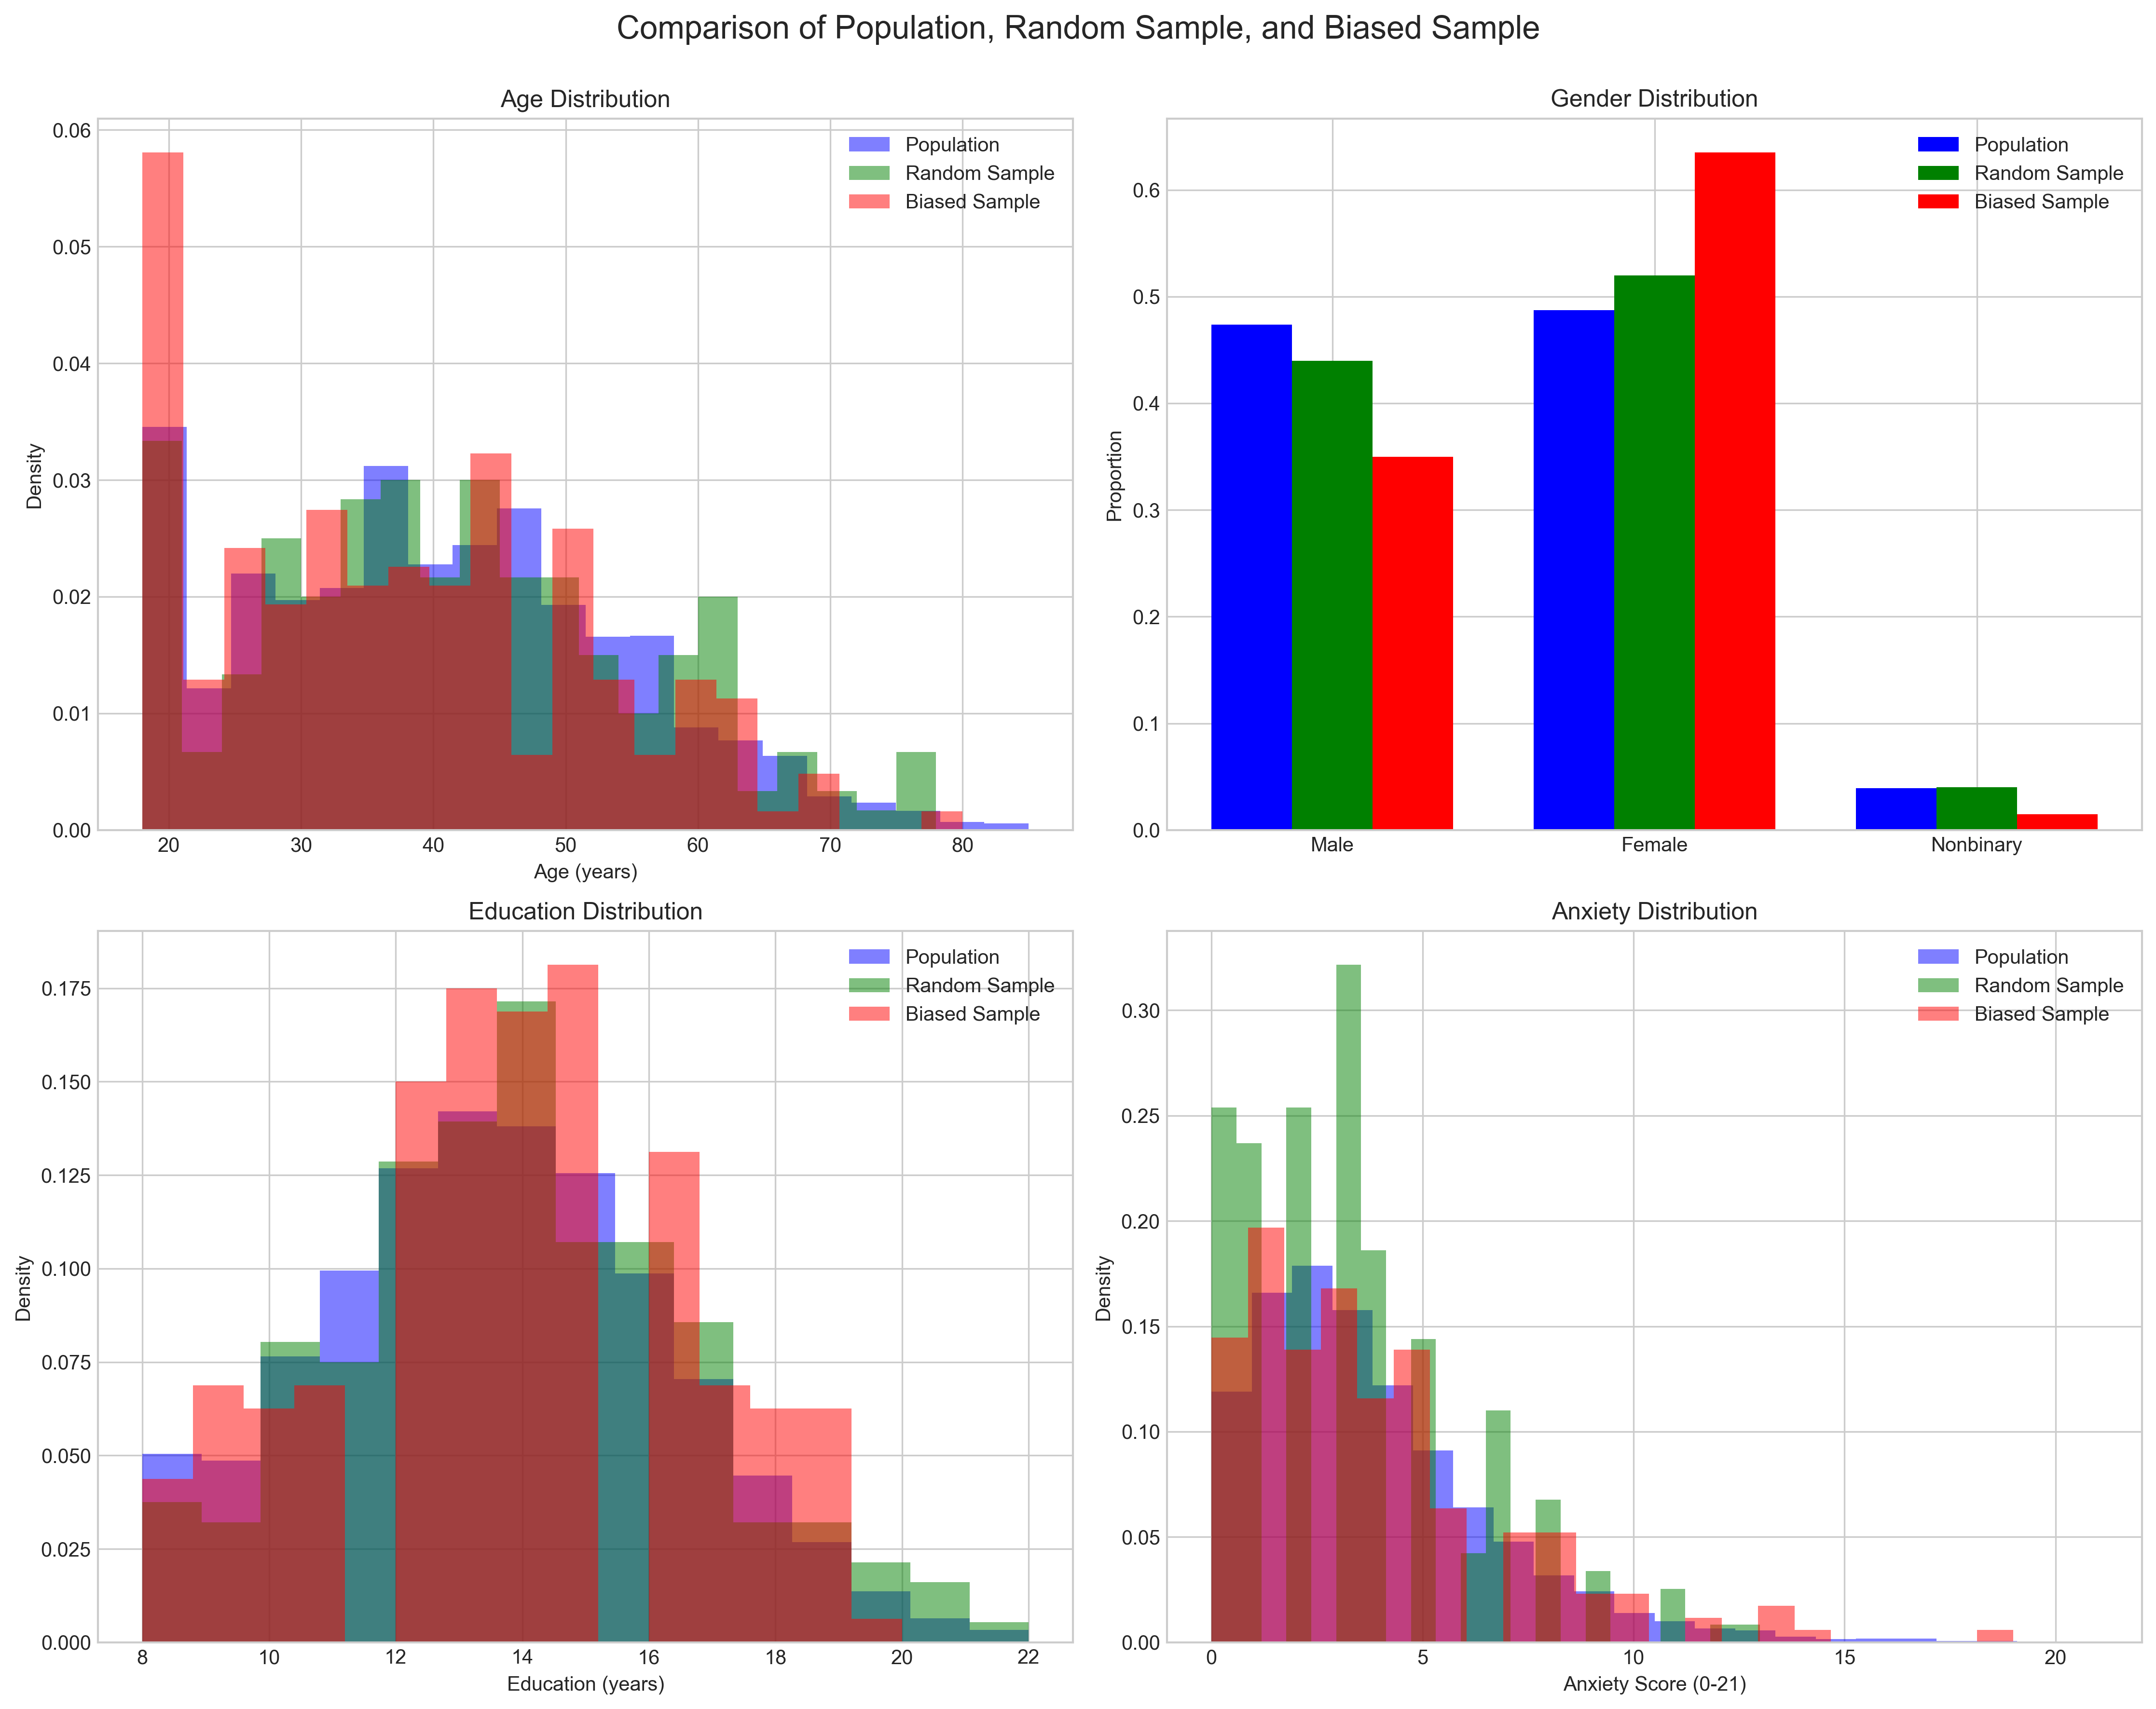

Population mean anxiety: 3.51
Random sample mean anxiety: 3.27
Biased sample mean anxiety: 3.71

Sampling bias error: 0.20 points
Random sampling error: 0.24 points

The biased sample overestimates anxiety by 5.7%


In [6]:
# Simulate population and sample data for an anxiety study
np.random.seed(123)

# Create a simulated population with key demographic variables
population_size = 10000

# Age distribution (years)
age_population = np.clip(np.random.normal(40, 15, population_size), 18, 85).astype(int)

# Gender (0=male, 1=female, 2=nonbinary)
gender_probs = [0.48, 0.48, 0.04]  # Probabilities for each category
gender_population = np.random.choice([0, 1, 2], size=population_size, p=gender_probs)

# Education level (years)
education_population = np.clip(np.random.normal(14, 3, population_size), 8, 22).astype(int)

# Anxiety level (0-21 scale, GAD-7)
# Make anxiety level correlated with age (younger people have higher anxiety in this simulation)
age_effect = (40 - age_population) * 0.05  # Higher anxiety for younger people
base_anxiety = np.random.gamma(shape=2, scale=2, size=population_size)
anxiety_population = np.clip(base_anxiety + age_effect, 0, 21).astype(int)

# Create a biased convenience sample (e.g., university-based recruitment)
# This sample will be younger, more educated, and have more females than the population
sample_size = 200
sample_indices = []

# Sampling probabilities that favor younger, more educated individuals and females
age_bias = 1.0 - age_population / 100  # Higher probability for younger people
education_bias = education_population / 15  # Higher probability for more educated people
gender_bias = np.ones(population_size)
gender_bias[gender_population == 1] = 1.5  # Higher probability for females

# Combine biases and normalize to create sampling probabilities
sampling_prob = age_bias * education_bias * gender_bias
sampling_prob = sampling_prob / np.sum(sampling_prob)  # Normalize to sum to 1

# Draw biased sample
biased_sample_indices = np.random.choice(
    np.arange(population_size), 
    size=sample_size, 
    replace=False, 
    p=sampling_prob
)

# Draw random sample for comparison
random_sample_indices = np.random.choice(
    np.arange(population_size),
    size=sample_size,
    replace=False
)

# Extract biased sample data
age_biased = age_population[biased_sample_indices]
gender_biased = gender_population[biased_sample_indices]
education_biased = education_population[biased_sample_indices]
anxiety_biased = anxiety_population[biased_sample_indices]

# Extract random sample data
age_random = age_population[random_sample_indices]
gender_random = gender_population[random_sample_indices]
education_random = education_population[random_sample_indices]
anxiety_random = anxiety_population[random_sample_indices]

# Compare population, biased sample, and random sample statistics
def compare_samples(population, biased_sample, random_sample, variable_name):
    pop_mean = np.mean(population)
    pop_std = np.std(population)
    biased_mean = np.mean(biased_sample)
    biased_std = np.std(biased_sample)
    random_mean = np.mean(random_sample)
    random_std = np.std(random_sample)
    
    biased_diff = abs(biased_mean - pop_mean)
    biased_diff_pct = (biased_diff / pop_mean) * 100 if pop_mean != 0 else float('inf')
    
    random_diff = abs(random_mean - pop_mean)
    random_diff_pct = (random_diff / pop_mean) * 100 if pop_mean != 0 else float('inf')
    
    return {
        'Variable': variable_name,
        'Population Mean': pop_mean,
        'Population SD': pop_std,
        'Biased Sample Mean': biased_mean,
        'Biased Sample SD': biased_std,
        'Biased % Diff': biased_diff_pct,
        'Random Sample Mean': random_mean,
        'Random Sample SD': random_std,
        'Random % Diff': random_diff_pct
    }

# Collect comparison results
comparisons = [
    compare_samples(age_population, age_biased, age_random, 'Age (years)'),
    compare_samples(gender_population, gender_biased, gender_random, 'Gender (0=M, 1=F, 2=NB)'),
    compare_samples(education_population, education_biased, education_random, 'Education (years)'),
    compare_samples(anxiety_population, anxiety_biased, anxiety_random, 'Anxiety (0-21)')
]

# Create comparison table
comparison_df = pd.DataFrame(comparisons)

# Display formatted table
display(comparison_df.style.format({
    'Population Mean': '{:.2f}',
    'Population SD': '{:.2f}',
    'Biased Sample Mean': '{:.2f}',
    'Biased Sample SD': '{:.2f}',
    'Biased % Diff': '{:.2f}%',
    'Random Sample Mean': '{:.2f}',
    'Random Sample SD': '{:.2f}',
    'Random % Diff': '{:.2f}%'
}).set_caption('Comparison of Population vs. Sample Characteristics'))

# Visualize the differences in distributions
fig, axes = plt.subplots(2, 2, figsize=(15, 12))
fig.suptitle('Comparison of Population, Random Sample, and Biased Sample', fontsize=16)

# Age distribution
axes[0, 0].hist(age_population, bins=20, alpha=0.5, label='Population', color='blue', density=True)
axes[0, 0].hist(age_random, bins=20, alpha=0.5, label='Random Sample', color='green', density=True)
axes[0, 0].hist(age_biased, bins=20, alpha=0.5, label='Biased Sample', color='red', density=True)
axes[0, 0].set_title('Age Distribution')
axes[0, 0].set_xlabel('Age (years)')
axes[0, 0].set_ylabel('Density')
axes[0, 0].legend()

# Gender distribution
gender_labels = ['Male', 'Female', 'Nonbinary']
gender_counts = []
for data in [gender_population, gender_random, gender_biased]:
    counts = [np.mean(data == 0), np.mean(data == 1), np.mean(data == 2)]
    gender_counts.append(counts)

x = np.arange(len(gender_labels))
width = 0.25
axes[0, 1].bar(x - width, gender_counts[0], width, label='Population', color='blue')
axes[0, 1].bar(x, gender_counts[1], width, label='Random Sample', color='green')
axes[0, 1].bar(x + width, gender_counts[2], width, label='Biased Sample', color='red')
axes[0, 1].set_title('Gender Distribution')
axes[0, 1].set_xticks(x)
axes[0, 1].set_xticklabels(gender_labels)
axes[0, 1].set_ylabel('Proportion')
axes[0, 1].legend()

# Education distribution
axes[1, 0].hist(education_population, bins=15, alpha=0.5, label='Population', color='blue', density=True)
axes[1, 0].hist(education_random, bins=15, alpha=0.5, label='Random Sample', color='green', density=True)
axes[1, 0].hist(education_biased, bins=15, alpha=0.5, label='Biased Sample', color='red', density=True)
axes[1, 0].set_title('Education Distribution')
axes[1, 0].set_xlabel('Education (years)')
axes[1, 0].set_ylabel('Density')
axes[1, 0].legend()

# Anxiety distribution
axes[1, 1].hist(anxiety_population, bins=22, alpha=0.5, label='Population', color='blue', density=True)
axes[1, 1].hist(anxiety_random, bins=22, alpha=0.5, label='Random Sample', color='green', density=True)
axes[1, 1].hist(anxiety_biased, bins=22, alpha=0.5, label='Biased Sample', color='red', density=True)
axes[1, 1].set_title('Anxiety Distribution')
axes[1, 1].set_xlabel('Anxiety Score (0-21)')
axes[1, 1].set_ylabel('Density')
axes[1, 1].legend()

plt.tight_layout()
plt.subplots_adjust(top=0.92)
plt.show()

# Calculate the impact of biased sampling on anxiety estimates
print(f"Population mean anxiety: {np.mean(anxiety_population):.2f}")
print(f"Random sample mean anxiety: {np.mean(anxiety_random):.2f}")
print(f"Biased sample mean anxiety: {np.mean(anxiety_biased):.2f}")
print(f"\nSampling bias error: {abs(np.mean(anxiety_biased) - np.mean(anxiety_population)):.2f} points")
print(f"Random sampling error: {abs(np.mean(anxiety_random) - np.mean(anxiety_population)):.2f} points")
print(f"\nThe biased sample overestimates anxiety by {(np.mean(anxiety_biased)/np.mean(anxiety_population)-1)*100:.1f}%")

The example above illustrates how non-random sampling can lead to biased estimates of key variables. This is particularly important in psychological research where we often rely on convenience samples (e.g., university students, online participants) that may not represent the broader population of interest.

### 2.5 Sample Size Determination in Practice

How large should our sample be? This is one of the most common questions in research design. The answer depends on several factors:

1. **Effect size** - How large is the effect we're trying to detect?
2. **Desired power** - What's the probability we want of detecting a true effect?
3. **Significance level** - What's our threshold for rejecting the null hypothesis?
4. **Study design** - What statistical tests will we use?

Let's explore practical sample size determination through power analysis for several common research scenarios in psychology.

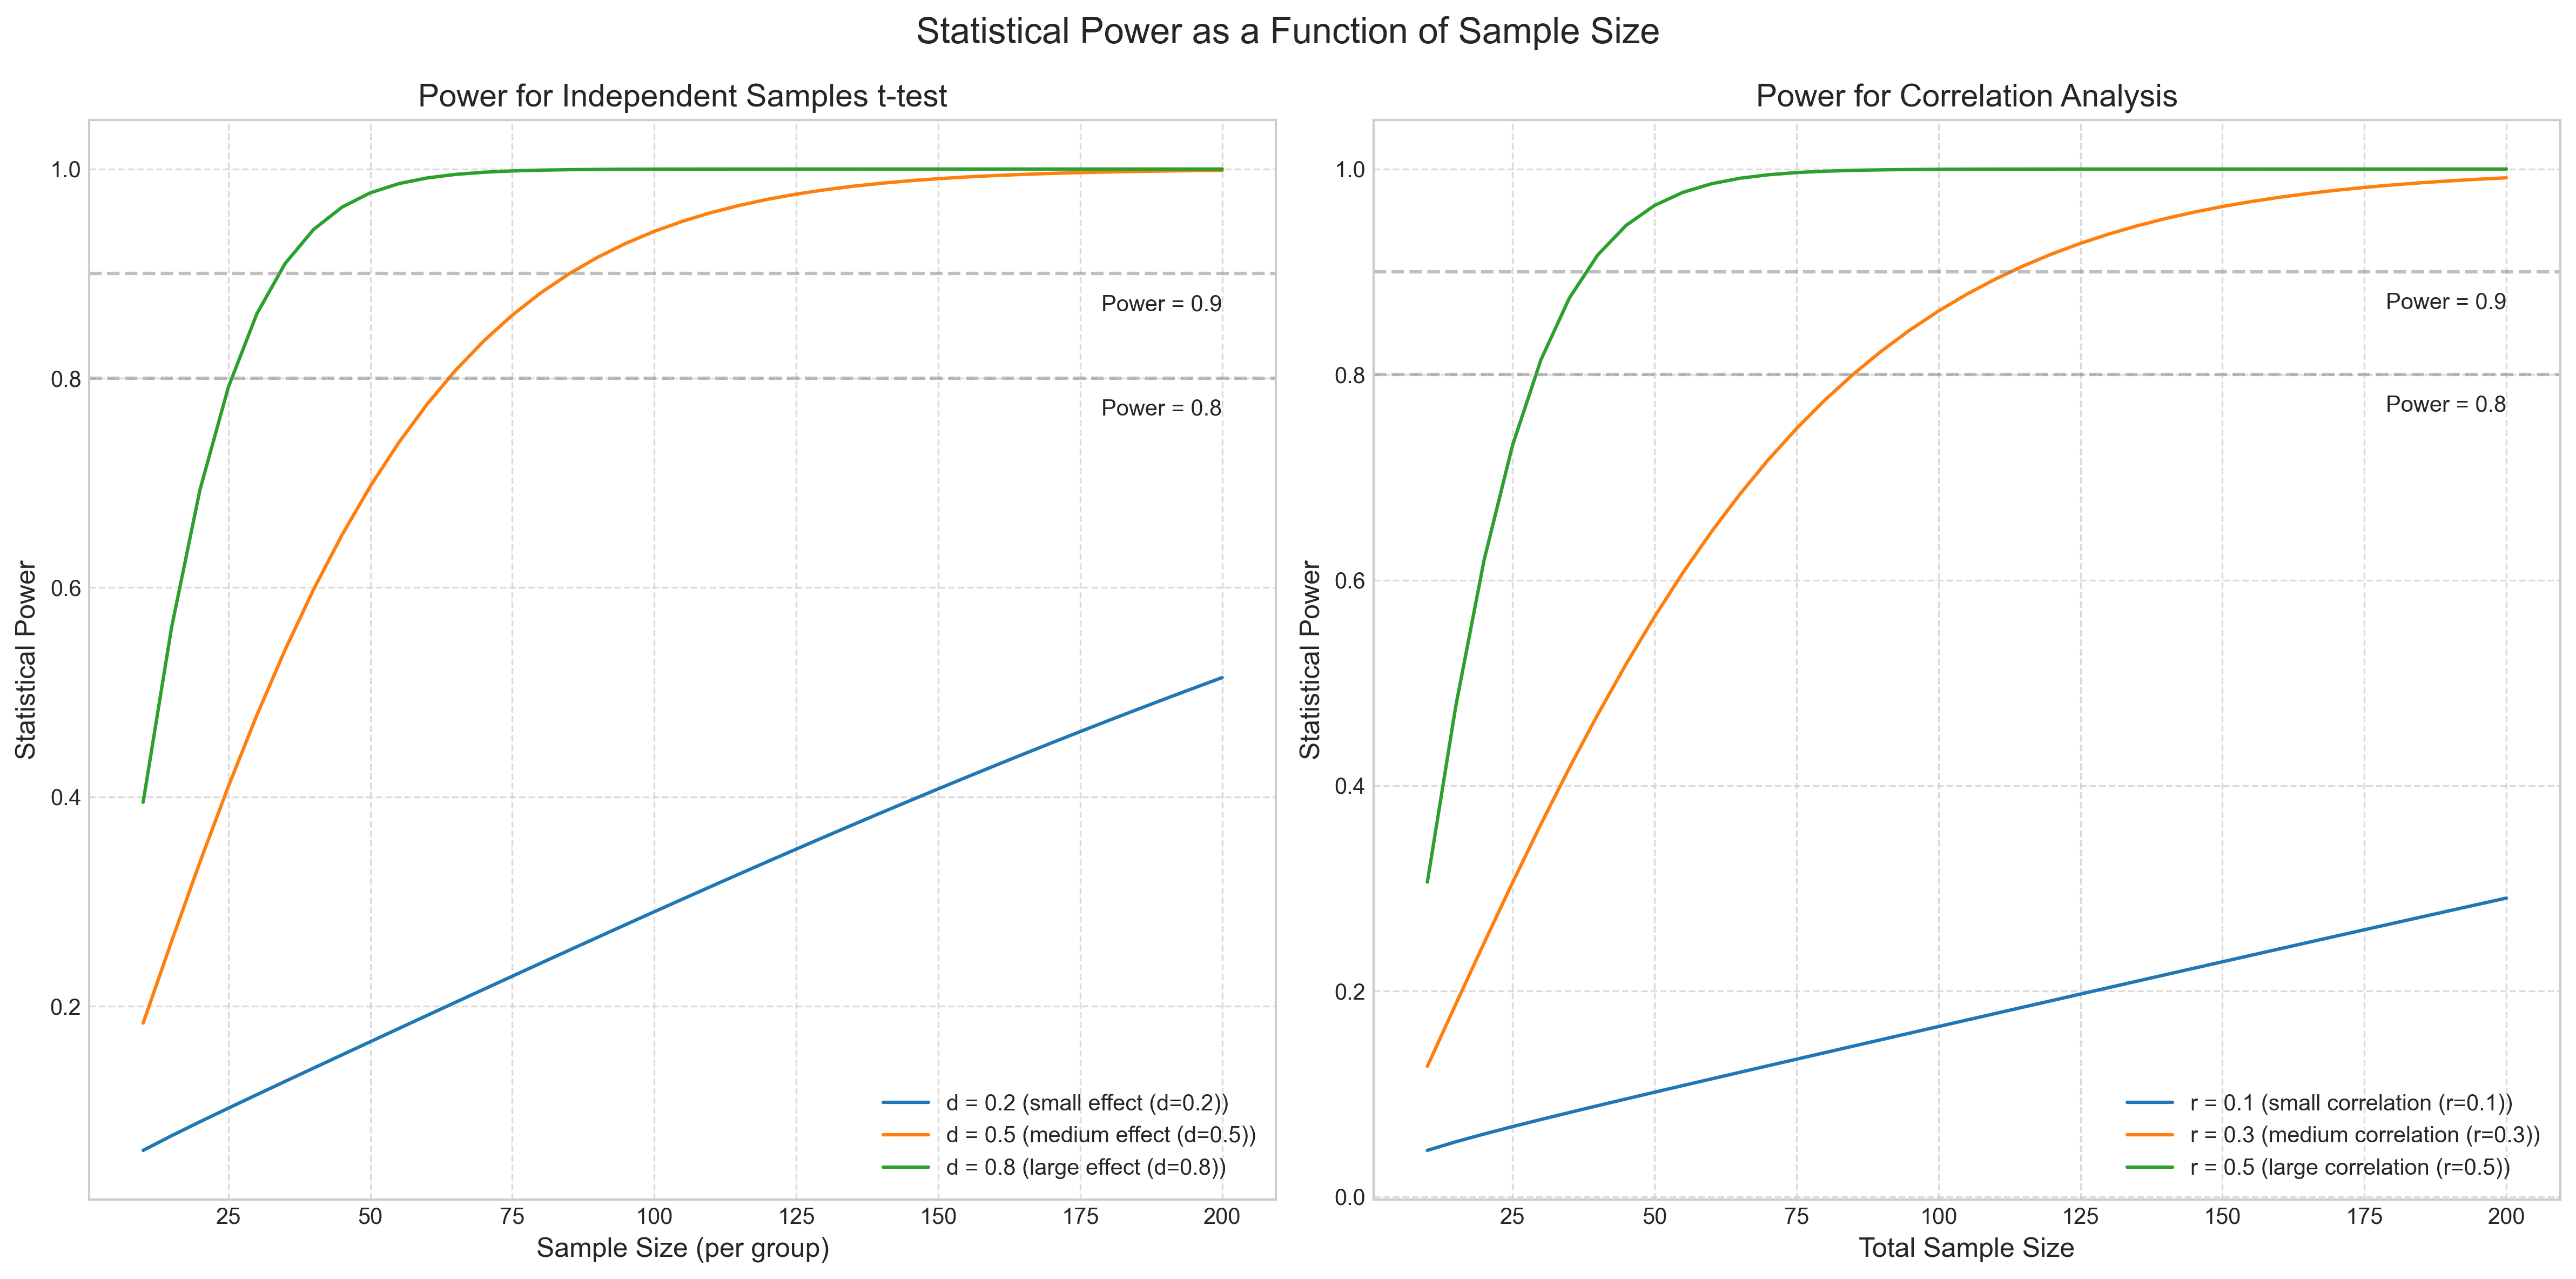

In [7]:
# Sample size determination for different statistical tests
from scipy import stats
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Function to describe effect sizes in words
def describe_effect_size(value, type_):
    if type_ == 'd':
        if value <= 0.2:
            return f"small effect (d={value})"
        elif value <= 0.5:
            return f"medium effect (d={value})"
        else:
            return f"large effect (d={value})"
    elif type_ == 'r':
        if value <= 0.1:
            return f"small correlation (r={value})"
        elif value <= 0.3:
            return f"medium correlation (r={value})"
        else:
            return f"large correlation (r={value})"

# Function to calculate sample size for t-test (two independent samples)
def sample_size_ttest(d, alpha=0.05, power=0.8, two_sided=True):
    """Calculate required sample size for t-test
    
    Args:
        d: Cohen's d effect size
        alpha: Significance level
        power: Desired statistical power
        two_sided: Whether the test is two-sided
    
    Returns:
        Required sample size per group
    """
    # Calculate non-centrality parameter
    tails = 2 if two_sided else 1
    z_alpha = stats.norm.ppf(1 - alpha/tails)
    z_beta = stats.norm.ppf(power)
    
    # Calculate sample size
    n = ((z_alpha + z_beta)**2 * 2) / d**2
    
    # Round up to next integer
    return int(np.ceil(n))

# Function to calculate sample size for correlation
def sample_size_correlation(r, alpha=0.05, power=0.8, two_sided=True):
    """Calculate required sample size to detect correlation
    
    Args:
        r: Expected correlation coefficient
        alpha: Significance level
        power: Desired statistical power
        two_sided: Whether the test is two-sided
    
    Returns:
        Required total sample size
    """
    # Transform r to Fisher's z
    z = 0.5 * np.log((1 + r) / (1 - r))
    
    # Calculate critical values
    tails = 2 if two_sided else 1
    z_alpha = stats.norm.ppf(1 - alpha/tails)
    z_beta = stats.norm.ppf(power)
    
    # Calculate sample size
    n = ((z_alpha + z_beta) / z)**2 + 3
    
    # Round up to next integer
    return int(np.ceil(n))

# Create power calculation table for different effect sizes and tests
effect_sizes = {
    't-test (d)': [0.2, 0.5, 0.8],
    'correlation (r)': [0.1, 0.3, 0.5]
}

power_levels = [0.8, 0.9, 0.95]

# Create table data
power_data = []

for test, sizes in effect_sizes.items():
    test_name = test.split(' ')[0]
    effect_label = test.split(' ')[1].strip('()')
    
    for size in sizes:
        for power in power_levels:
            if test_name == 't-test':
                n = sample_size_ttest(size, power=power)
                description = f"Detect a {describe_effect_size(size, 'd')} between two groups"
            elif test_name == 'correlation':
                n = sample_size_correlation(size, power=power)
                description = f"Detect a {describe_effect_size(size, 'r')} between two variables"
            
            power_data.append({
                'Test': test_name,
                f'Effect Size ({effect_label})': size,
                'Effect Description': description,
                'Power': power,
                'Sample Size': n
            })

power_df = pd.DataFrame(power_data)

# Style and display the table
styled_power = power_df.style.set_properties(**{
    'text-align': 'center',
    'font-size': '11pt',
    'border': '1px solid gray'
}).set_table_styles([
    {'selector': 'th', 'props': [('text-align', 'center'), ('font-weight', 'bold'), 
                                ('background-color', '#f0f0f0')]},
    {'selector': 'caption', 'props': [('font-size', '14pt'), ('font-weight', 'bold')]}
]).set_caption('Required Sample Sizes for Different Effect Sizes and Power Levels')

display(styled_power)

# Create a visual representation of power versus sample size
def plot_power_curves():
    # Sample sizes to evaluate
    sample_sizes = np.arange(10, 201, 5)
    
    # Effect sizes
    d_values = [0.2, 0.5, 0.8]
    r_values = [0.1, 0.3, 0.5]
    
    # Create figure
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 8))
    fig.suptitle('Statistical Power as a Function of Sample Size', fontsize=16)
    
    # Plot power curves for t-test
    for d in d_values:
        # Calculate power for each sample size
        power_values = []
        for n in sample_sizes:
            # Non-centrality parameter
            nc = d * np.sqrt(n/2)
            # Degrees of freedom
            df = 2 * (n - 1)
            # Critical value
            cv = stats.t.ppf(0.975, df)
            # Power = P(t > cv | H1 true)
            power = 1 - stats.nct.cdf(cv, df, nc)
            power_values.append(power)
        
        # Plot the curve
        ax1.plot(sample_sizes, power_values, label=f'd = {d} ({describe_effect_size(d, "d")})')
    
    # Add reference lines
    for power_level in [0.8, 0.9]:
        ax1.axhline(y=power_level, linestyle='--', color='gray', alpha=0.5)
        ax1.text(200, power_level-0.02, f'Power = {power_level}', ha='right', va='top')
    
    ax1.set_xlabel('Sample Size (per group)', fontsize=12)
    ax1.set_ylabel('Statistical Power', fontsize=12)
    ax1.set_title('Power for Independent Samples t-test', fontsize=14)
    ax1.legend()
    ax1.grid(True, linestyle='--', alpha=0.7)
    
    # Plot power curves for correlation
    for r in r_values:
        # Calculate power for each sample size
        power_values = []
        for n in sample_sizes:
            # Fisher's z transform
            z = 0.5 * np.log((1 + r) / (1 - r))
            # Standard error of z
            se = 1 / np.sqrt(n - 3)
            # Standardized effect
            effect = z / se
            # Critical value
            cv = stats.norm.ppf(0.975)
            # Power calculation
            power = 1 - stats.norm.cdf(cv - effect)
            power_values.append(power)
        
        # Plot the curve
        ax2.plot(sample_sizes, power_values, label=f'r = {r} ({describe_effect_size(r, "r")})')
    
    # Add reference lines
    for power_level in [0.8, 0.9]:
        ax2.axhline(y=power_level, linestyle='--', color='gray', alpha=0.5)
        ax2.text(200, power_level-0.02, f'Power = {power_level}', ha='right', va='top')
    
    ax2.set_xlabel('Total Sample Size', fontsize=12)
    ax2.set_ylabel('Statistical Power', fontsize=12)
    ax2.set_title('Power for Correlation Analysis', fontsize=14)
    ax2.legend()
    ax2.grid(True, linestyle='--', alpha=0.7)
    
    plt.tight_layout()
    plt.subplots_adjust(top=0.9)
    plt.show()

# Plot the power curves
plot_power_curves()

### 2.6 Practical Example: Determining Sample Size for a Memory Study

Let's apply sample size determination to a realistic psychological research scenario. Imagine we're designing a study to investigate the effect of background music on memory recall. Previous research suggests a medium effect size (Cohen's $d \approx 0.5$).

We'll determine sample sizes for different designs and power levels, then simulate the study to demonstrate how sample size affects our conclusions.

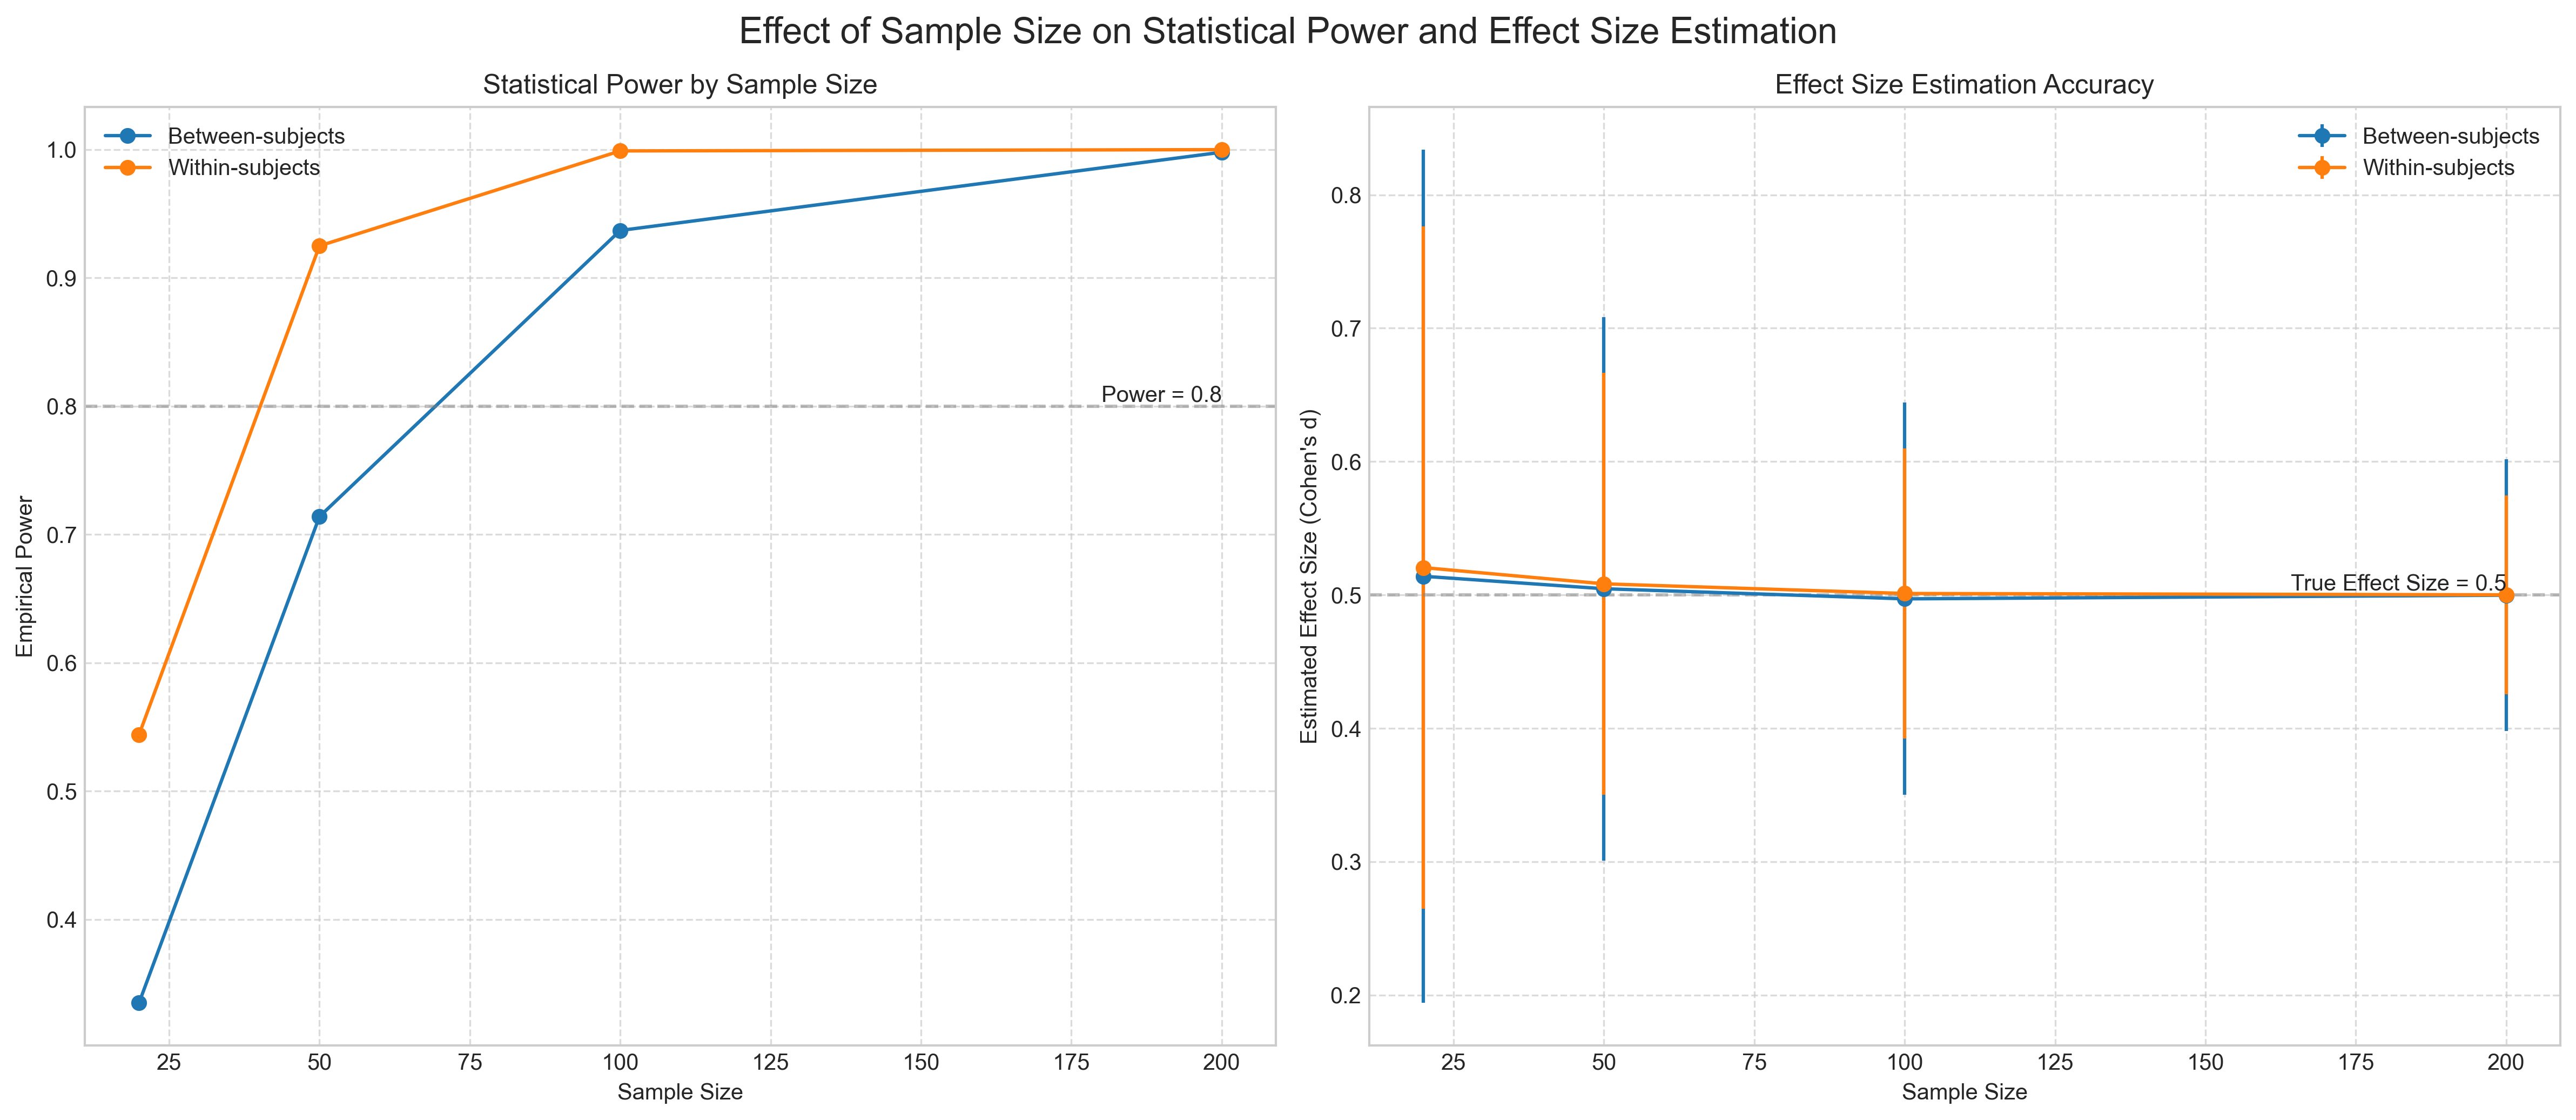

In [8]:
# Sample size for memory study with different designs
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

# Define study parameters
effect_size = 0.5  # Cohen's d
designs = ['Between-subjects', 'Within-subjects']
power_levels = [0.8, 0.9, 0.95]
alpha = 0.05

# Function to calculate sample size for between-subjects design
def sample_size_between(d, alpha=0.05, power=0.8):
    z_alpha = stats.norm.ppf(1 - alpha/2)  # Two-tailed
    z_beta = stats.norm.ppf(power)
    n = 2 * ((z_alpha + z_beta) / d)**2
    return int(np.ceil(n))

# Function to calculate sample size for within-subjects design
def sample_size_within(d, alpha=0.05, power=0.8, correlation=0.5):
    # Adjust d for correlation in paired design
    d_adjusted = d / np.sqrt(2 * (1 - correlation))
    z_alpha = stats.norm.ppf(1 - alpha/2)  # Two-tailed
    z_beta = stats.norm.ppf(power)
    n = ((z_alpha + z_beta) / d_adjusted)**2
    return int(np.ceil(n))

# Calculate sample sizes for each design and power level
sample_sizes = {}
sample_sizes['Between-subjects'] = [sample_size_between(effect_size, power=p) for p in power_levels]
sample_sizes['Within-subjects'] = [sample_size_within(effect_size, power=p) for p in power_levels]

# Create a DataFrame for the results
rows = []
for design in designs:
    for i, power in enumerate(power_levels):
        rows.append({
            'Design': design,
            'Power': power,
            'Required Sample Size': sample_sizes[design][i],
            'Notes': 'Per group' if design == 'Between-subjects' else 'Total'
        })

sample_size_df = pd.DataFrame(rows)

# Display the table
styled_sample_size = sample_size_df.style.set_properties(**{
    'text-align': 'center',
    'font-size': '11pt',
    'border': '1px solid gray'
}).set_caption('Required Sample Sizes for Memory Study with Music (d = 0.5)')

display(styled_sample_size)

# Now let's simulate the study with different sample sizes
def simulate_memory_study(design, n_per_group=None, n_total=None, effect_size=0.5, iterations=1000):
    """Simulate a memory study with specified parameters
    
    Args:
        design: 'between' or 'within'
        n_per_group: Sample size per group for between-subjects design
        n_total: Total sample size for within-subjects design
        effect_size: Cohen's d
        iterations: Number of study simulations
    
    Returns:
        Dictionary with simulation results
    """
    # Initialize counters
    significant_results = 0
    observed_effects = []
    p_values = []
    
    # Set random seed for reproducibility
    np.random.seed(42)
    
    for _ in range(iterations):
        if design == 'between':
            # Generate data for control group
            control_data = np.random.normal(0, 1, n_per_group)
            
            # Generate data for music group with the effect
            music_data = np.random.normal(effect_size, 1, n_per_group)
            
            # Conduct t-test
            t_stat, p_value = stats.ttest_ind(music_data, control_data, equal_var=True)
            
            # Calculate observed effect size
            observed_effect = (np.mean(music_data) - np.mean(control_data)) / np.sqrt(
                ((n_per_group-1) * np.var(music_data, ddof=1) + 
                 (n_per_group-1) * np.var(control_data, ddof=1)) / 
                (2 * n_per_group - 2))
            
        elif design == 'within':
            # For within-subjects, we need to account for correlation
            correlation = 0.5  # Moderate correlation between conditions
            
            # Generate correlated data using multivariate normal
            cov_matrix = [[1, correlation], [correlation, 1]]
            data = np.random.multivariate_normal([0, effect_size], cov_matrix, n_total)
            control_data = data[:, 0]
            music_data = data[:, 1]
            
            # Conduct paired t-test
            t_stat, p_value = stats.ttest_rel(music_data, control_data)
            
            # Calculate observed effect size (dz for within-subjects)
            diff = music_data - control_data
            observed_effect = np.mean(diff) / np.std(diff, ddof=1)
        
        # Record results
        if p_value < 0.05:
            significant_results += 1
        
        observed_effects.append(observed_effect)
        p_values.append(p_value)
    
    # Calculate empirical power and average effect size
    power = significant_results / iterations
    mean_effect = np.mean(observed_effects)
    
    return {
        'Empirical Power': power,
        'Mean Observed Effect': mean_effect,
        'p-values': p_values,
        'Observed Effects': observed_effects
    }

# Simulate studies with different designs and sample sizes
sample_options = [20, 50, 100, 200]  # Different sample sizes to try
simulation_results = []

for design in ['between', 'within']:
    for n in sample_options:
        if design == 'between':
            results = simulate_memory_study(design, n_per_group=n, effect_size=effect_size)
            total_n = n * 2  # Total sample across both groups
        else:  # within
            results = simulate_memory_study(design, n_total=n, effect_size=effect_size)
            total_n = n
        
        simulation_results.append({
            'Design': 'Between-subjects' if design == 'between' else 'Within-subjects',
            'Sample Size': n,
            'Total N': total_n,
            'Empirical Power': results['Empirical Power'],
            'Mean Effect Size': results['Mean Observed Effect'],
            'p-values': results['p-values'],
            'Observed Effects': results['Observed Effects']
        })

# Create results table
simulation_df = pd.DataFrame([(r['Design'], r['Sample Size'], r['Total N'], 
                              r['Empirical Power'], r['Mean Effect Size']) 
                             for r in simulation_results],
                            columns=['Design', 'Sample Size', 'Total N', 
                                    'Empirical Power', 'Mean Effect Size'])

# Display the table
styled_simulation = simulation_df.style.format({
    'Empirical Power': '{:.3f}',
    'Mean Effect Size': '{:.3f}'
}).set_properties(**{
    'text-align': 'center',
    'font-size': '11pt',
    'border': '1px solid gray'
}).set_caption('Simulation Results for Memory Study with Different Sample Sizes')

display(styled_simulation)

# Visualize the results
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 7))
fig.suptitle('Effect of Sample Size on Statistical Power and Effect Size Estimation', fontsize=16)

# Plot power by sample size
for design in ['Between-subjects', 'Within-subjects']:
    design_results = [r for r in simulation_results if r['Design'] == design]
    sample_sizes = [r['Sample Size'] for r in design_results]
    powers = [r['Empirical Power'] for r in design_results]
    ax1.plot(sample_sizes, powers, 'o-', label=design)

ax1.axhline(y=0.8, color='gray', linestyle='--', alpha=0.5)
ax1.text(sample_options[-1], 0.8, 'Power = 0.8', ha='right', va='bottom')
ax1.set_xlabel('Sample Size')
ax1.set_ylabel('Empirical Power')
ax1.set_title('Statistical Power by Sample Size')
ax1.legend()
ax1.grid(True, linestyle='--', alpha=0.7)

# Plot effect size estimation by sample size
for design in ['Between-subjects', 'Within-subjects']:
    design_results = [r for r in simulation_results if r['Design'] == design]
    sample_sizes = [r['Sample Size'] for r in design_results]
    effects = [r['Mean Effect Size'] for r in design_results]
    
    # Calculate standard errors of the effect sizes
    se_effects = [np.std(r['Observed Effects']) for r in design_results]
    
    ax2.errorbar(sample_sizes, effects, yerr=se_effects, fmt='o-', label=design)

ax2.axhline(y=effect_size, color='gray', linestyle='--', alpha=0.5)
ax2.text(sample_options[-1], effect_size, f'True Effect Size = {effect_size}', ha='right', va='bottom')
ax2.set_xlabel('Sample Size')
ax2.set_ylabel('Estimated Effect Size (Cohen\'s d)')
ax2.set_title('Effect Size Estimation Accuracy')
ax2.legend()
ax2.grid(True, linestyle='--', alpha=0.7)

plt.tight_layout()
plt.subplots_adjust(top=0.9)
plt.show()

## 3. Statistical Inference in Behavioral Psychology

Statistical inference is the process of drawing conclusions about populations based on sample data. In psychological research, we typically want to know:

1. **Parameter estimation**: What are the likely values of population parameters (e.g., mean reaction time)?
2. **Hypothesis testing**: Is there evidence for a relationship or difference between variables?

Let's explore key concepts in statistical inference through a psychological example: the attentional blink phenomenon, where detecting a second target (T2) is impaired if it appears shortly after a first target (T1).

### 3.1 Point Estimation and Confidence Intervals

A **point estimate** is a single value that best approximates a population parameter. For example, the sample mean ($\bar{X}$) estimates the population mean ($\mu$).

A **confidence interval (CI)** is a range of values that likely contains the true population parameter. A 95% CI means that if we repeated the study many times, about 95% of the resulting intervals would contain the true parameter.

For a sample mean, the 95% CI is calculated as:

$$\bar{X} \pm t_{\alpha/2, n-1} \times \frac{s}{\sqrt{n}}$$

Where:
- $\bar{X}$ is the sample mean
- $t_{\alpha/2, n-1}$ is the critical t-value with $n-1$ degrees of freedom
- $s$ is the sample standard deviation
- $n$ is the sample size

Let's apply these concepts to attentional blink data:

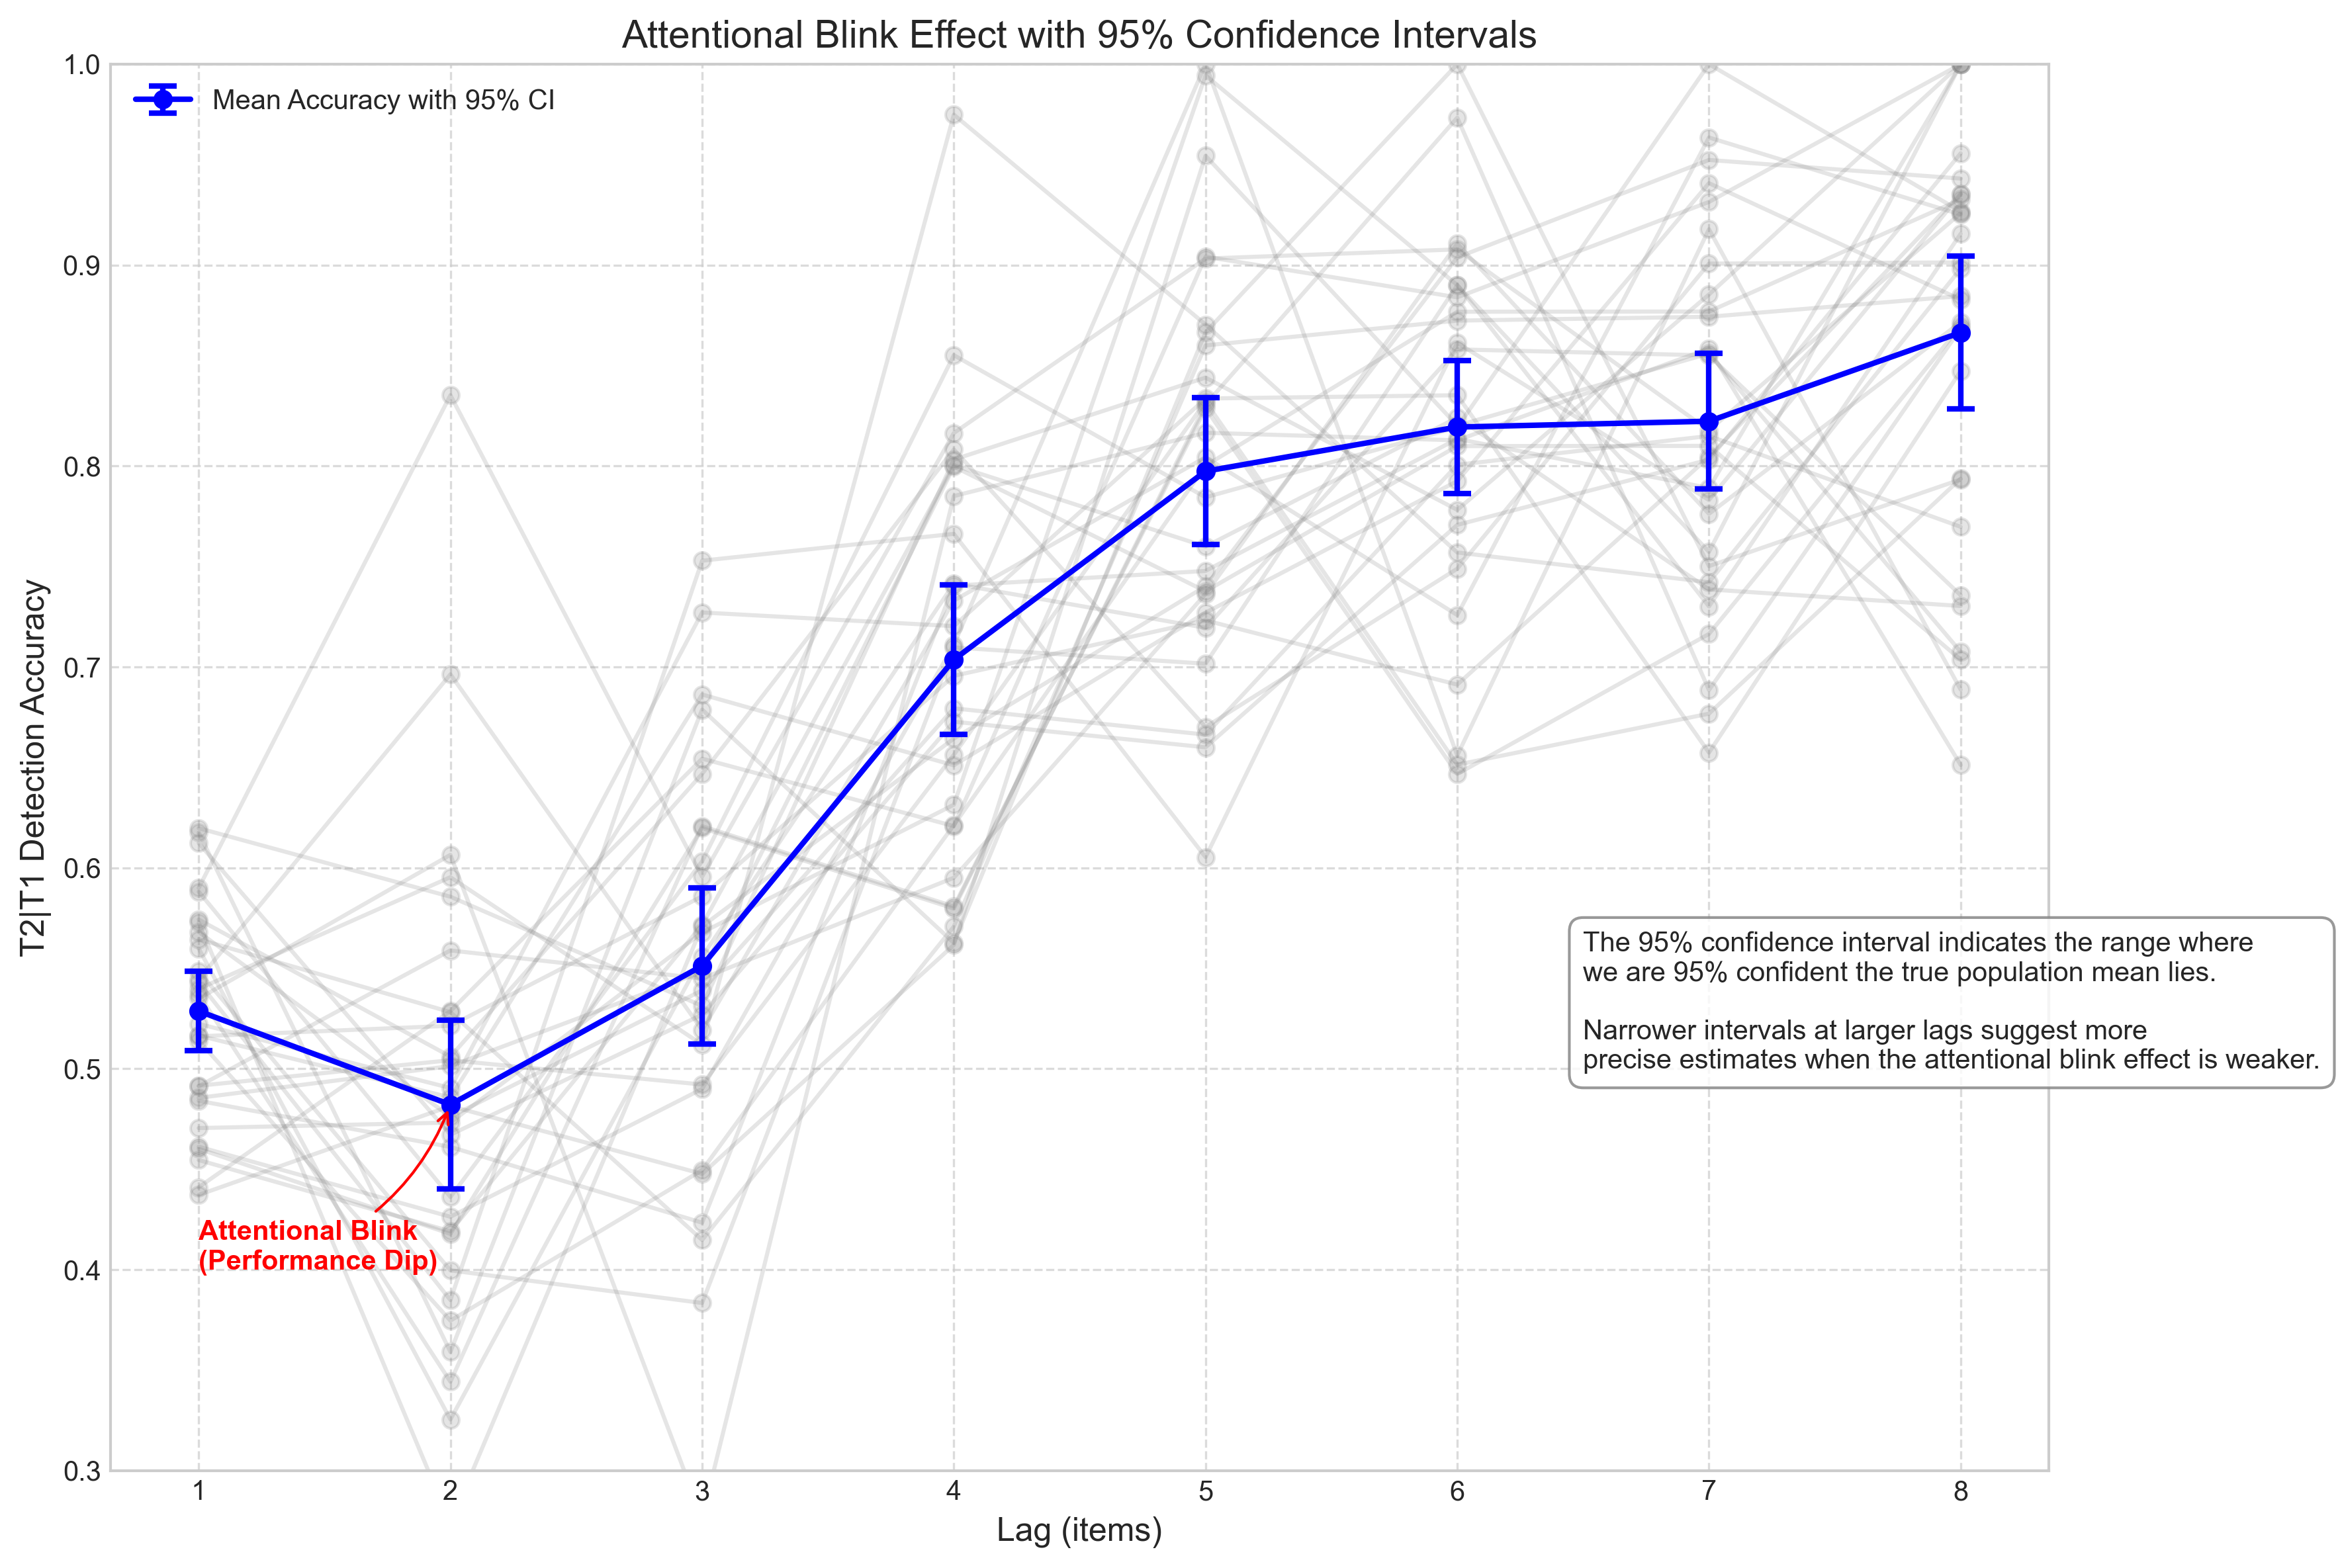

Interpreting confidence intervals for attentional blink data:
-----------------------------------------------------------
For Lag 2 (strongest attentional blink effect):
   Point estimate = 0.482
   95% CI = [0.440, 0.524]
   CI width = 0.084

For Lag 8 (minimal attentional blink effect):
   Point estimate = 0.866
   95% CI = [0.828, 0.904]
   CI width = 0.076

Since the confidence intervals for Lag 2 and Lag 8 do not overlap,
we can be fairly confident that the attentional blink effect is real
(although a formal hypothesis test would be needed to confirm).


In [9]:
# Simulate attentional blink experiment data
# T2|T1 detection rates at different lags

def generate_ab_data(n_subjects):
    """Generate data for an attentional blink experiment
    
    Args:
        n_subjects: Number of participants
        
    Returns:
        Array of shape (n_subjects, n_lags) with T2|T1 detection rates
    """
    # Define lags (time delays between T1 and T2 in items)
    lags = np.array([1, 2, 3, 4, 5, 6, 7, 8])
    
    # Define theoretical attentional blink curve
    # The curve typically shows worst performance at lag 2-3
    base_accuracy = 0.85  # Baseline accuracy when no attentional blink
    ab_effect = 0.4 * np.exp(-(lags - 2)**2 / 4)  # Gaussian-shaped dip
    
    # Generate data for each subject with some random variation
    data = []
    for _ in range(n_subjects):
        # Add individual variability
        subject_data = base_accuracy - ab_effect + np.random.normal(0, 0.1, len(lags))
        subject_data = np.clip(subject_data, 0, 1)  # Ensure values between 0 and 1
        data.append(subject_data)
    
    return np.array(data)

# Generate data
np.random.seed(42)
n_subjects = 30
ab_data = generate_ab_data(n_subjects)

# Calculate point estimates and confidence intervals
lags = np.array([1, 2, 3, 4, 5, 6, 7, 8])
mean_accuracy = np.mean(ab_data, axis=0)  # Point estimates

# Calculate 95% confidence intervals
std_error = stats.sem(ab_data, axis=0)  # Standard error of the mean
t_critical = stats.t.ppf(0.975, n_subjects-1)  # Two-tailed 95% CI
margin_error = t_critical * std_error
ci_lower = mean_accuracy - margin_error
ci_upper = mean_accuracy + margin_error

# Create a table with point estimates and CIs
estimates_table = pd.DataFrame({
    'Lag': lags,
    'Mean Accuracy': mean_accuracy,
    'Standard Error': std_error,
    '95% CI Lower': ci_lower,
    '95% CI Upper': ci_upper,
    'CI Width': ci_upper - ci_lower
})

# Display the table
styled_estimates = estimates_table.style.format({
    'Mean Accuracy': '{:.3f}',
    'Standard Error': '{:.3f}',
    '95% CI Lower': '{:.3f}',
    '95% CI Upper': '{:.3f}',
    'CI Width': '{:.3f}'
}).set_caption('Point Estimates and 95% Confidence Intervals for Attentional Blink Data')

display(styled_estimates)

# Plot the data with confidence intervals
plt.figure(figsize=(12, 8))

# Individual subject data
for subject_data in ab_data:
    plt.plot(lags, subject_data, 'o-', alpha=0.2, color='gray')

# Mean and CI
plt.errorbar(lags, mean_accuracy, yerr=margin_error, fmt='o-', linewidth=2, 
             capsize=5, capthick=2, color='blue', label='Mean Accuracy with 95% CI')

# Format the plot
plt.xlabel('Lag (items)', fontsize=12)
plt.ylabel('T2|T1 Detection Accuracy', fontsize=12)
plt.title('Attentional Blink Effect with 95% Confidence Intervals', fontsize=14)
plt.ylim(0.3, 1.0)
plt.xticks(lags)
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend()

# Add annotation explaining confidence intervals
plt.annotate(
    "The 95% confidence interval indicates the range where\n"
    "we are 95% confident the true population mean lies.\n\n"
    "Narrower intervals at larger lags suggest more\n"
    "precise estimates when the attentional blink effect is weaker.",
    xy=(6.5, 0.5), xycoords='data',
    bbox=dict(boxstyle="round,pad=0.5", fc="white", ec="gray", alpha=0.8)
)

# Add annotation highlighting the attentional blink
plt.annotate(
    "Attentional Blink\n(Performance Dip)",
    xy=(2, mean_accuracy[1]), xycoords='data',
    xytext=(1, 0.4), textcoords='data',
    arrowprops=dict(arrowstyle="->", connectionstyle="arc3,rad=.2", color="red"),
    color="red", fontweight='bold'
)

plt.tight_layout()
plt.show()

# Interpretation explanation
print("Interpreting confidence intervals for attentional blink data:")
print("-----------------------------------------------------------")
print(f"For Lag 2 (strongest attentional blink effect):")
print(f"   Point estimate = {mean_accuracy[1]:.3f}")
print(f"   95% CI = [{ci_lower[1]:.3f}, {ci_upper[1]:.3f}]")
print(f"   CI width = {ci_upper[1] - ci_lower[1]:.3f}")
print()
print(f"For Lag 8 (minimal attentional blink effect):")
print(f"   Point estimate = {mean_accuracy[7]:.3f}")
print(f"   95% CI = [{ci_lower[7]:.3f}, {ci_upper[7]:.3f}]")
print(f"   CI width = {ci_upper[7] - ci_lower[7]:.3f}")
print()
print("Since the confidence intervals for Lag 2 and Lag 8 do not overlap,")
print("we can be fairly confident that the attentional blink effect is real")
print("(although a formal hypothesis test would be needed to confirm).")

### 3.2 Hypothesis Testing in Psychological Research

Hypothesis testing is a key aspect of statistical inference in psychology. The basic approach involves:

1. Formulating null (H₀) and alternative (H₁) hypotheses
2. Collecting data and calculating a test statistic
3. Determining the probability (p-value) of obtaining a test statistic at least as extreme as observed, assuming H₀ is true
4. Making a decision based on the p-value

Let's perform a hypothesis test on our attentional blink data to determine if there's a significant difference between performance at Lag 2 (strongest attentional blink) and Lag 8 (recovery).

Paired Samples t-test: Lag 8 vs. Lag 2
----------------------------------
Lag 2 mean: 0.482
Lag 8 mean: 0.866
Mean difference: 0.384
t(29) = 14.550, p = 0.000000
Cohen's d = 2.657

Formal Hypothesis Test Framework
1. Research Question:
   Does the attentional blink phenomenon significantly reduce target detection accuracy?

2. Hypotheses:
   Null (H₀): There is no difference in accuracy between Lag 2 and Lag 8
   Alternative (H₁): Accuracy at Lag 2 is lower than accuracy at Lag 8

3. Test Selection:
   Paired samples t-test (within-subjects design)

4. Assumptions Check:
   - Data is measured at least at the interval level
   - Differences between pairs are approximately normally distributed
   - Shapiro-Wilk test for normality: W = 0.984, p = 0.926
   - Normality assumption is met (p > 0.05)

5. Results:
   - t(29) = 14.550, p = 0.000000
   - Cohen's d = 2.657 (large)

6. Decision:
   Reject H₀: There is significant evidence that the attentional blink
   reduces target detection accur

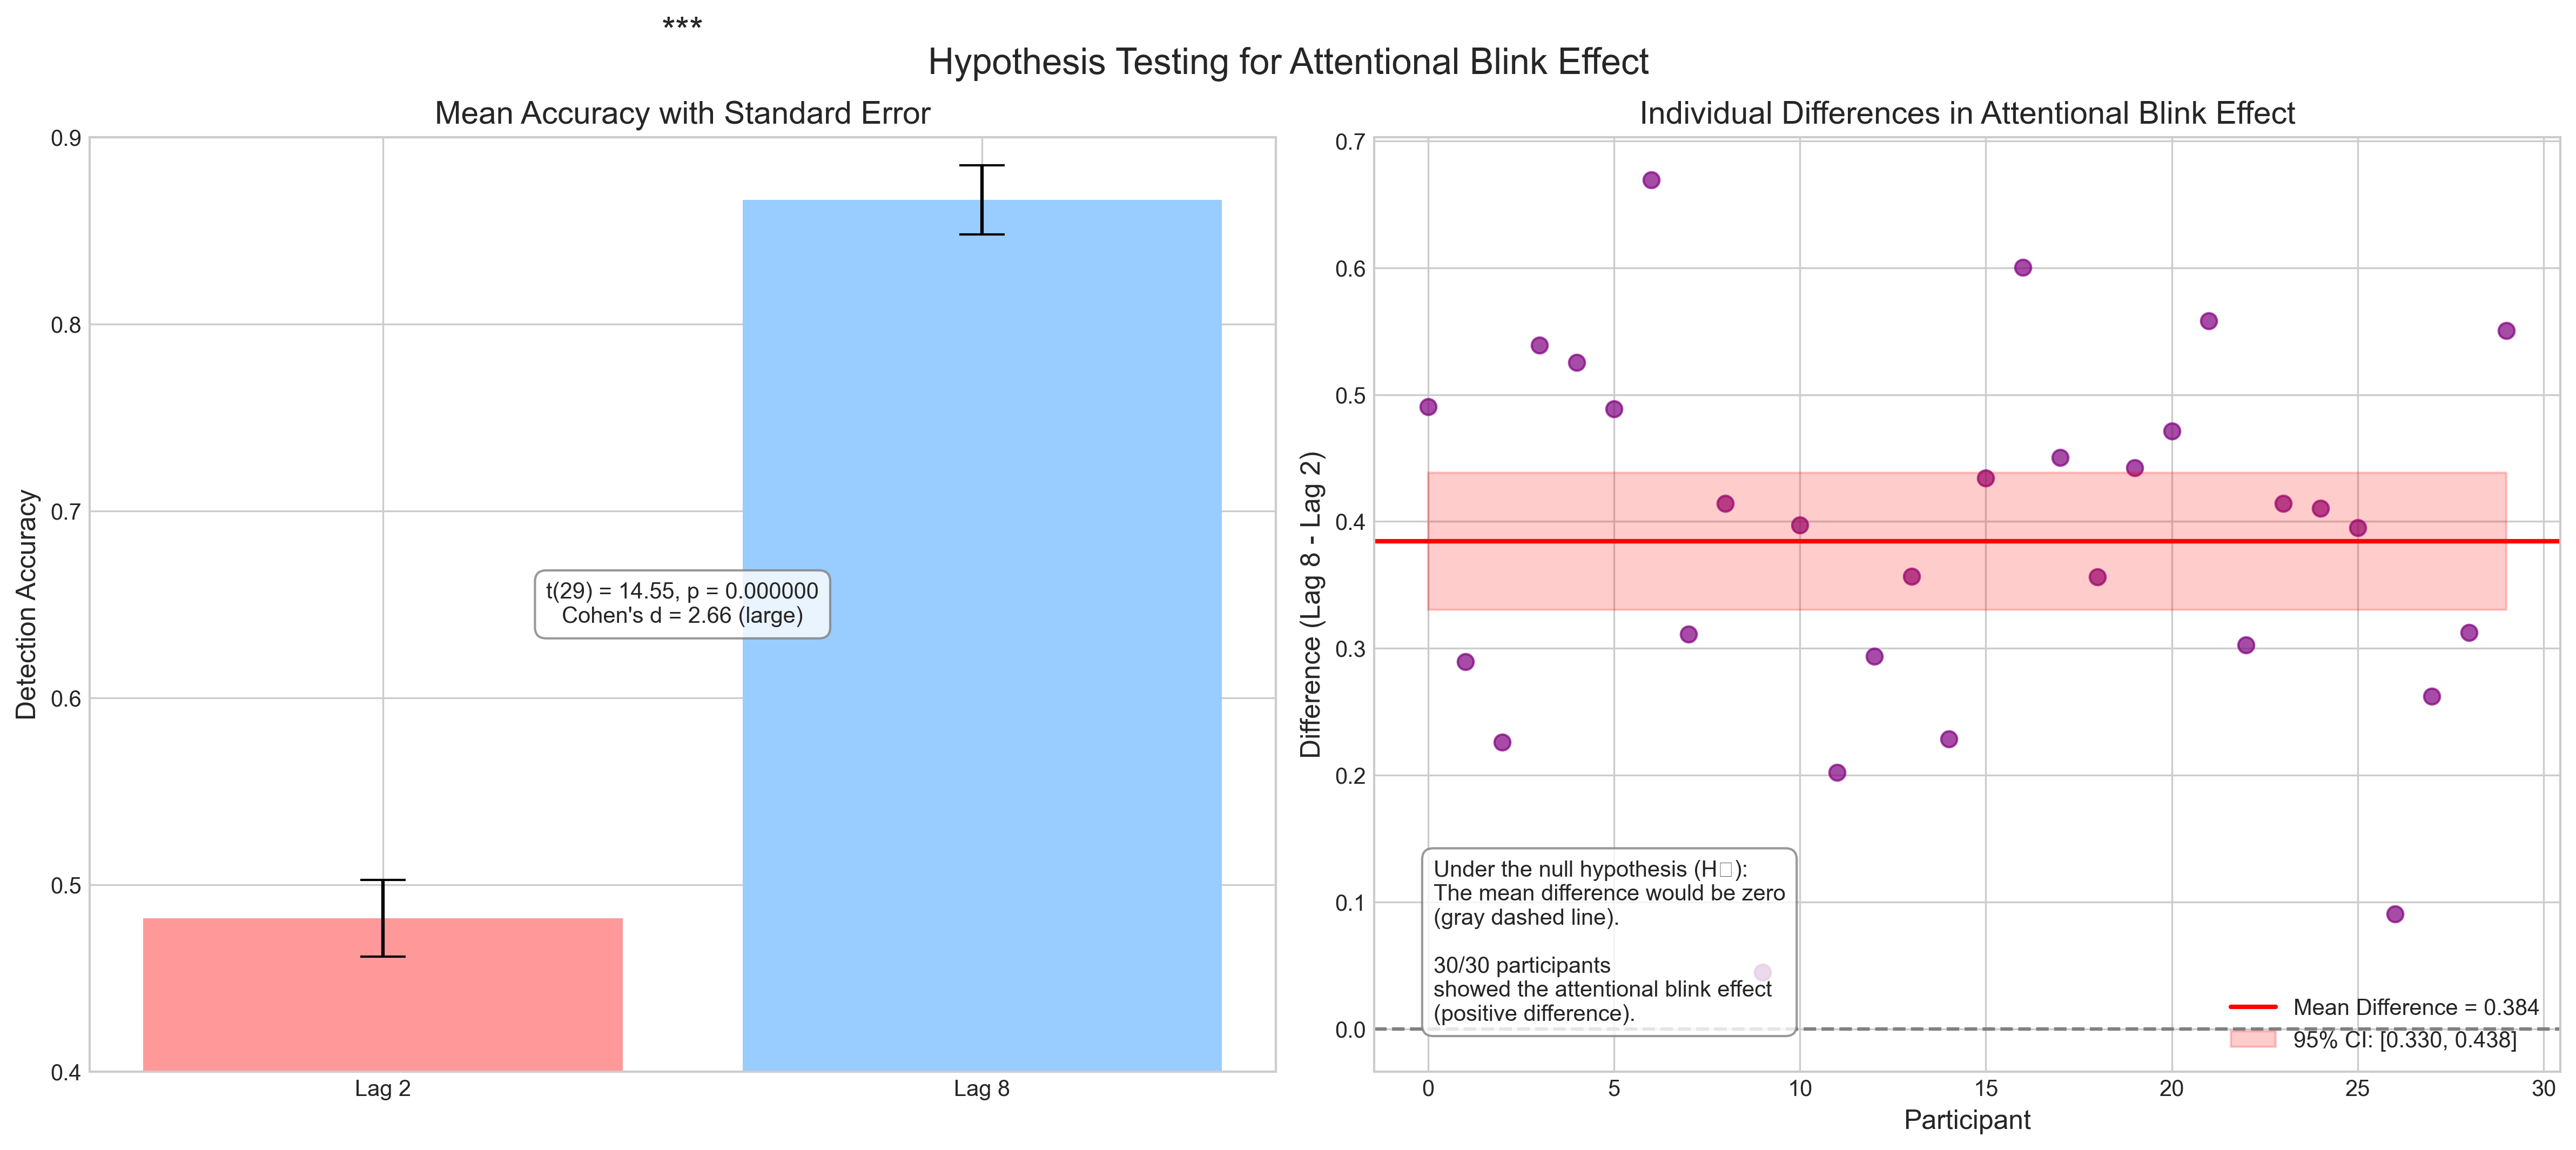

In [10]:
# Hypothesis testing for the attentional blink effect

# Extract data for Lag 2 and Lag 8
lag2_data = ab_data[:, 1]  # Second column (index 1) corresponds to Lag 2
lag8_data = ab_data[:, 7]  # Eighth column (index 7) corresponds to Lag 8

# Paired samples t-test (within-subjects design)
t_stat, p_value = stats.ttest_rel(lag8_data, lag2_data)  # Lag 8 should be higher

# Calculate effect size (Cohen's d for paired samples)
diff = lag8_data - lag2_data
d = np.mean(diff) / np.std(diff, ddof=1)

# Print the results
print("Paired Samples t-test: Lag 8 vs. Lag 2")
print("----------------------------------")
print(f"Lag 2 mean: {np.mean(lag2_data):.3f}")
print(f"Lag 8 mean: {np.mean(lag8_data):.3f}")
print(f"Mean difference: {np.mean(diff):.3f}")
print(f"t({n_subjects-1}) = {t_stat:.3f}, p = {p_value:.6f}")
print(f"Cohen's d = {d:.3f}")

# Create a more formal hypothesis testing framework
def formal_hypothesis_test():
    print("\nFormal Hypothesis Test Framework")
    print("===============================")
    
    print("1. Research Question:")
    print("   Does the attentional blink phenomenon significantly reduce target detection accuracy?")
    
    print("\n2. Hypotheses:")
    print("   Null (H₀): There is no difference in accuracy between Lag 2 and Lag 8")
    print("   Alternative (H₁): Accuracy at Lag 2 is lower than accuracy at Lag 8")
    
    print("\n3. Test Selection:")
    print("   Paired samples t-test (within-subjects design)")
    
    print("\n4. Assumptions Check:")
    print("   - Data is measured at least at the interval level")
    print("   - Differences between pairs are approximately normally distributed")
    
    # Check normality of differences
    w, p_shapiro = stats.shapiro(diff)
    print(f"   - Shapiro-Wilk test for normality: W = {w:.3f}, p = {p_shapiro:.3f}")
    print(f"   - {'Normality assumption is met (p > 0.05)' if p_shapiro > 0.05 else 'Potential violation of normality (p < 0.05), but t-test is robust for n=30'}")
    
    print("\n5. Results:")
    print(f"   - t({n_subjects-1}) = {t_stat:.3f}, p = {p_value:.6f}")
    print(f"   - Cohen's d = {d:.3f} ({interpret_cohens_d(d)})")
    
    print("\n6. Decision:")
    if p_value < 0.05:
        print("   Reject H₀: There is significant evidence that the attentional blink")
        print("   reduces target detection accuracy.")
    else:
        print("   Fail to reject H₀: There is insufficient evidence that the attentional")
        print("   blink reduces target detection accuracy.")
    
    print("\n7. Interpretation:")
    print("   The analysis confirms the presence of an attentional blink effect.")
    print(f"   Target detection accuracy is significantly lower at Lag 2 (M = {np.mean(lag2_data):.3f})")
    print(f"   compared to Lag 8 (M = {np.mean(lag8_data):.3f}), with a {interpret_cohens_d(d)} effect size.")
    print("   This aligns with the attentional blink theory, which predicts impaired")
    print("   processing of the second target when it appears 200-300ms after the first target.")

# Helper function to interpret Cohen's d
def interpret_cohens_d(d):
    d_abs = abs(d)
    if d_abs < 0.2:
        return "negligible"
    elif d_abs < 0.5:
        return "small"
    elif d_abs < 0.8:
        return "medium"
    else:
        return "large"

# Run the formal hypothesis test
formal_hypothesis_test()

# Visualize the hypothesis test
def visualize_hypothesis_test():
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 7))
    fig.suptitle('Hypothesis Testing for Attentional Blink Effect', fontsize=16)
    
    # Plot 1: Bar chart comparing means
    conditions = ['Lag 2', 'Lag 8']
    means = [np.mean(lag2_data), np.mean(lag8_data)]
    errors = [stats.sem(lag2_data), stats.sem(lag8_data)]
    
    ax1.bar(conditions, means, yerr=errors, capsize=10, color=['#FF9999', '#99CCFF'])
    ax1.set_ylabel('Detection Accuracy', fontsize=12)
    ax1.set_title('Mean Accuracy with Standard Error', fontsize=14)
    ax1.set_ylim(0.4, 0.9)
    
    # Add p-value annotation
    max_y = max(means) + max(errors) + 0.05
    ax1.plot([0, 1], [max_y, max_y], 'k-', lw=1.5)
    star = "***" if p_value < 0.001 else "**" if p_value < 0.01 else "*" if p_value < 0.05 else "ns"
    ax1.text(0.5, max_y + 0.01, star, ha='center', va='bottom', fontsize=16)
    
    # Add text annotation
    text = f"t({n_subjects-1}) = {t_stat:.2f}, p = {p_value:.6f}\nCohen's d = {d:.2f} ({interpret_cohens_d(d)})"
    ax1.text(0.5, 0.5, text, ha='center', va='center', transform=ax1.transAxes,
            bbox=dict(boxstyle="round,pad=0.5", fc="white", ec="gray", alpha=0.8))
    
    # Plot 2: Individual differences
    ax2.scatter(range(n_subjects), diff, s=50, alpha=0.7, color='purple')
    ax2.axhline(y=0, color='gray', linestyle='--')
    ax2.axhline(y=np.mean(diff), color='red', linestyle='-', lw=2, 
               label=f'Mean Difference = {np.mean(diff):.3f}')
    
    # Add 95% CI for the mean difference
    se_diff = stats.sem(diff)
    t_crit = stats.t.ppf(0.975, n_subjects-1)
    ci_lower = np.mean(diff) - t_crit * se_diff
    ci_upper = np.mean(diff) + t_crit * se_diff
    ax2.fill_between(range(n_subjects), ci_lower, ci_upper, color='red', alpha=0.2,
                    label=f'95% CI: [{ci_lower:.3f}, {ci_upper:.3f}]')
    
    ax2.set_xlabel('Participant', fontsize=12)
    ax2.set_ylabel('Difference (Lag 8 - Lag 2)', fontsize=12)
    ax2.set_title('Individual Differences in Attentional Blink Effect', fontsize=14)
    ax2.legend(loc='lower right')
    
    # Add text annotation about the null hypothesis
    h0_text = ("Under the null hypothesis (H₀):\n"
               "The mean difference would be zero\n"
               "(gray dashed line).\n\n"
               f"{len(diff[diff > 0])}/{n_subjects} participants\n"
               "showed the attentional blink effect\n"
               "(positive difference).")
    ax2.text(0.05, 0.05, h0_text, ha='left', va='bottom', transform=ax2.transAxes,
            bbox=dict(boxstyle="round,pad=0.5", fc="white", ec="gray", alpha=0.8))
    
    plt.tight_layout()
    plt.subplots_adjust(top=0.9)
    plt.show()

# Visualize the hypothesis test
visualize_hypothesis_test()

### 3.3 Common Statistical Tests in Behavioral Psychology

Psychological research employs a variety of statistical tests depending on the research question and data type. Let's review some of the most common tests and when to use them:

In [11]:
# Create a comprehensive table of common statistical tests in psychology
tests_data = [
    {
        'Test': 't-test (independent samples)',
        'Research Question': 'Is there a difference in means between two independent groups?',
        'Example in Psychology': 'Comparing memory scores between experimental and control groups',
        'Key Assumptions': 'Normal distribution or large samples; Equal variances (can be adjusted); Independence',
        'Formula': '$t = \\frac{\\bar{X}_1 - \\bar{X}_2}{\\sqrt{\\frac{s_1^2}{n_1} + \\frac{s_2^2}{n_2}}}$',
        'Effect Size': "Cohen's d = $\\frac{\\bar{X}_1 - \\bar{X}_2}{s_{pooled}}$"
    },
    {
        'Test': 't-test (paired samples)',
        'Research Question': 'Is there a difference in means between paired measurements?',
        'Example in Psychology': 'Comparing pre-test and post-test scores for the same participants',
        'Key Assumptions': 'Normal distribution of differences or large samples; Paired observations',
        'Formula': '$t = \\frac{\\bar{D}}{\\frac{s_D}{\\sqrt{n}}}$ where $\\bar{D}$ is mean difference',
        'Effect Size': "Cohen's d = $\\frac{\\bar{D}}{s_D}$"
    },
    {
        'Test': 'One-way ANOVA',
        'Research Question': 'Are there differences in means among three or more independent groups?',
        'Example in Psychology': 'Comparing reaction times across three age groups',
        'Key Assumptions': 'Normal distribution or large samples; Equal variances; Independence',
        'Formula': '$F = \\frac{MS_{between}}{MS_{within}}$',
        'Effect Size': "$\\eta^2 = \\frac{SS_{between}}{SS_{total}}$ or Cohen's f"
    },
    {
        'Test': 'Repeated measures ANOVA',
        'Research Question': 'Are there differences in means across three or more related conditions?',
        'Example in Psychology': 'Measuring performance at multiple time points',
        'Key Assumptions': 'Normality; Sphericity (equal variances of differences between all pairs)',
        'Formula': '$F = \\frac{MS_{between}}{MS_{error}}$',
        'Effect Size': "$\\eta^2_p = \\frac{SS_{effect}}{SS_{effect} + SS_{error}}$"
    },
    {
        'Test': 'Pearson correlation',
        'Research Question': 'Is there a linear relationship between two continuous variables?',
        'Example in Psychology': 'Relationship between anxiety scores and test performance',
        'Key Assumptions': 'Linear relationship; Bivariate normality; Homoscedasticity',
        'Formula': '$r = \\frac{\\sum{(X_i - \\bar{X})(Y_i - \\bar{Y})}}{\\sqrt{\\sum{(X_i - \\bar{X})^2}\\sum{(Y_i - \\bar{Y})^2}}}$',
        'Effect Size': 'r value itself ($r^2$ = proportion of variance explained)'
    },
    {
        'Test': 'Chi-square test of independence',
        'Research Question': 'Is there an association between two categorical variables?',
        'Example in Psychology': 'Testing if treatment response depends on gender',
        'Key Assumptions': 'Independence; Expected frequencies ≥ 5 in each cell',
        'Formula': '$\\chi^2 = \\sum{\\frac{(O - E)^2}{E}}$',
        'Effect Size': "Cramer's V or Phi coefficient"
    },
    {
        'Test': 'Simple linear regression',
        'Research Question': 'Can one variable predict another, and by how much?',
        'Example in Psychology': 'Predicting depression scores from stress levels',
        'Key Assumptions': 'Linearity; Independence; Homoscedasticity; Normality of residuals',
        'Formula': '$Y = \\beta_0 + \\beta_1 X + \\epsilon$',
        'Effect Size': '$R^2$ (proportion of variance explained)'
    },
    {
        'Test': 'Multiple regression',
        'Research Question': 'Can multiple variables predict an outcome?',
        'Example in Psychology': 'Predicting life satisfaction from personality traits',
        'Key Assumptions': 'Linearity; Independence; Homoscedasticity; Normality of residuals; No multicollinearity',
        'Formula': '$Y = \\beta_0 + \\beta_1 X_1 + \\beta_2 X_2 + ... + \\beta_p X_p + \\epsilon$',
        'Effect Size': '$R^2$, Adjusted $R^2$, or $f^2$'
    }
]

tests_df = pd.DataFrame(tests_data)

# Display using Markdown for better formula rendering
for i, row in tests_df.iterrows():
    print(f"### {row['Test']}")
    print(f"- **Research Question**: {row['Research Question']}")
    print(f"- **Example in Psychology**: {row['Example in Psychology']}")
    print(f"- **Key Assumptions**: {row['Key Assumptions']}")
    print(f"- **Formula**: {row['Formula']}")
    print(f"- **Effect Size**: {row['Effect Size']}")
    print("\n")

### t-test (independent samples)
- **Research Question**: Is there a difference in means between two independent groups?
- **Example in Psychology**: Comparing memory scores between experimental and control groups
- **Key Assumptions**: Normal distribution or large samples; Equal variances (can be adjusted); Independence
- **Formula**: $t = \frac{\bar{X}_1 - \bar{X}_2}{\sqrt{\frac{s_1^2}{n_1} + \frac{s_2^2}{n_2}}}$
- **Effect Size**: Cohen's d = $\frac{\bar{X}_1 - \bar{X}_2}{s_{pooled}}$


### t-test (paired samples)
- **Research Question**: Is there a difference in means between paired measurements?
- **Example in Psychology**: Comparing pre-test and post-test scores for the same participants
- **Key Assumptions**: Normal distribution of differences or large samples; Paired observations
- **Formula**: $t = \frac{\bar{D}}{\frac{s_D}{\sqrt{n}}}$ where $\bar{D}$ is mean difference
- **Effect Size**: Cohen's d = $\frac{\bar{D}}{s_D}$


### One-way ANOVA
- **Research Question**: Are there 

### 3.4 Type I and Type II Errors

In hypothesis testing, two types of errors can occur:

- **Type I error (false positive)**: Rejecting the null hypothesis when it's actually true
- **Type II error (false negative)**: Failing to reject the null hypothesis when it's actually false

These errors have important implications for psychological research. Let's explore how they work and how to balance them:

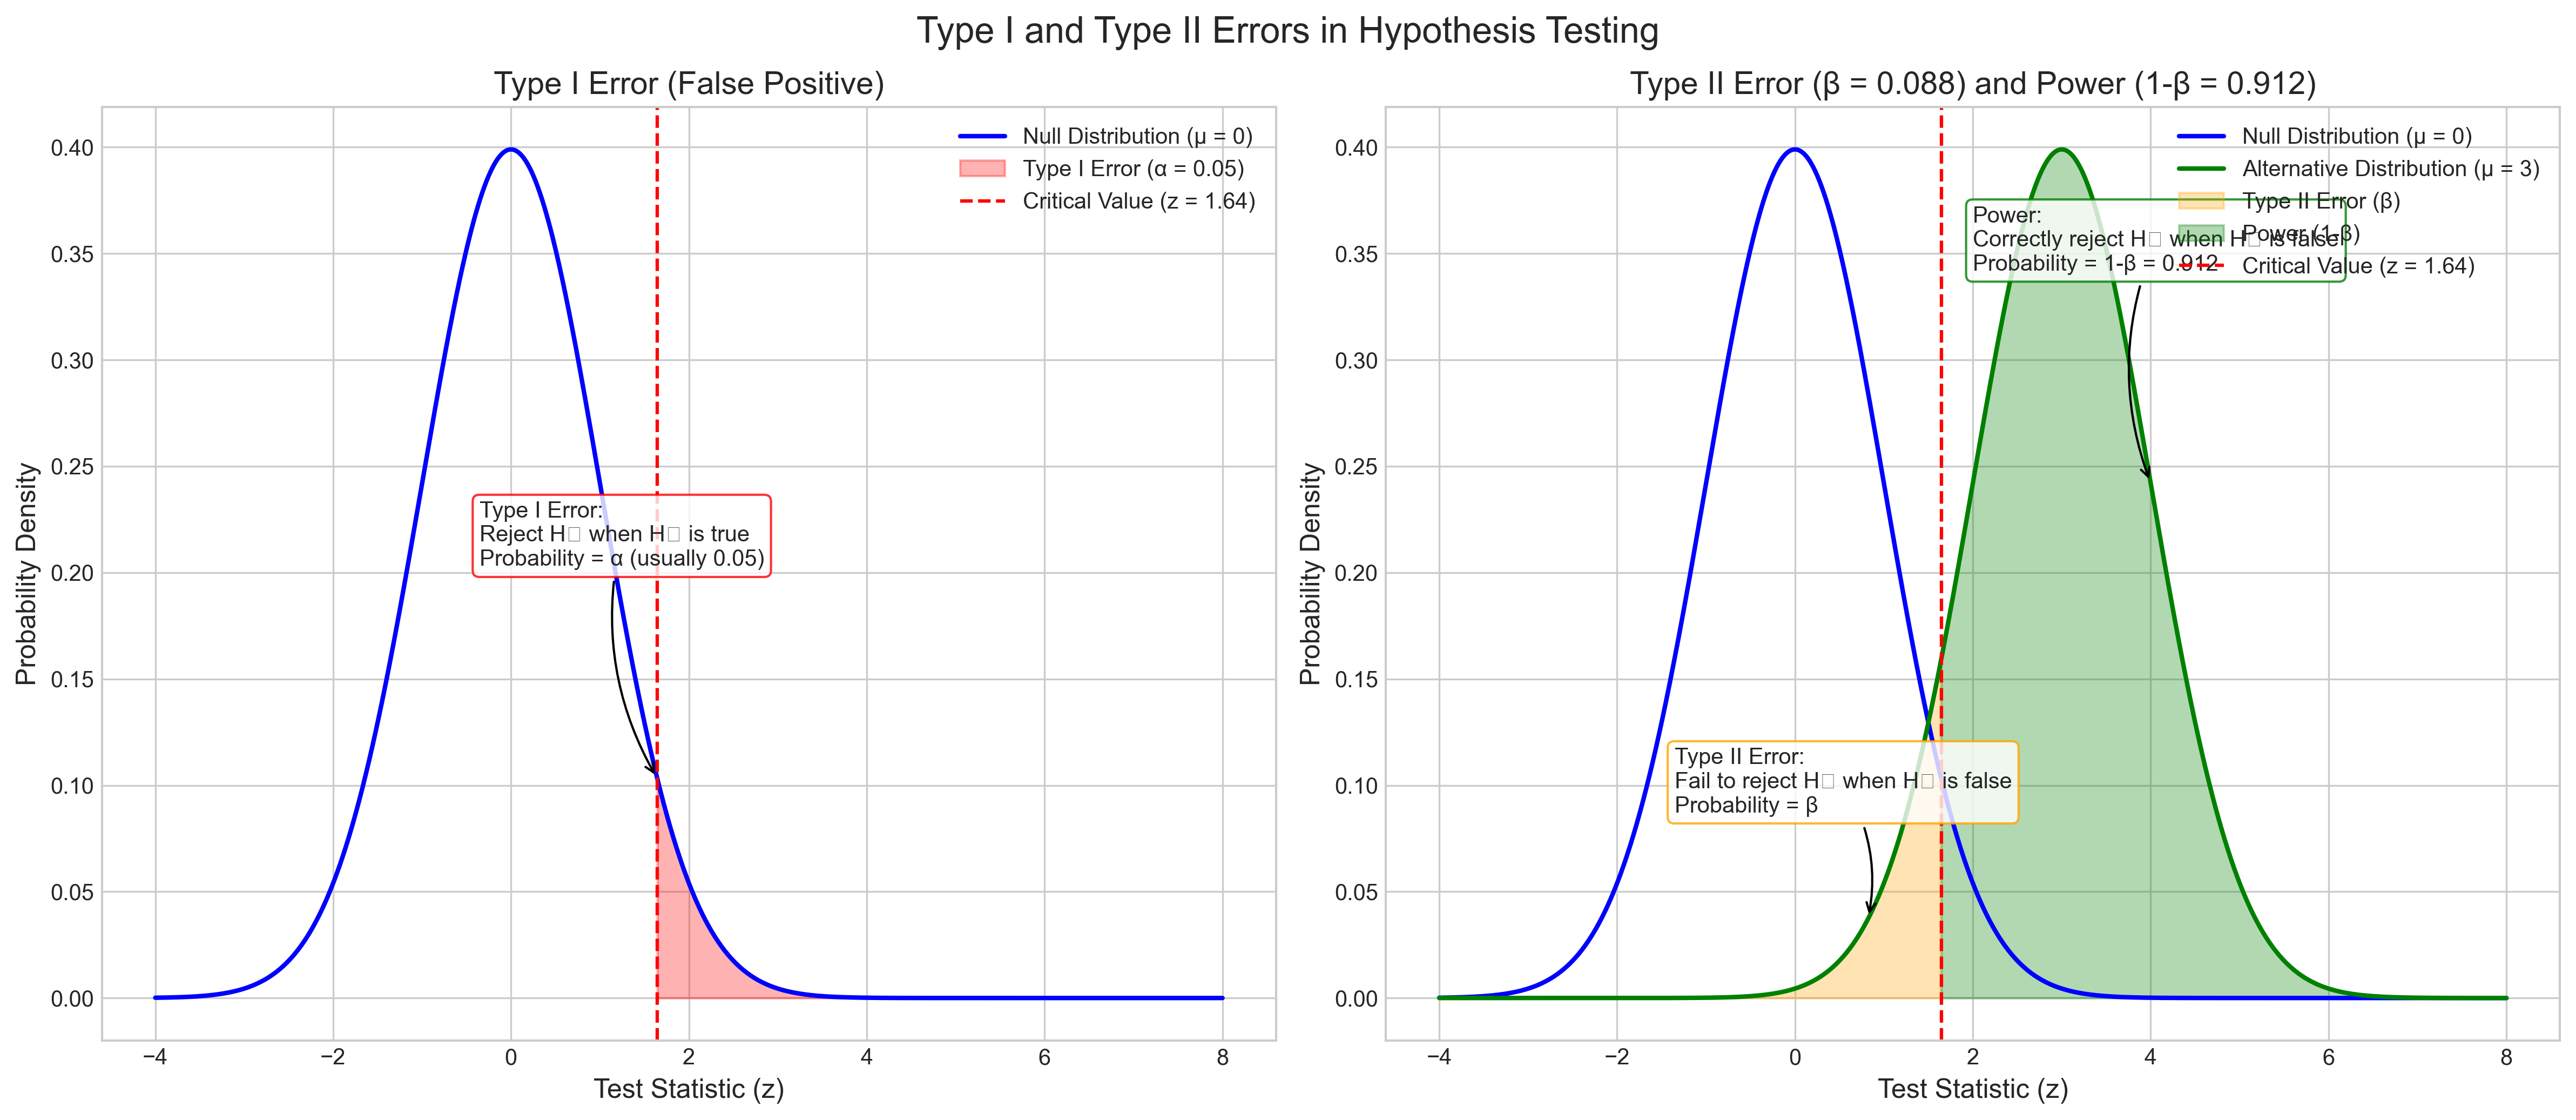

Summary of Type I and Type II Errors
---------------------------------
Type I Error (α):
  - Definition: Rejecting a true null hypothesis (false positive)
  - Probability: α = 0.05
  - Psychological example: Concluding a therapy works when it actually doesn't
  - Controlled by: Setting the significance level (α)

Type II Error (β):
  - Definition: Failing to reject a false null hypothesis (false negative)
  - Probability: β = 0.088
  - Psychological example: Concluding a therapy doesn't work when it actually does
  - Controlled by: Increasing sample size, using more sensitive measures

Power (1-β):
  - Definition: Probability of correctly rejecting a false null hypothesis
  - Value: 1-β = 0.912
  - Target: Typically aim for power ≥ 0.80
  - Influenced by: Sample size, effect size, significance level, study design


In [12]:
# Visualize Type I and Type II errors
def visualize_errors():
    # Set up the figure
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 7))
    fig.suptitle('Type I and Type II Errors in Hypothesis Testing', fontsize=16)
    
    # Parameters
    x = np.linspace(-4, 8, 1000)
    mu0 = 0      # Null hypothesis
    mu1 = 3      # Alternative hypothesis
    sigma = 1    # Standard deviation
    alpha = 0.05 # Significance level
    
    # Calculate critical value (right-tailed test)
    z_crit = stats.norm.ppf(1 - alpha)
    
    # Null and alternative distributions
    null_dist = stats.norm.pdf(x, mu0, sigma)
    alt_dist = stats.norm.pdf(x, mu1, sigma)
    
    # Plot 1: Type I Error
    ax1.plot(x, null_dist, 'b-', lw=2, label=f'Null Distribution (μ = {mu0})')
    
    # Shade Type I error region
    x_fill = x[x >= z_crit]
    y_fill = stats.norm.pdf(x_fill, mu0, sigma)
    ax1.fill_between(x_fill, y_fill, 0, color='red', alpha=0.3,
                    label=f'Type I Error (α = {alpha})')
    
    # Add critical value line
    ax1.axvline(x=z_crit, color='r', linestyle='--',
               label=f'Critical Value (z = {z_crit:.2f})')
    
    ax1.set_title('Type I Error (False Positive)', fontsize=14)
    ax1.set_xlabel('Test Statistic (z)', fontsize=12)
    ax1.set_ylabel('Probability Density', fontsize=12)
    ax1.legend()
    
    # Add annotation
    ax1.annotate(
        "Type I Error:\nReject H₀ when H₀ is true\nProbability = α (usually 0.05)",
        xy=(z_crit, stats.norm.pdf(z_crit, mu0, sigma)), xycoords='data',
        xytext=(z_crit-2, stats.norm.pdf(z_crit, mu0, sigma)+0.1), textcoords='data',
        arrowprops=dict(arrowstyle="->", connectionstyle="arc3,rad=.2"),
        bbox=dict(boxstyle="round,pad=0.3", fc="white", ec="red", alpha=0.8)
    )
    
    # Plot 2: Type II Error
    ax2.plot(x, null_dist, 'b-', lw=2, label=f'Null Distribution (μ = {mu0})')
    ax2.plot(x, alt_dist, 'g-', lw=2, label=f'Alternative Distribution (μ = {mu1})')
    
    # Shade Type II error region
    x_fill = x[x <= z_crit]
    y_fill = stats.norm.pdf(x_fill, mu1, sigma)
    ax2.fill_between(x_fill, y_fill, 0, color='orange', alpha=0.3,
                    label='Type II Error (β)')
    
    # Calculate and shade power region
    x_power = x[x > z_crit]
    y_power = stats.norm.pdf(x_power, mu1, sigma)
    ax2.fill_between(x_power, y_power, 0, color='green', alpha=0.3,
                    label=f'Power (1-β)')
    
    # Add critical value line
    ax2.axvline(x=z_crit, color='r', linestyle='--',
               label=f'Critical Value (z = {z_crit:.2f})')
    
    # Calculate beta (Type II error rate)
    beta = stats.norm.cdf(z_crit, mu1, sigma)
    power = 1 - beta
    
    ax2.set_title(f'Type II Error (β = {beta:.3f}) and Power (1-β = {power:.3f})', fontsize=14)
    ax2.set_xlabel('Test Statistic (z)', fontsize=12)
    ax2.set_ylabel('Probability Density', fontsize=12)
    ax2.legend()
    
    # Add annotation for Type II error
    ax2.annotate(
        "Type II Error:\nFail to reject H₀ when H₀ is false\nProbability = β",
        xy=(z_crit/2, stats.norm.pdf(z_crit/2, mu1, sigma)), xycoords='data',
        xytext=(z_crit-3, stats.norm.pdf(z_crit/2, mu1, sigma)+0.05), textcoords='data',
        arrowprops=dict(arrowstyle="->", connectionstyle="arc3,rad=-.2"),
        bbox=dict(boxstyle="round,pad=0.3", fc="white", ec="orange", alpha=0.8)
    )
    
    # Add annotation for Power
    ax2.annotate(
        f"Power:\nCorrectly reject H₀ when H₀ is false\nProbability = 1-β = {power:.3f}",
        xy=(mu1+1, stats.norm.pdf(mu1+1, mu1, sigma)), xycoords='data',
        xytext=(mu1-1, stats.norm.pdf(mu1+1, mu1, sigma)+0.1), textcoords='data',
        arrowprops=dict(arrowstyle="->", connectionstyle="arc3,rad=.2"),
        bbox=dict(boxstyle="round,pad=0.3", fc="white", ec="green", alpha=0.8)
    )
    
    plt.tight_layout()
    plt.subplots_adjust(top=0.9)
    plt.show()
    
    # Print summary table
    print("Summary of Type I and Type II Errors")
    print("---------------------------------")
    print("Type I Error (α):")
    print("  - Definition: Rejecting a true null hypothesis (false positive)")
    print(f"  - Probability: α = {alpha}")
    print("  - Psychological example: Concluding a therapy works when it actually doesn't")
    print("  - Controlled by: Setting the significance level (α)")
    print()
    print("Type II Error (β):")
    print("  - Definition: Failing to reject a false null hypothesis (false negative)")
    print(f"  - Probability: β = {beta:.3f}")
    print("  - Psychological example: Concluding a therapy doesn't work when it actually does")
    print("  - Controlled by: Increasing sample size, using more sensitive measures")
    print()
    print("Power (1-β):")
    print("  - Definition: Probability of correctly rejecting a false null hypothesis")
    print(f"  - Value: 1-β = {power:.3f}")
    print("  - Target: Typically aim for power ≥ 0.80")
    print("  - Influenced by: Sample size, effect size, significance level, study design")

# Visualize Type I and Type II errors
visualize_errors()

### 3.5 Multiple Comparison Problem and Corrections

In psychological research, we often perform multiple statistical tests simultaneously (e.g., comparing several conditions or examining many variables). This increases the probability of Type I errors (false positives).

For example, if we use α = 0.05 and perform 20 independent tests, the probability of at least one Type I error is:

$$P(\text{at least one Type I error}) = 1 - (1 - \alpha)^k$$

Where k is the number of tests. With k = 20 and α = 0.05:

$$P(\text{at least one Type I error}) = 1 - (1 - 0.05)^{20} = 1 - 0.95^{20} ≈ 0.64$$

That's a 64% chance of finding at least one significant result purely by chance! To address this, we use multiple comparison corrections:

Multiple Comparison Problem Simulation Results:
With 20 tests at α = 0.05:
  Empirical probability of at least one false positive: 0.6403
  Theoretical probability: 0.6415
  Average number of false positives per simulation: 0.9855


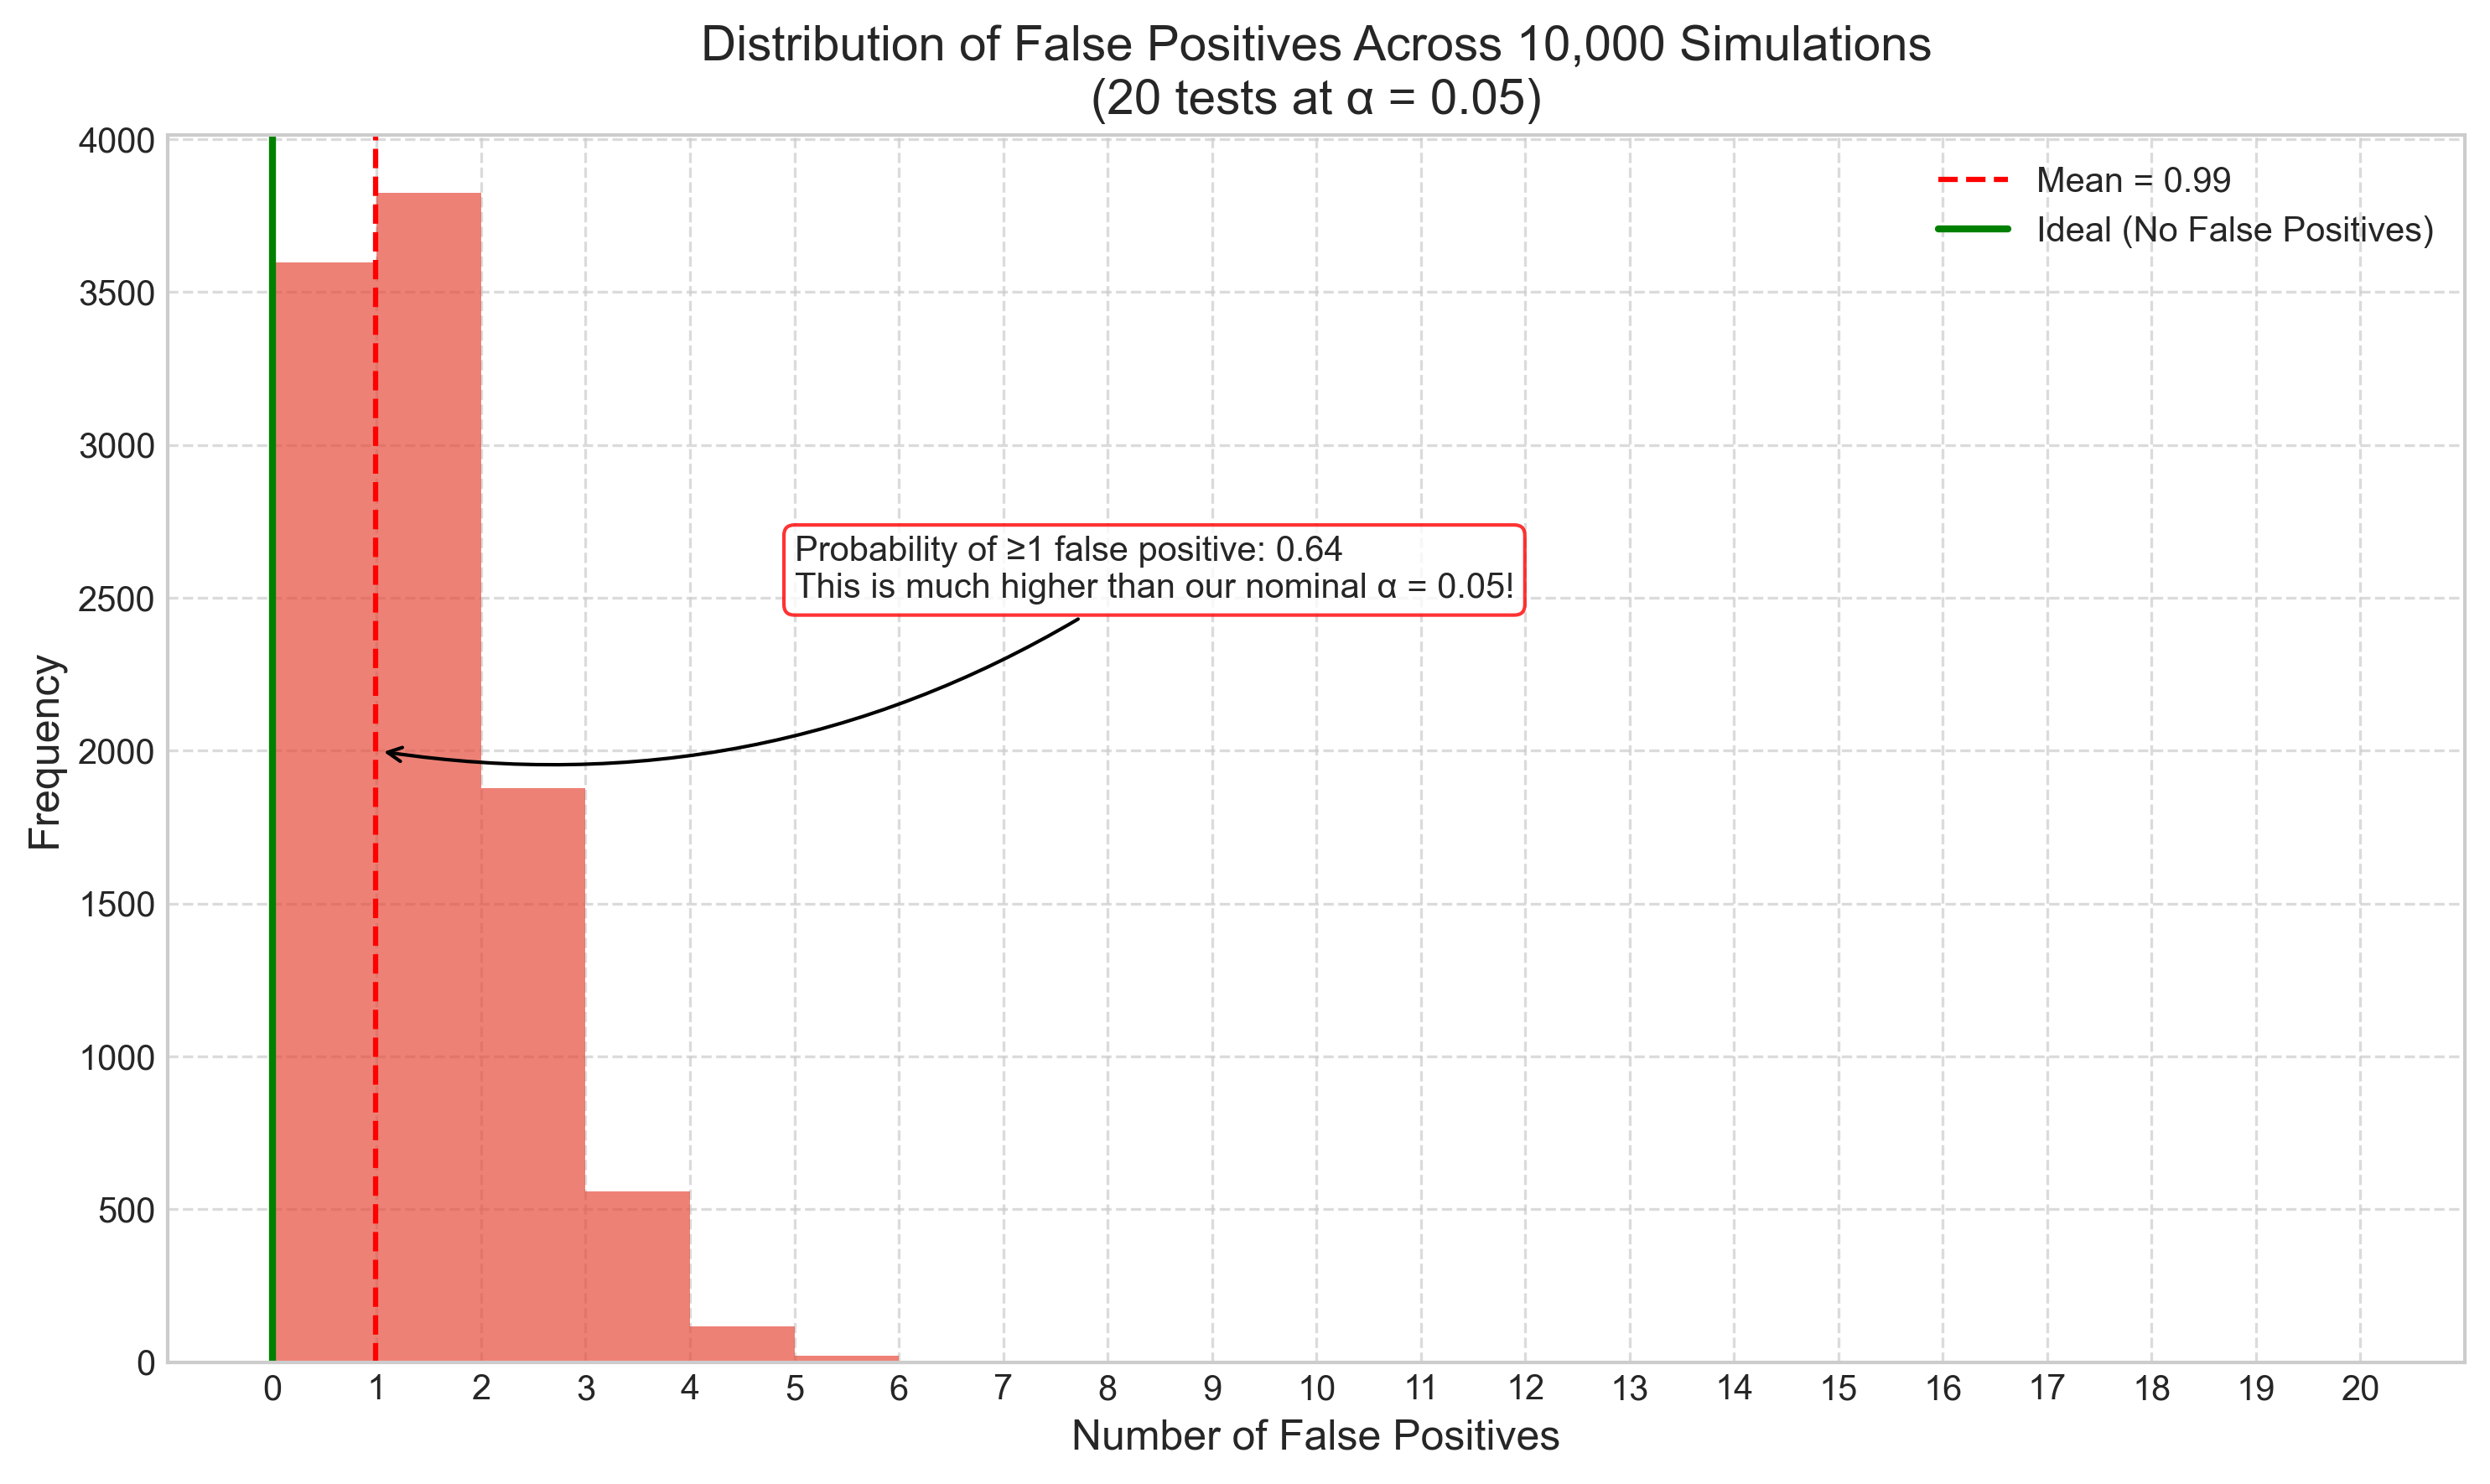


Demonstration of Multiple Comparison Correction Methods:


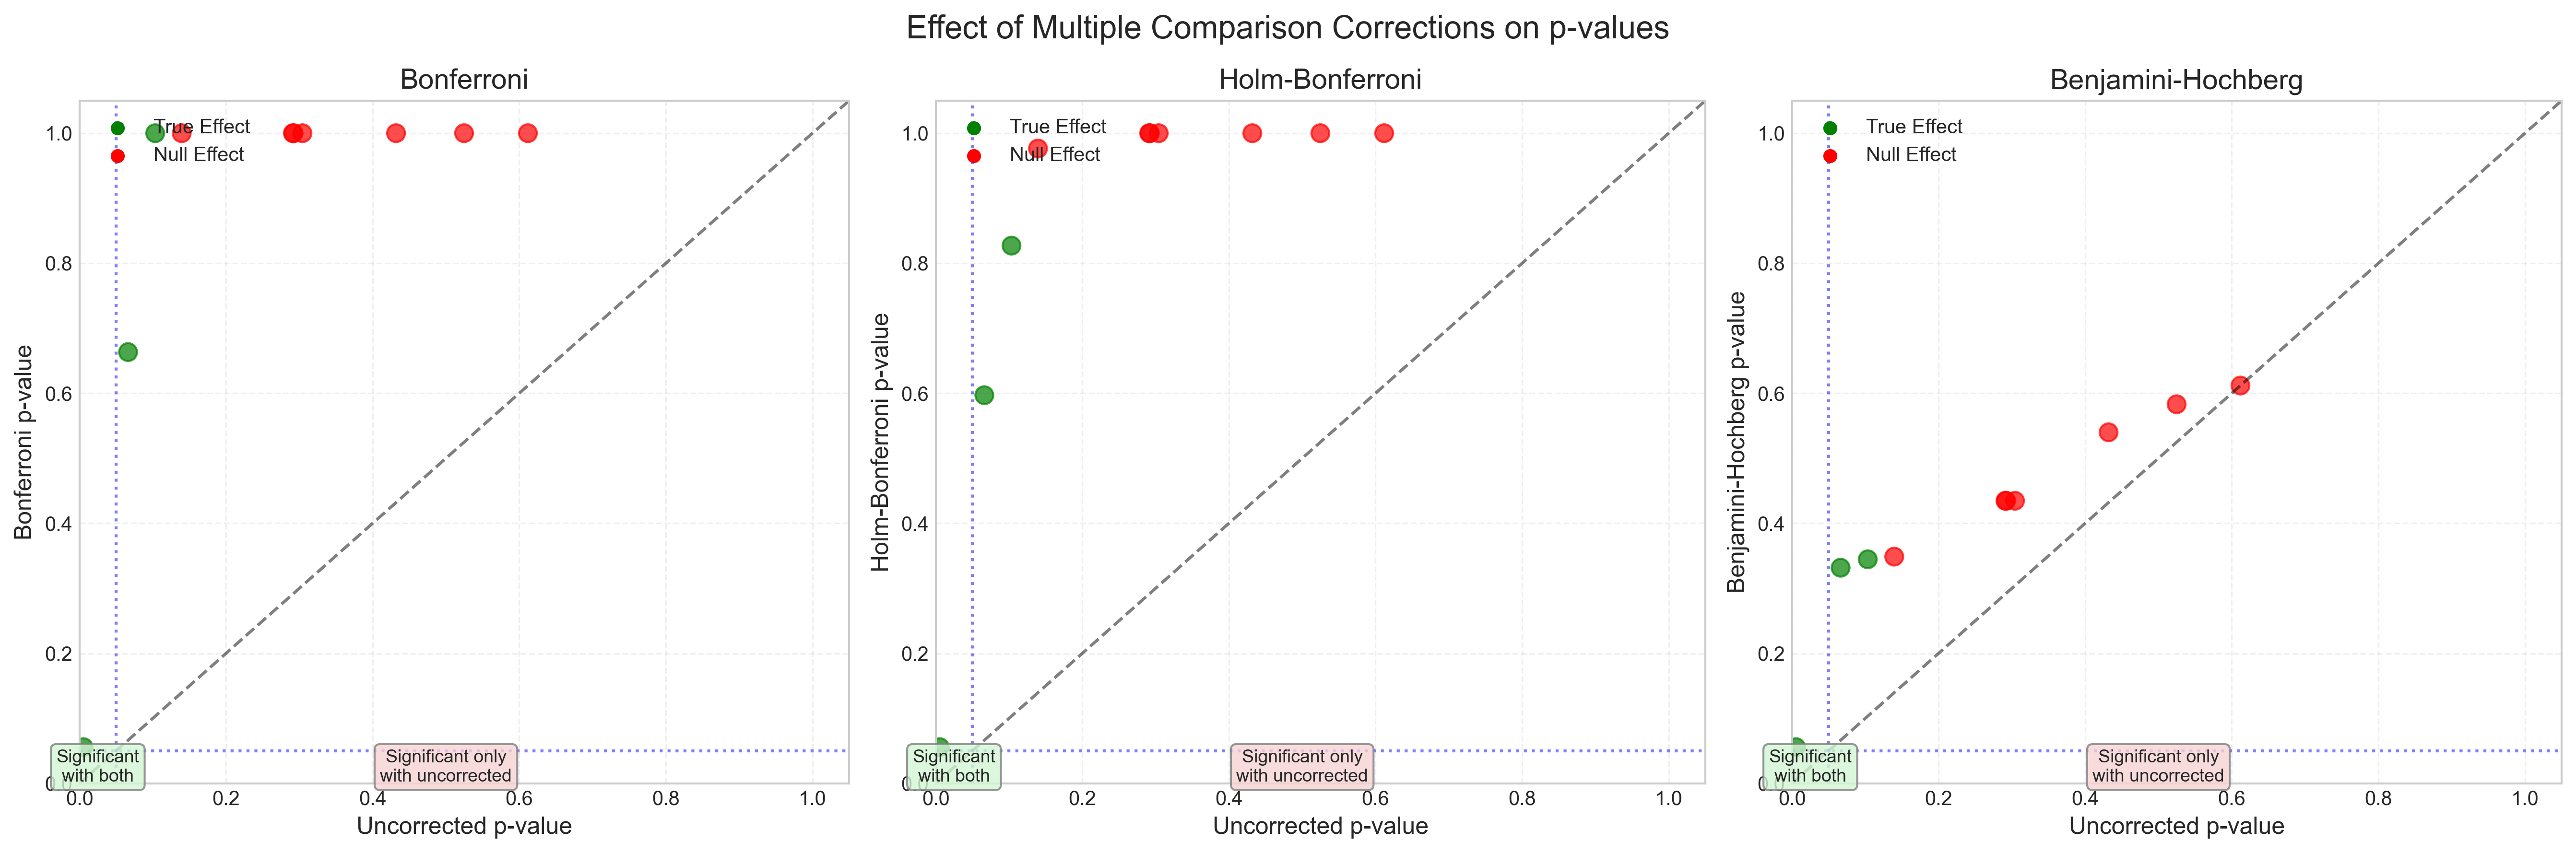

In [13]:
# Demonstrate multiple comparison corrections

# Simulate the multiple comparison problem
def simulate_multiple_comparisons(n_tests=20, n_simulations=10000, alpha=0.05):
    """Simulate multiple hypothesis tests to demonstrate the multiple comparison problem"""
    # Initialize counter for simulations with at least one Type I error
    simulations_with_error = 0
    
    # Track the number of false positives in each simulation
    false_positives_count = np.zeros(n_simulations)
    
    for i in range(n_simulations):
        # Generate p-values under the null hypothesis (uniform distribution)
        p_values = np.random.uniform(0, 1, n_tests)
        
        # Count how many tests are "significant" at alpha level
        significant_tests = sum(p_values < alpha)
        false_positives_count[i] = significant_tests
        
        # Check if at least one test is significant
        if significant_tests > 0:
            simulations_with_error += 1
    
    # Calculate empirical probability of at least one Type I error
    empirical_prob = simulations_with_error / n_simulations
    
    # Calculate theoretical probability
    theoretical_prob = 1 - (1 - alpha)**n_tests
    
    # Calculate average number of false positives
    avg_false_positives = np.mean(false_positives_count)
    
    return {
        'Empirical Probability': empirical_prob,
        'Theoretical Probability': theoretical_prob,
        'Average False Positives': avg_false_positives,
        'False Positives Distribution': false_positives_count
    }

# Demonstrate multiple comparison corrections with a realistic example
def demonstrate_corrections():
    """Demonstrate different multiple comparison corrections on a set of p-values"""
    # Set random seed for reproducibility
    np.random.seed(42)
    
    # Let's imagine we're comparing 10 conditions in an experiment
    # with 3 true effects and 7 null effects
    n_tests = 10
    n_true_effects = 3
    
    # Generate p-values
    # For true effects: p-values tend to be smaller (using beta distribution)
    true_effect_pvals = np.random.beta(1, 10, n_true_effects)  # Beta distribution favoring small values
    
    # For null effects: p-values are uniformly distributed between 0 and 1
    null_effect_pvals = np.random.uniform(0, 1, n_tests - n_true_effects)
    
    # Combine p-values and create labels for conditions
    p_values = np.concatenate([true_effect_pvals, null_effect_pvals])
    conditions = [f"Condition {i+1}" for i in range(n_tests)]
    true_status = ["True Effect" if i < n_true_effects else "Null Effect" for i in range(n_tests)]
    
    # Shuffle to randomize order
    combined = list(zip(conditions, p_values, true_status))
    np.random.shuffle(combined)
    conditions, p_values, true_status = zip(*combined)
    
    # Create dataframe
    results_df = pd.DataFrame({
        'Condition': conditions,
        'p-value': p_values,
        'True Status': true_status
    })
    
    # Apply different correction methods
    # 1. Bonferroni correction
    results_df['Bonferroni Adjusted p'] = np.minimum(results_df['p-value'] * n_tests, 1.0)
    results_df['Significant (Bonferroni)'] = results_df['Bonferroni Adjusted p'] < 0.05
    
    # 2. Holm-Bonferroni method
    sorted_pvals = np.sort(p_values)
    sorted_ranks = np.argsort(p_values)
    holm_adjusted = np.ones(n_tests)
    
    for i in range(n_tests):
        holm_adjusted[sorted_ranks[i]] = np.minimum(sorted_pvals[i] * (n_tests - i), 1.0)
        if i > 0:  # Ensure monotonicity
            holm_adjusted[sorted_ranks[i]] = max(holm_adjusted[sorted_ranks[i]], 
                                                holm_adjusted[sorted_ranks[i-1]])
    
    results_df['Holm-Bonferroni Adjusted p'] = holm_adjusted
    results_df['Significant (Holm)'] = results_df['Holm-Bonferroni Adjusted p'] < 0.05
    
    # 3. Benjamini-Hochberg procedure (controls false discovery rate)
    sorted_df = results_df.sort_values('p-value').reset_index(drop=True)
    sorted_df['BH Adjusted p'] = sorted_df['p-value'] * n_tests / (sorted_df.index + 1)
    
    # Ensure monotonicity
    for i in range(n_tests-2, -1, -1):
        sorted_df.loc[i, 'BH Adjusted p'] = min(sorted_df.loc[i, 'BH Adjusted p'],
                                               sorted_df.loc[i+1, 'BH Adjusted p'])
    
    # Cap at 1.0
    sorted_df['BH Adjusted p'] = np.minimum(sorted_df['BH Adjusted p'], 1.0)
    
    # Merge back and determine significance
    bh_adjusted = dict(zip(sorted_df['Condition'], sorted_df['BH Adjusted p']))
    results_df['BH Adjusted p'] = [bh_adjusted[cond] for cond in results_df['Condition']]
    results_df['Significant (BH)'] = results_df['BH Adjusted p'] < 0.05
    
    # 4. No correction
    results_df['Significant (Uncorrected)'] = results_df['p-value'] < 0.05
    
    # Sort by p-value for display
    results_df = results_df.sort_values('p-value').reset_index(drop=True)
    
    # Display the results table
    display_df = results_df[['Condition', 'p-value', 'Bonferroni Adjusted p', 
                           'Holm-Bonferroni Adjusted p', 'BH Adjusted p', 'True Status']]
    
    styled_display = display_df.style.format({
        'p-value': '{:.4f}',
        'Bonferroni Adjusted p': '{:.4f}',
        'Holm-Bonferroni Adjusted p': '{:.4f}',
        'BH Adjusted p': '{:.4f}'
    }).background_gradient(subset=['p-value'], cmap='Reds_r')
    
    # Apply conditional styling based on significance and true status
    def highlight_true_effects(s):
        return ['background-color: #d4f7d4' if x == 'True Effect' else '' for x in s]
    
    styled_display = styled_display.apply(highlight_true_effects, subset=['True Status'])
    
    display(styled_display.set_caption('p-values and Adjusted p-values for Multiple Tests'))
    
    # Analyze results in terms of true/false positives & negatives
    def calculate_error_rates(significance_col):
        # Count results
        true_positive = sum((results_df[significance_col]) & 
                           (results_df['True Status'] == 'True Effect'))
        false_positive = sum((results_df[significance_col]) & 
                            (results_df['True Status'] == 'Null Effect'))
        true_negative = sum((~results_df[significance_col]) & 
                           (results_df['True Status'] == 'Null Effect'))
        false_negative = sum((~results_df[significance_col]) & 
                            (results_df['True Status'] == 'True Effect'))
        
        # Calculate rates
        sensitivity = true_positive / n_true_effects if n_true_effects > 0 else 0
        specificity = true_negative / (n_tests - n_true_effects) if (n_tests - n_true_effects) > 0 else 0
        fdr = false_positive / (true_positive + false_positive) if (true_positive + false_positive) > 0 else 0
        
        return {
            'True Positives': true_positive,
            'False Positives': false_positive,
            'True Negatives': true_negative,
            'False Negatives': false_negative,
            'Sensitivity (Power)': sensitivity,
            'Specificity': specificity,
            'False Discovery Rate': fdr
        }
    
    # Calculate error rates for each method
    methods = {
        'Uncorrected': 'Significant (Uncorrected)',
        'Bonferroni': 'Significant (Bonferroni)',
        'Holm-Bonferroni': 'Significant (Holm)',
        'Benjamini-Hochberg': 'Significant (BH)'
    }
    
    comparison_rows = []
    for method_name, col_name in methods.items():
        results = calculate_error_rates(col_name)
        results['Method'] = method_name
        comparison_rows.append(results)
    
    comparison_df = pd.DataFrame(comparison_rows)
    comparison_cols = ['Method', 'True Positives', 'False Positives', 'True Negatives', 
                       'False Negatives', 'Sensitivity (Power)', 'Specificity', 'False Discovery Rate']
    
    styled_comparison = comparison_df[comparison_cols].style.format({
        'Sensitivity (Power)': '{:.2f}',
        'Specificity': '{:.2f}',
        'False Discovery Rate': '{:.2f}'
    }).set_caption('Comparison of Multiple Testing Correction Methods')
    
    display(styled_comparison)
    
    # Plot corrected vs. uncorrected p-values
    fig, axes = plt.subplots(1, 3, figsize=(18, 6))
    fig.suptitle('Effect of Multiple Comparison Corrections on p-values', fontsize=16)
    
    # Helper function for plotting
    def plot_comparison(ax, original, adjusted, title):
        ax.scatter(original, adjusted, c=results_df['True Status'].map({'True Effect': 'green', 'Null Effect': 'red'}),
                  alpha=0.7, s=80)
        
        # Add diagonal reference line
        lims = [0, 1.05]
        ax.plot(lims, lims, 'k--', alpha=0.5)
        
        # Add significance threshold lines
        ax.axhline(y=0.05, color='blue', linestyle=':', alpha=0.5)
        ax.axvline(x=0.05, color='blue', linestyle=':', alpha=0.5)
        
        # Add annotations for the quadrants
        ax.text(0.025, 0.025, "Significant\nwith both", ha='center', va='center', fontsize=9,
               bbox=dict(boxstyle="round,pad=0.3", fc="#d4f7d4", ec="gray", alpha=0.8))
        
        ax.text(0.5, 0.025, "Significant only\nwith uncorrected", ha='center', va='center', fontsize=9,
               bbox=dict(boxstyle="round,pad=0.3", fc="#f7d4d4", ec="gray", alpha=0.8))
        
        ax.set_xlabel('Uncorrected p-value', fontsize=12)
        ax.set_ylabel(f'{title} p-value', fontsize=12)
        ax.set_title(title, fontsize=14)
        ax.set_xlim(lims)
        ax.set_ylim(lims)
        ax.grid(True, linestyle='--', alpha=0.3)
        
        # Add legend
        ax.scatter([], [], c='green', label='True Effect')
        ax.scatter([], [], c='red', label='Null Effect')
        ax.legend(loc='upper left')
    
    # Plot the three correction methods
    plot_comparison(axes[0], results_df['p-value'], results_df['Bonferroni Adjusted p'], 'Bonferroni')
    plot_comparison(axes[1], results_df['p-value'], results_df['Holm-Bonferroni Adjusted p'], 'Holm-Bonferroni')
    plot_comparison(axes[2], results_df['p-value'], results_df['BH Adjusted p'], 'Benjamini-Hochberg')
    
    plt.tight_layout()
    plt.subplots_adjust(top=0.88)
    plt.show()
    
    return results_df

# Demonstrate the multiple comparison problem
simulation_results = simulate_multiple_comparisons(n_tests=20, n_simulations=10000)

print("Multiple Comparison Problem Simulation Results:")
print(f"With 20 tests at α = 0.05:")
print(f"  Empirical probability of at least one false positive: {simulation_results['Empirical Probability']:.4f}")
print(f"  Theoretical probability: {simulation_results['Theoretical Probability']:.4f}")
print(f"  Average number of false positives per simulation: {simulation_results['Average False Positives']:.4f}")

# Plot the distribution of false positives
plt.figure(figsize=(10, 6))
plt.hist(simulation_results['False Positives Distribution'], bins=range(21), alpha=0.7, color='#e74c3c')
plt.axvline(x=simulation_results['Average False Positives'], color='red', linestyle='--',
           label=f'Mean = {simulation_results["Average False Positives"]:.2f}')
plt.axvline(x=0, color='green', linestyle='-', linewidth=2,
           label='Ideal (No False Positives)')
plt.title('Distribution of False Positives Across 10,000 Simulations\n(20 tests at α = 0.05)', fontsize=14)
plt.xlabel('Number of False Positives', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.xticks(range(0, 21, 1))
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend()

# Add annotation
plt.annotate(
    f"Probability of ≥1 false positive: {simulation_results['Empirical Probability']:.2f}\n"
    f"This is much higher than our nominal α = 0.05!",
    xy=(1, 2000), xycoords='data',
    xytext=(5, 2500), textcoords='data',
    arrowprops=dict(arrowstyle="->", connectionstyle="arc3,rad=-.2"),
    bbox=dict(boxstyle="round,pad=0.3", fc="white", ec="red", alpha=0.8)
)

plt.tight_layout()
plt.show()

# Now demonstrate the correction methods
print("\nDemonstration of Multiple Comparison Correction Methods:")
correction_results = demonstrate_corrections()

### 3.6 Bayesian Perspective on Inference

Traditional (frequentist) hypothesis testing has limitations, particularly in how p-values are interpreted. Bayesian statistics offers an alternative approach that:

1. Incorporates prior knowledge
2. Provides direct probability statements about hypotheses
3. Updates beliefs as new evidence accumulates

Let's compare frequentist and Bayesian approaches using a simple example in psychology:

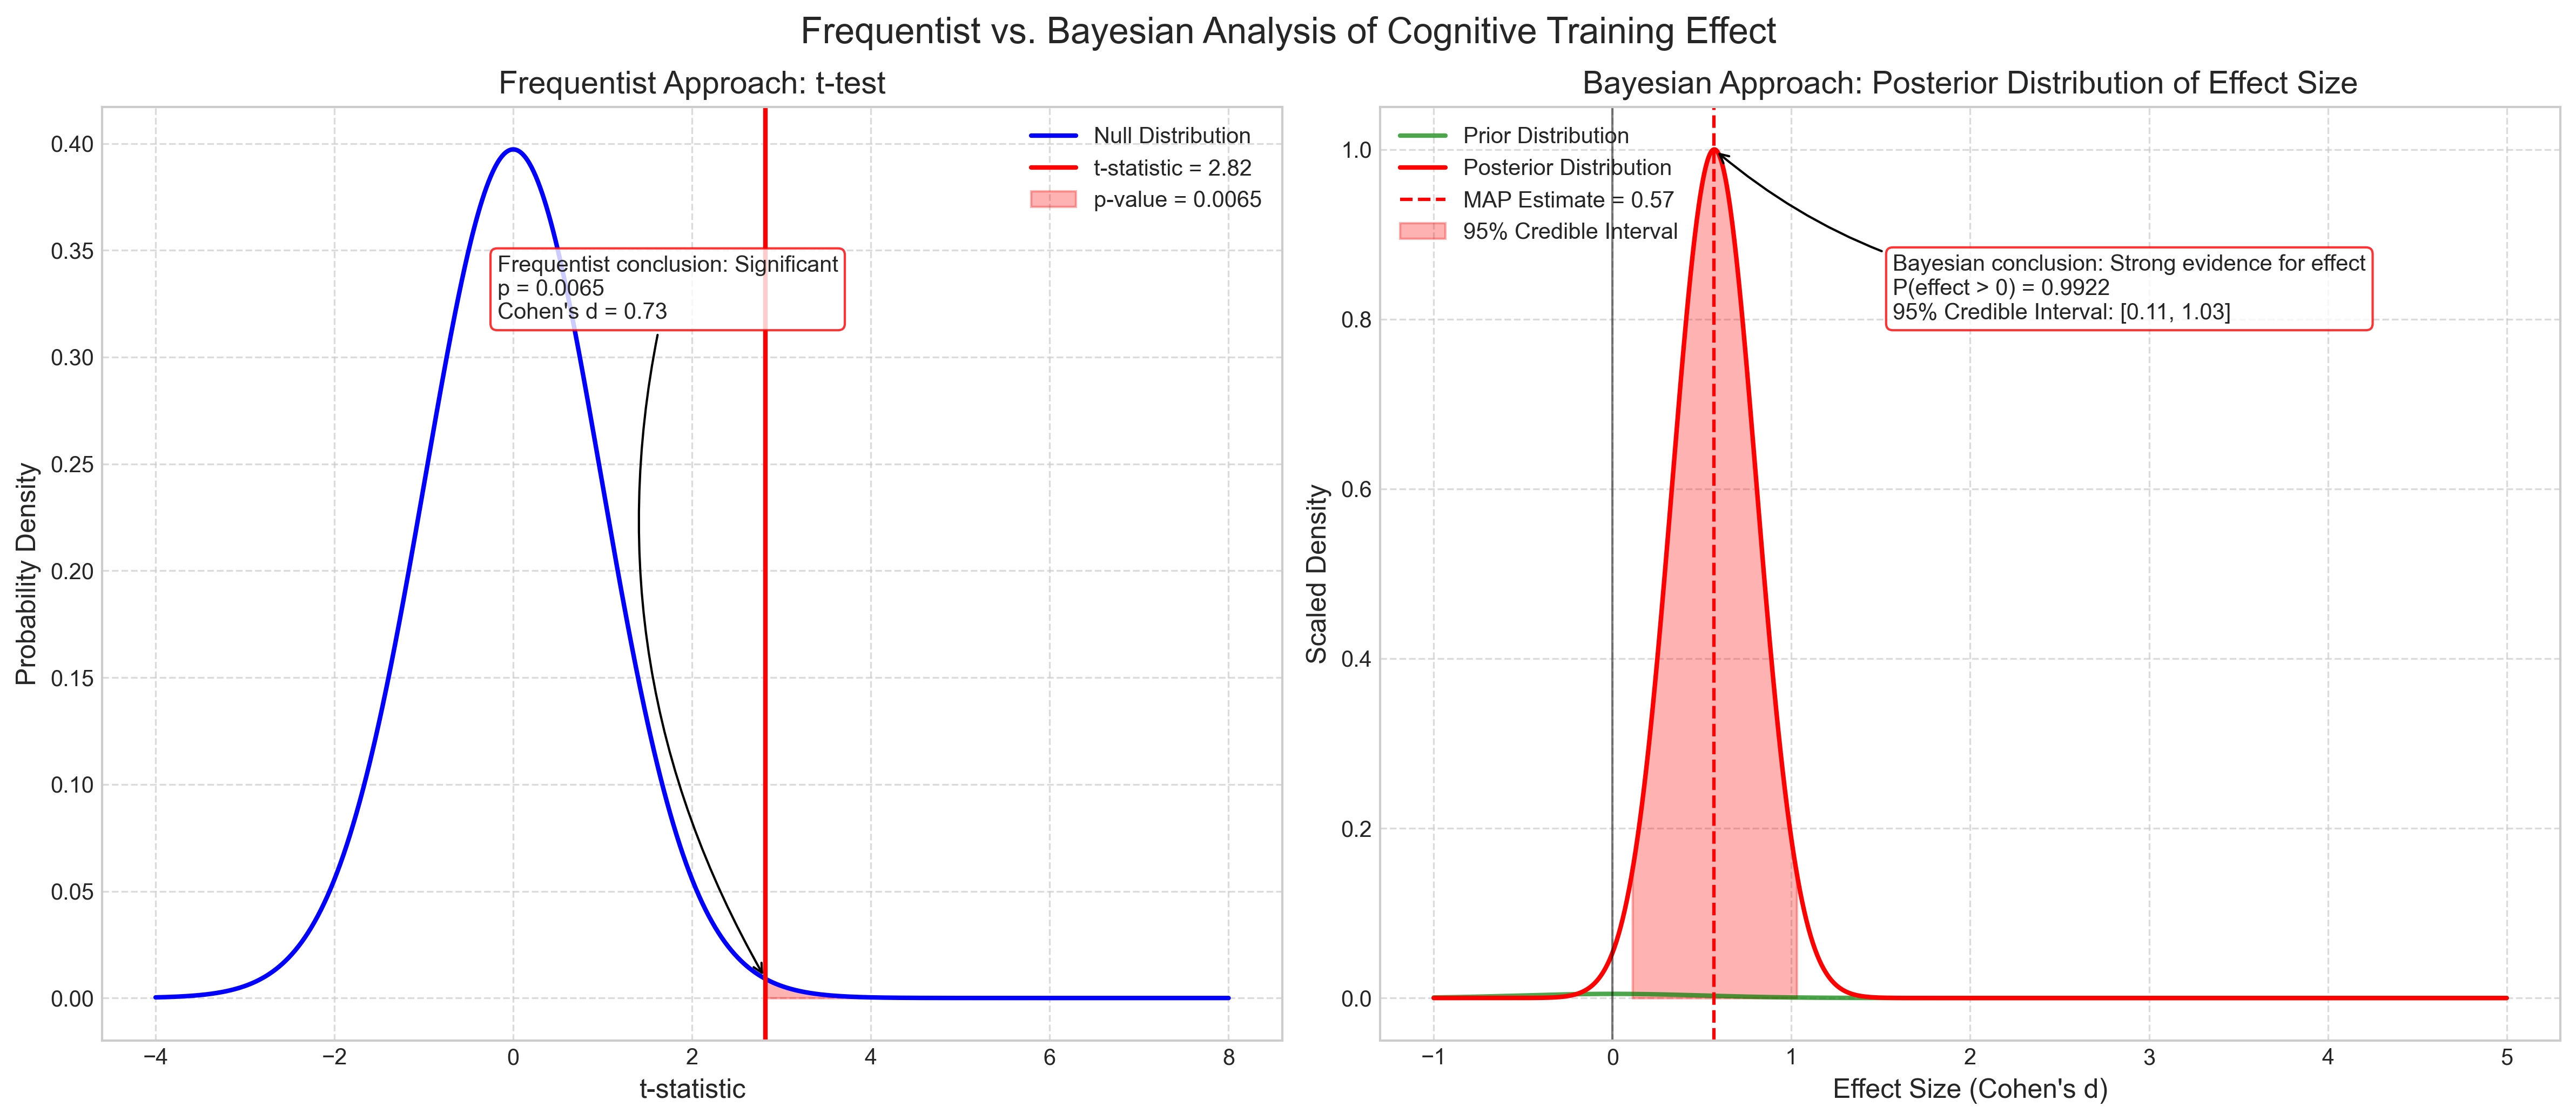

In [14]:
# Simulate a Bayesian analysis for a simple psychology experiment
# Example: Testing whether a cognitive training program improves memory

def bayesian_analysis_example():
    # Set random seed for reproducibility
    np.random.seed(42)
    
    # Simulate data from an experiment
    # Control group: memory score improvement
    control_mean = 2  # Points of improvement
    control_sd = 5    # Standard deviation
    n_control = 30    # Sample size
    
    # Treatment group: memory score improvement
    treatment_effect = 3  # True effect of treatment
    treatment_mean = control_mean + treatment_effect
    treatment_sd = 5  # Same variance assumed
    n_treatment = 30  # Sample size
    
    # Generate data
    control_data = np.random.normal(control_mean, control_sd, n_control)
    treatment_data = np.random.normal(treatment_mean, treatment_sd, n_treatment)
    
    # 1. Frequentist analysis (t-test)
    t_stat, p_value = stats.ttest_ind(treatment_data, control_data, equal_var=True)
    
    # Calculate effect size (Cohen's d)
    pooled_sd = np.sqrt(((n_control - 1) * np.var(control_data, ddof=1) + 
                        (n_treatment - 1) * np.var(treatment_data, ddof=1)) / 
                       (n_control + n_treatment - 2))
    observed_d = (np.mean(treatment_data) - np.mean(control_data)) / pooled_sd
    
    # 2. Bayesian analysis
    # Let's define priors for the effect size
    # For simplicity, we'll use a Gaussian distribution centered at 0 with SD = 0.5
    # This represents a skeptical prior that small effects are more likely than large ones
    prior_mean = 0
    prior_sd = 0.5
    
    # Calculate the likelihood of the data given different effect sizes
    effect_sizes = np.linspace(-1, 5, 1000)
    likelihoods = []
    
    for effect in effect_sizes:
        # For each possible effect size, calculate how likely our observed data would be
        # This is based on the t-distribution with n_control + n_treatment - 2 degrees of freedom
        df = n_control + n_treatment - 2
        ncp = effect * np.sqrt((n_control * n_treatment) / (n_control + n_treatment))  # Non-centrality parameter
        likelihood = stats.nct.pdf(t_stat, df, ncp)
        likelihoods.append(likelihood)
    
    # Calculate the prior at each effect size
    priors = stats.norm.pdf(effect_sizes, prior_mean, prior_sd)
    
    # Calculate the unnormalized posterior (prior * likelihood)
    unnormalized_posterior = priors * likelihoods
    
    # Normalize to get proper posterior distribution
    posterior = unnormalized_posterior / np.sum(unnormalized_posterior)
    
    # Find the maximum a posteriori (MAP) estimate
    map_index = np.argmax(posterior)
    map_effect = effect_sizes[map_index]
    
    # Calculate 95% credible interval
    cumulative_posterior = np.cumsum(posterior)
    lower_idx = np.searchsorted(cumulative_posterior, 0.025)
    upper_idx = np.searchsorted(cumulative_posterior, 0.975)
    credible_interval = (effect_sizes[lower_idx], effect_sizes[upper_idx])
    
    # Calculate probability that effect is greater than zero
    p_effect_gt_zero = np.sum(posterior[effect_sizes > 0])
    
    # Create plots to compare the approaches
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 7))
    fig.suptitle('Frequentist vs. Bayesian Analysis of Cognitive Training Effect', fontsize=16)
    
    # Plot 1: Frequentist perspective (sampling distribution under null hypothesis)
    x = np.linspace(-4, 8, 1000)
    null_dist = stats.t.pdf(x, n_control + n_treatment - 2)  # t-distribution with appropriate df
    
    ax1.plot(x, null_dist, 'b-', lw=2, label='Null Distribution')
    ax1.axvline(x=t_stat, color='r', linestyle='-', lw=2,
               label=f't-statistic = {t_stat:.2f}')
    
    # Shade p-value region
    if t_stat > 0:
        x_fill = x[x >= t_stat]
        y_fill = stats.t.pdf(x_fill, n_control + n_treatment - 2)
    else:
        x_fill = x[x <= t_stat]
        y_fill = stats.t.pdf(x_fill, n_control + n_treatment - 2)
    
    ax1.fill_between(x_fill, y_fill, 0, color='red', alpha=0.3,
                    label=f'p-value = {p_value:.4f}')
    
    ax1.set_title('Frequentist Approach: t-test', fontsize=14)
    ax1.set_xlabel('t-statistic', fontsize=12)
    ax1.set_ylabel('Probability Density', fontsize=12)
    ax1.legend()
    ax1.grid(True, linestyle='--', alpha=0.7)
    
    # Add annotation
    frequentist_conclusion = "Significant" if p_value < 0.05 else "Not Significant"
    ax1.annotate(
        f"Frequentist conclusion: {frequentist_conclusion}\n"
        f"p = {p_value:.4f}\n"
        f"Cohen's d = {observed_d:.2f}",
        xy=(t_stat, stats.t.pdf(t_stat, n_control + n_treatment - 2)),
        xytext=(t_stat - 3, stats.t.pdf(0, n_control + n_treatment - 2)*0.8),
        arrowprops=dict(arrowstyle="->", connectionstyle="arc3,rad=.2"),
        bbox=dict(boxstyle="round,pad=0.3", fc="white", ec="red", alpha=0.8)
    )
    
    # Plot 2: Bayesian perspective
    ax2.plot(effect_sizes, priors / np.sum(priors), 'g-', lw=2, alpha=0.7, 
            label='Prior Distribution')
    ax2.plot(effect_sizes, posterior / np.max(posterior), 'r-', lw=2,
            label='Posterior Distribution')
    
    # Mark MAP estimate
    ax2.axvline(x=map_effect, color='r', linestyle='--', lw=1.5,
               label=f'MAP Estimate = {map_effect:.2f}')
    
    # Shade credible interval
    ci_x = effect_sizes[(effect_sizes >= credible_interval[0]) & (effect_sizes <= credible_interval[1])]
    ci_y = posterior[(effect_sizes >= credible_interval[0]) & (effect_sizes <= credible_interval[1])] / np.max(posterior)
    ax2.fill_between(ci_x, ci_y, 0, color='red', alpha=0.3,
                    label=f'95% Credible Interval')
    
    # Mark zero effect
    ax2.axvline(x=0, color='k', linestyle='-', lw=1, alpha=0.5)
    
    ax2.set_title('Bayesian Approach: Posterior Distribution of Effect Size', fontsize=14)
    ax2.set_xlabel('Effect Size (Cohen\'s d)', fontsize=12)
    ax2.set_ylabel('Scaled Density', fontsize=12)
    ax2.legend(loc='upper left')
    ax2.grid(True, linestyle='--', alpha=0.7)
    
    # Add annotation
    bayesian_conclusion = "Strong evidence" if p_effect_gt_zero > 0.95 else \
                          "Moderate evidence" if p_effect_gt_zero > 0.9 else \
                          "Weak evidence" if p_effect_gt_zero > 0.8 else "Insufficient evidence"
    ax2.annotate(
        f"Bayesian conclusion: {bayesian_conclusion} for effect\n"
        f"P(effect > 0) = {p_effect_gt_zero:.4f}\n"
        f"95% Credible Interval: [{credible_interval[0]:.2f}, {credible_interval[1]:.2f}]",
        xy=(map_effect, posterior[map_index] / np.max(posterior)),
        xytext=(map_effect + 1, 0.8),
        arrowprops=dict(arrowstyle="->", connectionstyle="arc3,rad=-.2"),
        bbox=dict(boxstyle="round,pad=0.3", fc="white", ec="red", alpha=0.8)
    )
    
    plt.tight_layout()
    plt.subplots_adjust(top=0.9)
    plt.show()
    
    # Display a summary table comparing the approaches
    comparison = pd.DataFrame([
        ['Question', 'Is there a significant difference?', 'What is the effect size and how certain are we?'],
        ['Calculation', f't-test: t({n_control + n_treatment - 2}) = {t_stat:.2f}, p = {p_value:.4f}',
         f'Posterior distribution with 95% CI: [{credible_interval[0]:.2f}, {credible_interval[1]:.2f}]'],
        ['Interpretation', f'Effect is {"significant" if p_value < 0.05 else "not significant"} at α = 0.05',
         f'There is a {p_effect_gt_zero*100:.1f}% probability that the effect is positive'],
        ['Strengths', 'Simple, widely accepted, established procedure',
         'Incorporates prior knowledge, gives direct probability of hypothesis'],
        ['Limitations', 'Cannot state probability of hypothesis, prone to misinterpretation',
         'Requires specification of prior, computationally intensive']
    ], columns=['Aspect', 'Frequentist Approach', 'Bayesian Approach'])
    
    # Display the comparison table
    styled_comparison = comparison.style.set_properties(**{
        'text-align': 'left',
        'white-space': 'pre-wrap',
        'font-size': '11pt',
        'border': '1px solid gray'
    }).set_table_styles([
        {'selector': 'th', 'props': [('text-align', 'center'), ('font-weight', 'bold'), 
                                    ('background-color', '#f0f0f0')]},
        {'selector': 'caption', 'props': [('font-size', '14pt'), ('font-weight', 'bold')]}
    ]).set_caption('Comparison of Frequentist and Bayesian Approaches to Statistical Inference')
    
    display(styled_comparison)
    
    return {
        'Frequentist': {
            't-statistic': t_stat,
            'p-value': p_value,
            "Cohen's d": observed_d
        },
        'Bayesian': {
            'MAP estimate': map_effect,
            'Credible interval': credible_interval,
            'P(effect > 0)': p_effect_gt_zero
        }
    }

# Run the Bayesian analysis example
bayesian_results = bayesian_analysis_example()

## 4. The Bootstrap Method in Psychological Research

The bootstrap is a powerful resampling technique that allows researchers to estimate sampling distributions and calculate confidence intervals without making strong parametric assumptions. This is particularly valuable in psychology, where data often doesn't conform to theoretical distributions.

### 4.1 Basic Principles of Bootstrapping

The bootstrap works by treating the observed sample as a stand-in for the population, then repeatedly drawing random samples with replacement from this observed sample. For each resampled dataset, we calculate the statistic of interest, creating an empirical sampling distribution.

Let's explore the bootstrap method using a memory recall experiment example:

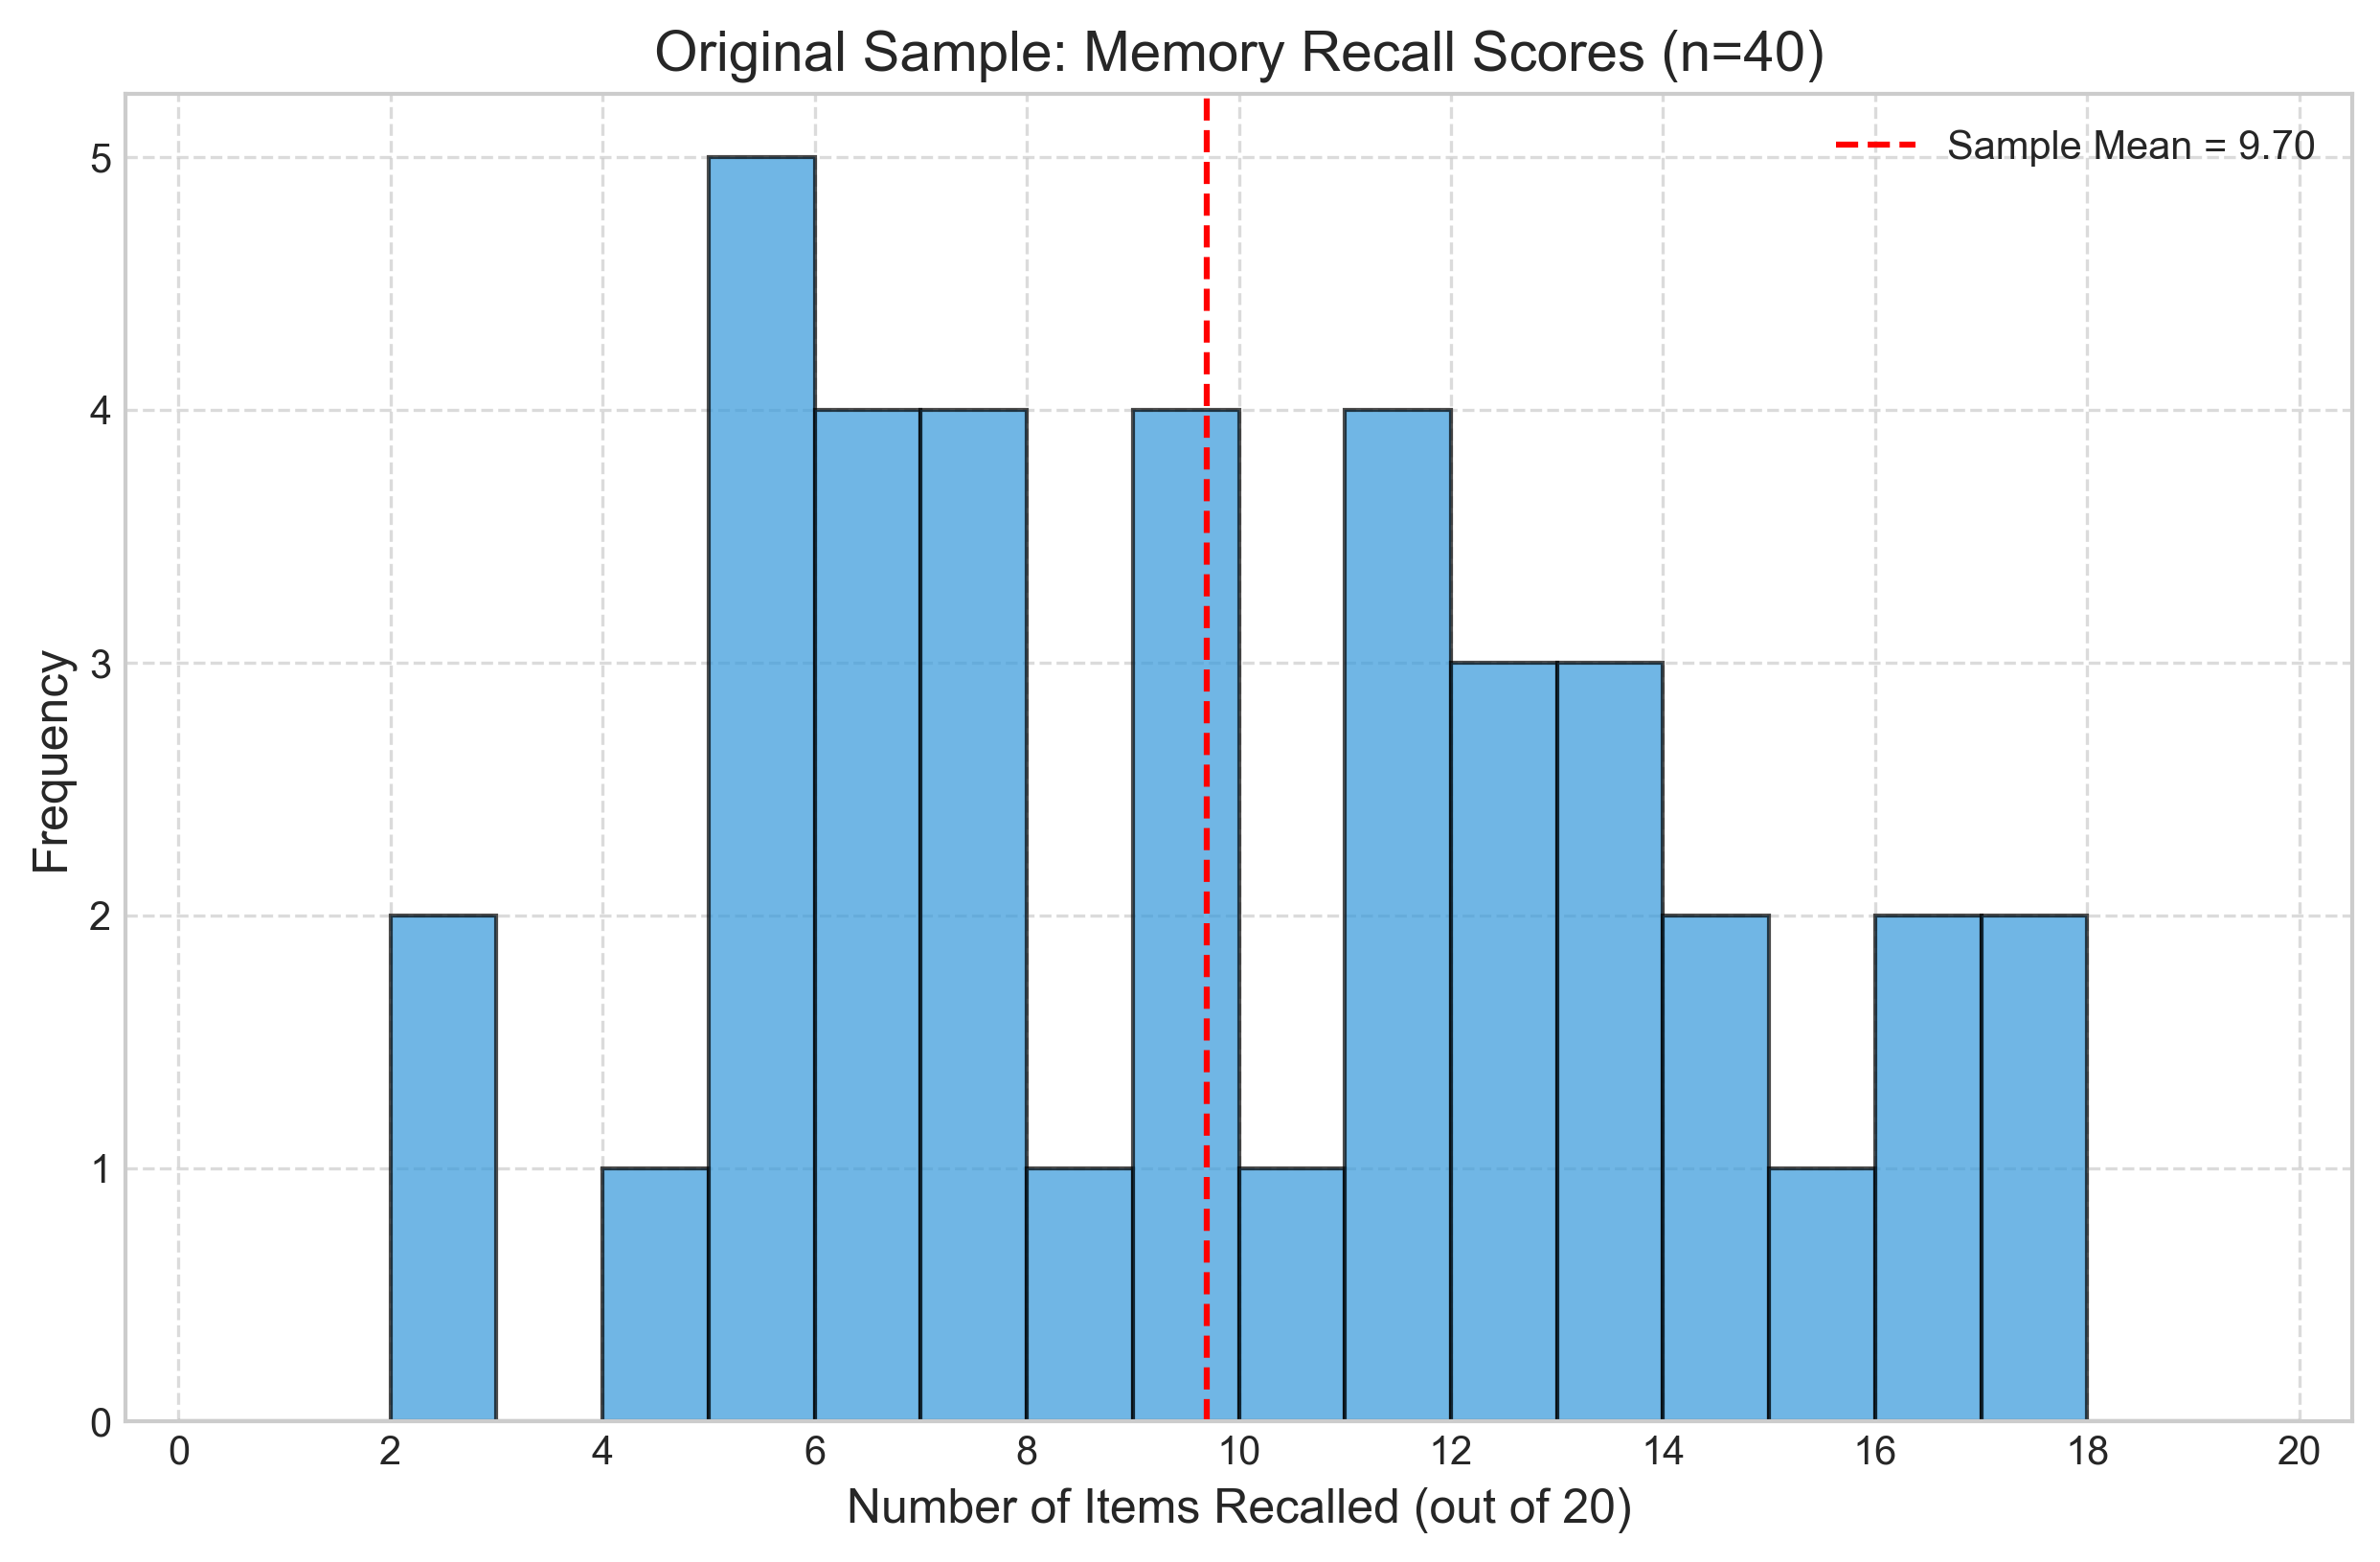

Original Sample Summary Statistics:
Mean: 9.70
Median: 9.00
Standard Deviation: 4.48
Min: 2
Max: 21

Shapiro-Wilk test for normality: W = 0.969, p = 0.3332
Inference: Data appears normally distributed (at α = 0.05)


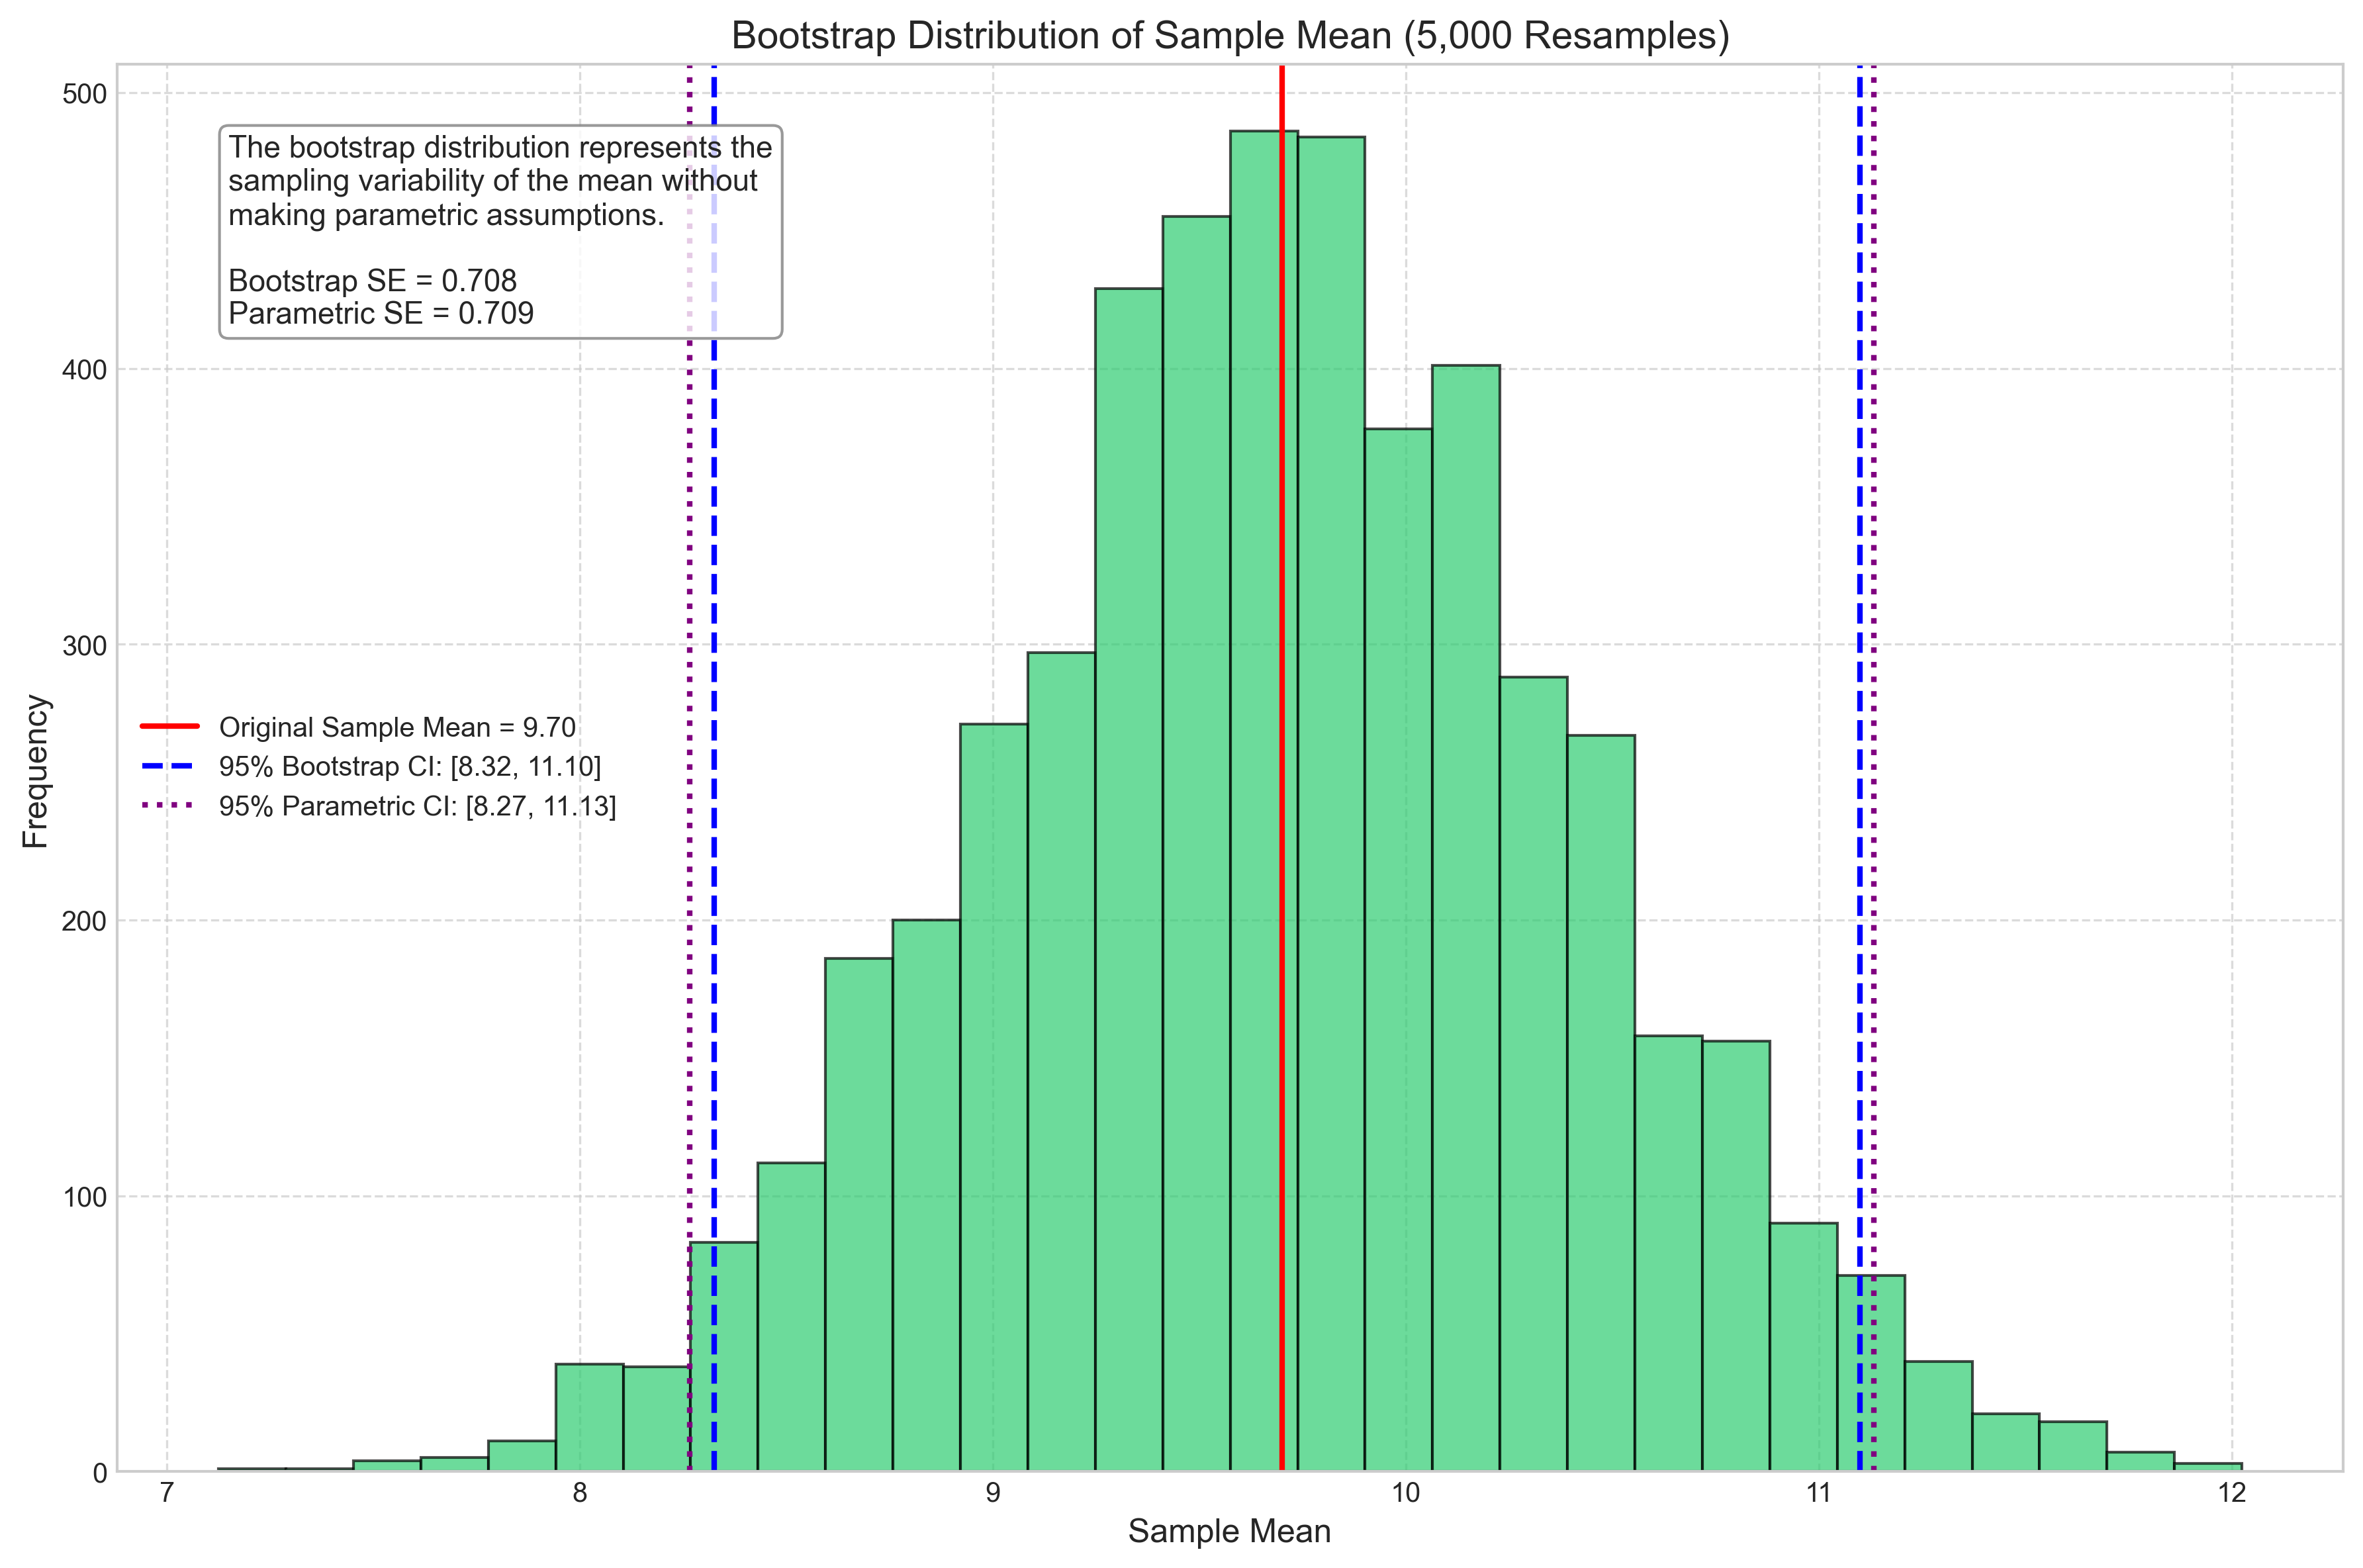


Comparison of Bootstrap vs. Parametric Methods:
Bootstrap Mean: 9.703
Original Sample Mean: 9.700

Bootstrap Standard Error: 0.708
Parametric Standard Error: 0.709

95% Bootstrap CI: [8.325, 11.100], width = 2.775
95% Parametric CI: [8.266, 11.134], width = 2.869


In [15]:
# Simulate memory recall data
def simulate_recall_data(n_subjects):
    """Simulate data from a memory recall experiment
    
    Args:
        n_subjects: Number of participants
        
    Returns:
        Array of recall scores (0-20 items)
    """
    # Each subject's recall score (out of 20 items)
    # We'll use a slightly skewed distribution (common in recall tasks)
    np.random.seed(42)
    return np.random.negative_binomial(10, 0.5, n_subjects)

# Generate original data sample
sample_size = 40
original_data = simulate_recall_data(sample_size)

# Display original data
plt.figure(figsize=(10, 6))
plt.hist(original_data, bins=range(21), color='#3498db', alpha=0.7, edgecolor='black')
plt.axvline(np.mean(original_data), color='red', linestyle='--', 
           label=f'Sample Mean = {np.mean(original_data):.2f}')
plt.title('Original Sample: Memory Recall Scores (n=40)', fontsize=14)
plt.xlabel('Number of Items Recalled (out of 20)', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.xticks(range(0, 21, 2))
plt.xlim(-0.5, 20.5)
plt.legend()
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

# Print summary statistics
print("Original Sample Summary Statistics:")
print(f"Mean: {np.mean(original_data):.2f}")
print(f"Median: {np.median(original_data):.2f}")
print(f"Standard Deviation: {np.std(original_data, ddof=1):.2f}")
print(f"Min: {np.min(original_data)}")
print(f"Max: {np.max(original_data)}")

# Test normality of the data
w, p_shapiro = stats.shapiro(original_data)
print(f"\nShapiro-Wilk test for normality: W = {w:.3f}, p = {p_shapiro:.4f}")
print(f"Inference: Data {'appears normally distributed' if p_shapiro > 0.05 else 'deviates from normality'} (at α = 0.05)")

# Now implement the bootstrap
def bootstrap_mean(data, n_bootstrap=5000):
    """Bootstrap the mean of a dataset
    
    Args:
        data: Original data sample
        n_bootstrap: Number of bootstrap samples to generate
        
    Returns:
        Array of bootstrap means
    """
    bootstrap_means = np.zeros(n_bootstrap)
    for i in range(n_bootstrap):
        # Draw a bootstrap sample (with replacement)
        bootstrap_sample = np.random.choice(data, size=len(data), replace=True)
        # Calculate the mean of this bootstrap sample
        bootstrap_means[i] = np.mean(bootstrap_sample)
    return bootstrap_means

# Generate bootstrap distribution for the mean
n_bootstrap = 5000
bootstrap_distribution = bootstrap_mean(original_data, n_bootstrap)

# Calculate bootstrap confidence intervals
# 1. Percentile method (simple)
ci_percentile = np.percentile(bootstrap_distribution, [2.5, 97.5])

# 2. BCa method (bias-corrected and accelerated)
# This is more complex but more accurate, especially for skewed distributions
# For simplicity, we'll just use the percentile method here

# Calculate standard error from bootstrap
bootstrap_se = np.std(bootstrap_distribution, ddof=1)

# For comparison: Calculate parametric confidence interval
parametric_se = np.std(original_data, ddof=1) / np.sqrt(len(original_data))
t_critical = stats.t.ppf(0.975, len(original_data)-1)  # 95% CI
parametric_ci = [np.mean(original_data) - t_critical * parametric_se,
                np.mean(original_data) + t_critical * parametric_se]

# Visualize the bootstrap distribution
plt.figure(figsize=(12, 8))

# Create the histogram
plt.hist(bootstrap_distribution, bins=30, color='#2ecc71', alpha=0.7, edgecolor='black')

# Add lines for original mean and confidence intervals
plt.axvline(np.mean(original_data), color='red', linestyle='-', linewidth=2,
           label=f'Original Sample Mean = {np.mean(original_data):.2f}')

plt.axvline(ci_percentile[0], color='blue', linestyle='--', linewidth=2,
           label=f'95% Bootstrap CI: [{ci_percentile[0]:.2f}, {ci_percentile[1]:.2f}]')
plt.axvline(ci_percentile[1], color='blue', linestyle='--', linewidth=2)

plt.axvline(parametric_ci[0], color='purple', linestyle=':', linewidth=2,
           label=f'95% Parametric CI: [{parametric_ci[0]:.2f}, {parametric_ci[1]:.2f}]')
plt.axvline(parametric_ci[1], color='purple', linestyle=':', linewidth=2)

# Format the plot
plt.title('Bootstrap Distribution of Sample Mean (5,000 Resamples)', fontsize=14)
plt.xlabel('Sample Mean', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.legend()
plt.grid(True, linestyle='--', alpha=0.7)

# Add annotations
bootstrap_annotation = (
    "The bootstrap distribution represents the\n"
    "sampling variability of the mean without\n"
    "making parametric assumptions.\n\n"
    f"Bootstrap SE = {bootstrap_se:.3f}\n"
    f"Parametric SE = {parametric_se:.3f}"
)

plt.annotate(
    bootstrap_annotation,
    xy=(0.05, 0.95), xycoords='axes fraction',
    bbox=dict(boxstyle="round,pad=0.3", fc="white", ec="gray", alpha=0.8),
    ha='left', va='top', fontsize=11
)

plt.tight_layout()
plt.show()

# Compare bootstrap and parametric estimates
print("\nComparison of Bootstrap vs. Parametric Methods:")
print(f"Bootstrap Mean: {np.mean(bootstrap_distribution):.3f}")
print(f"Original Sample Mean: {np.mean(original_data):.3f}")
print()
print(f"Bootstrap Standard Error: {bootstrap_se:.3f}")
print(f"Parametric Standard Error: {parametric_se:.3f}")
print()
print(f"95% Bootstrap CI: [{ci_percentile[0]:.3f}, {ci_percentile[1]:.3f}], width = {ci_percentile[1] - ci_percentile[0]:.3f}")
print(f"95% Parametric CI: [{parametric_ci[0]:.3f}, {parametric_ci[1]:.3f}], width = {parametric_ci[1] - parametric_ci[0]:.3f}")

### 4.2 Advantages of Bootstrap in Psychological Research

The bootstrap method offers several advantages for psychological researchers:

1. **No distributional assumptions**: Unlike parametric methods, bootstrapping doesn't require the data to follow a specific distribution.

2. **Works with small samples**: Though still affected by small sample sizes, bootstrapping can provide more accurate inferences than parametric methods when assumptions are violated.

3. **Applicable to complex statistics**: Can estimate sampling distributions for statistics without known formulas (e.g., medians, correlation differences).

4. **Handles outliers better**: Less sensitive to extreme values than traditional methods.

5. **Provides visual representation**: The bootstrap distribution gives an intuitive picture of sampling variability.

Let's demonstrate the bootstrap for a more complex statistic - the difference between two correlations:

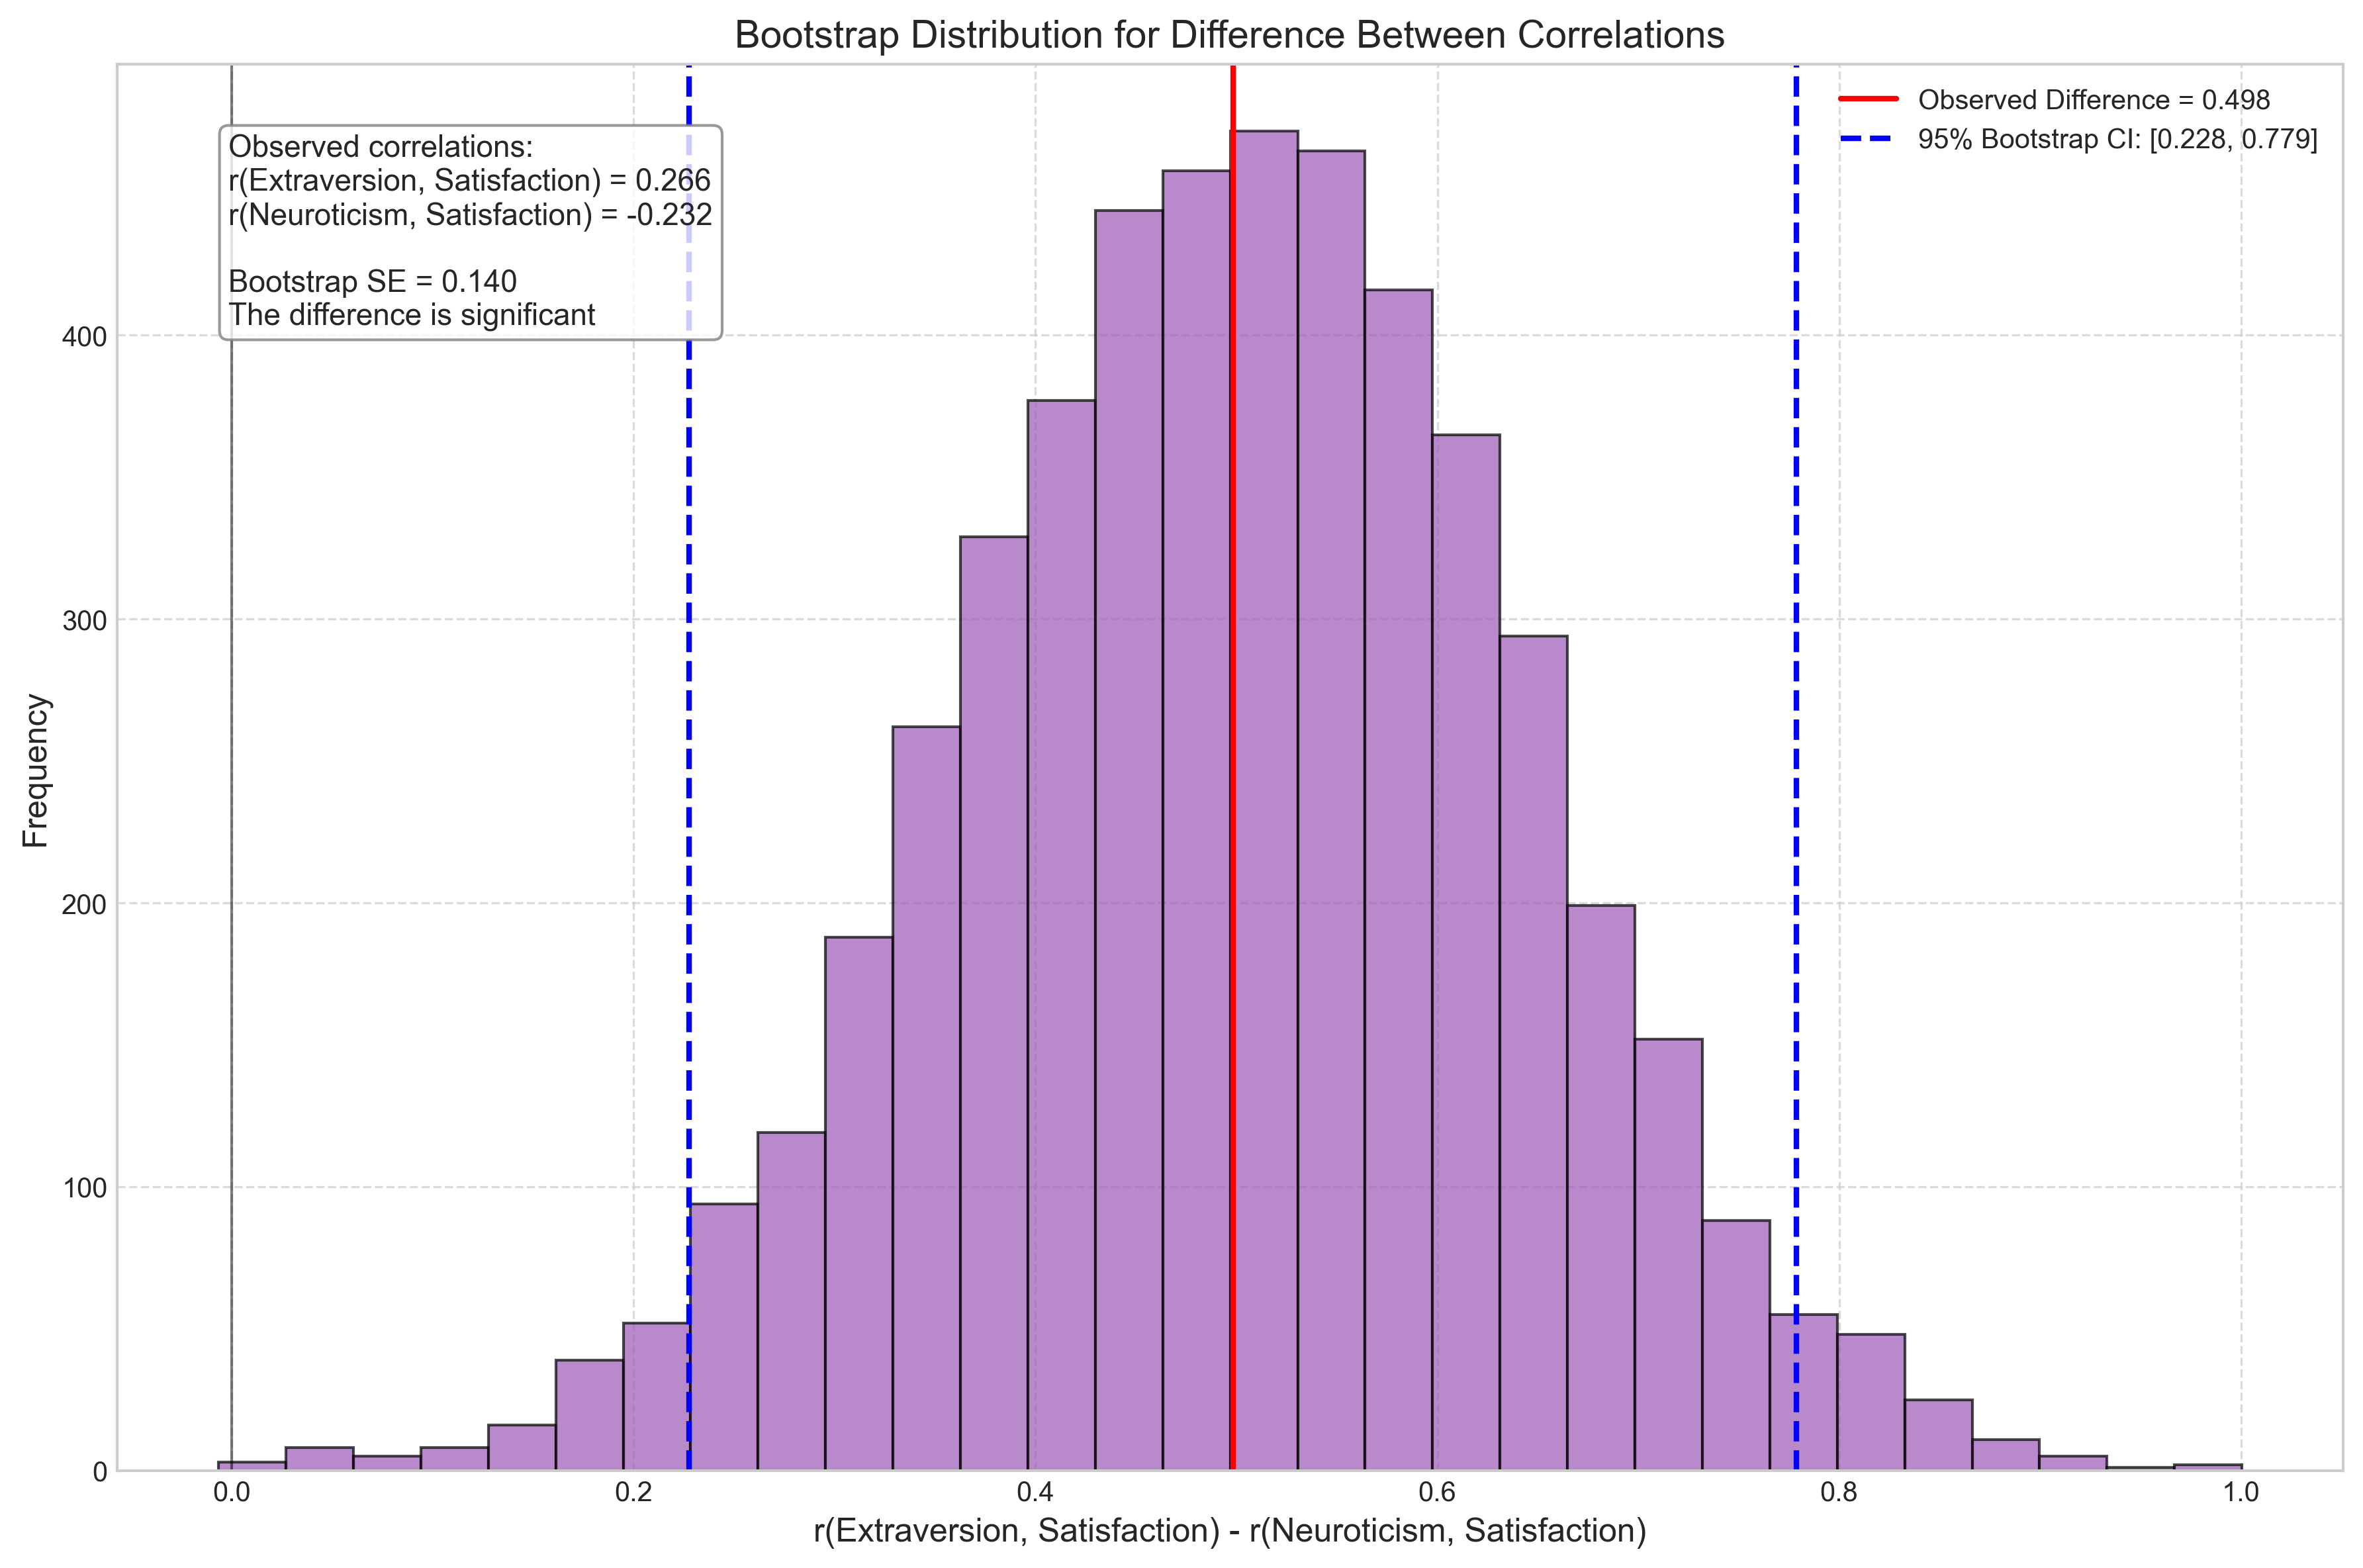

Bootstrap Analysis of Correlation Difference:
Observed r(Extraversion, Satisfaction) = 0.266
Observed r(Neuroticism, Satisfaction) = -0.232
Observed difference = 0.498

Bootstrap mean difference = 0.502
Bootstrap standard error = 0.140
95% Bootstrap CI = [0.228, 0.779]

The difference between correlations is statistically significant (95% CI doesn't include zero).
Extraversion has a significantly stronger relationship with social satisfaction than neuroticism.


In [16]:
# Demonstrate bootstrap for complex statistics
# Example: Bootstrapping the difference between two correlations

# Simulate data: personality traits and outcomes
np.random.seed(123)
n_subjects = 50

# Generate correlated variables using multivariate normal distribution
# Extraversion has a correlation of 0.4 with Social Satisfaction
# Neuroticism has a correlation of 0.2 with Social Satisfaction
cov_matrix = [[1.0, 0.0, 0.4],    # Extraversion
              [0.0, 1.0, -0.2],   # Neuroticism
              [0.4, -0.2, 1.0]]   # Social Satisfaction

data = np.random.multivariate_normal([0, 0, 0], cov_matrix, n_subjects)
extraversion = data[:, 0]
neuroticism = data[:, 1]
social_satisfaction = data[:, 2]

# Calculate correlations
r_extraversion = np.corrcoef(extraversion, social_satisfaction)[0, 1]
r_neuroticism = np.corrcoef(neuroticism, social_satisfaction)[0, 1]
correlation_diff = r_extraversion - r_neuroticism

# Bootstrap the difference in correlations
def bootstrap_correlation_diff(x1, x2, y, n_bootstrap=5000):
    """Bootstrap the difference between two correlations with the same outcome variable
    
    Args:
        x1: First predictor variable
        x2: Second predictor variable
        y: Outcome variable
        n_bootstrap: Number of bootstrap samples
        
    Returns:
        Array of bootstrap differences between correlations
    """
    bootstrap_diffs = np.zeros(n_bootstrap)
    combined_data = np.column_stack((x1, x2, y))
    
    for i in range(n_bootstrap):
        # Draw a bootstrap sample
        indices = np.random.choice(len(y), size=len(y), replace=True)
        bootstrap_sample = combined_data[indices]
        
        # Calculate correlations
        bootstrap_r1 = np.corrcoef(bootstrap_sample[:, 0], bootstrap_sample[:, 2])[0, 1]
        bootstrap_r2 = np.corrcoef(bootstrap_sample[:, 1], bootstrap_sample[:, 2])[0, 1]
        
        # Calculate the difference
        bootstrap_diffs[i] = bootstrap_r1 - bootstrap_r2
    
    return bootstrap_diffs

# Run the bootstrap
bootstrap_diffs = bootstrap_correlation_diff(extraversion, neuroticism, social_satisfaction)

# Calculate bootstrap confidence interval
ci_bootstrap = np.percentile(bootstrap_diffs, [2.5, 97.5])

# Traditional test for difference between dependent correlations
# We'd need to use a specialized test like Steiger's Z-test
# For simplicity, we'll just focus on the bootstrap results

# Visualize the results
plt.figure(figsize=(12, 8))

# Plot the bootstrap distribution
plt.hist(bootstrap_diffs, bins=30, color='#9b59b6', alpha=0.7, edgecolor='black')

# Add reference lines
plt.axvline(correlation_diff, color='red', linestyle='-', linewidth=2,
           label=f'Observed Difference = {correlation_diff:.3f}')
plt.axvline(ci_bootstrap[0], color='blue', linestyle='--', linewidth=2,
           label=f'95% Bootstrap CI: [{ci_bootstrap[0]:.3f}, {ci_bootstrap[1]:.3f}]')
plt.axvline(ci_bootstrap[1], color='blue', linestyle='--', linewidth=2)
plt.axvline(0, color='black', linestyle='-', linewidth=1, alpha=0.5)

# Format the plot
plt.title('Bootstrap Distribution for Difference Between Correlations', fontsize=14)
plt.xlabel('r(Extraversion, Satisfaction) - r(Neuroticism, Satisfaction)', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.legend()
plt.grid(True, linestyle='--', alpha=0.7)

# Add annotation
plt.annotate(
    f"Observed correlations:\n"
    f"r(Extraversion, Satisfaction) = {r_extraversion:.3f}\n"
    f"r(Neuroticism, Satisfaction) = {r_neuroticism:.3f}\n\n"
    f"Bootstrap SE = {np.std(bootstrap_diffs, ddof=1):.3f}\n"
    f"{'The difference is significant' if 0 < ci_bootstrap[0] or 0 > ci_bootstrap[1] else 'The difference is not significant'}",
    xy=(0.05, 0.95), xycoords='axes fraction',
    bbox=dict(boxstyle="round,pad=0.3", fc="white", ec="gray", alpha=0.8),
    ha='left', va='top', fontsize=11
)

plt.tight_layout()
plt.show()

# Print summary
print("Bootstrap Analysis of Correlation Difference:")
print(f"Observed r(Extraversion, Satisfaction) = {r_extraversion:.3f}")
print(f"Observed r(Neuroticism, Satisfaction) = {r_neuroticism:.3f}")
print(f"Observed difference = {correlation_diff:.3f}")
print()
print(f"Bootstrap mean difference = {np.mean(bootstrap_diffs):.3f}")
print(f"Bootstrap standard error = {np.std(bootstrap_diffs, ddof=1):.3f}")
print(f"95% Bootstrap CI = [{ci_bootstrap[0]:.3f}, {ci_bootstrap[1]:.3f}]")
print()
if 0 < ci_bootstrap[0] or 0 > ci_bootstrap[1]:
    print("The difference between correlations is statistically significant (95% CI doesn't include zero).")
    print("Extraversion has a significantly stronger relationship with social satisfaction than neuroticism.")
else:
    print("The difference between correlations is not statistically significant (95% CI includes zero).")

## 5. Summary and Best Practices

In this chapter, we've explored sampling methods and statistical inference in behavioral psychology through detailed examples and visualizations. Let's summarize the key points and best practices for researchers.

In [17]:
# Create a visual summary of best practices
# Display as a nicely formatted table

best_practices = pd.DataFrame([
    ['Sampling', 'Clearly define the target population before sampling', 
     'Helps ensure that inferences are applicable to the intended group'],
    ['Sampling', 'Use probability sampling methods when possible',
     'Reduces selection bias and allows for statistical inference'],
    ['Sampling', 'If using convenience sampling, explicitly acknowledge limitations',
     'Improves transparency and appropriate interpretation of results'],
    ['Sampling', 'Report detailed demographic information about your sample',
     'Allows readers to evaluate representativeness'],
    ['Power Analysis', 'Conduct a priori power analysis to determine sample size',
     'Ensures adequate power to detect effects of interest'],
    ['Power Analysis', 'Base power analysis on realistic (often conservative) effect sizes',
     'Avoids underpowered studies that cannot detect true effects'],
    ['Power Analysis', 'Consider practical constraints alongside statistical power',
     'Balances scientific rigor with feasibility'],
    ['Inference', 'Check statistical assumptions before conducting tests',
     'Prevents invalid inferences based on violated assumptions'],
    ['Inference', 'Report effect sizes alongside p-values',
     'Communicates practical significance, not just statistical significance'],
    ['Inference', 'Use appropriate corrections for multiple comparisons',
     'Controls familywise error rate or false discovery rate'],
    ['Inference', 'Consider Bayesian methods when prior information is available',
     'Allows integration of existing knowledge and direct probability statements about hypotheses'],
    ['Inference', 'Use bootstrap methods for complex statistics or when assumptions are violated',
     'Provides robust inference without parametric assumptions'],
    ['Transparency', 'Preregister hypotheses and analysis plans when possible',
     'Distinguishes confirmatory from exploratory analyses'],
    ['Transparency', 'Report all conducted analyses, not just significant results',
     'Reduces publication bias and p-hacking'],
    ['Transparency', 'Provide raw data or summary statistics',
     'Enables verification and meta-analysis']
], columns=['Area', 'Best Practice', 'Rationale'])

# Display with nicer formatting
styled_practices = best_practices.style.set_properties(**{
    'text-align': 'left',
    'white-space': 'pre-wrap',
    'font-size': '11pt',
    'border': '1px solid gray'
}).set_table_styles([
    {'selector': 'th', 'props': [('text-align', 'center'), ('font-weight', 'bold'), 
                                ('background-color', '#f0f0f0')]},
    {'selector': 'caption', 'props': [('font-size', '14pt'), ('font-weight', 'bold')]}
]).set_caption('Best Practices for Sampling and Statistical Inference in Psychological Research')

display(styled_practices)

### 5.1 Key Concepts Reviewed

Throughout this chapter, we've explored several critical concepts in sampling and statistical inference:

1. **Sampling Methods**
   - Different approaches to participant selection
   - Impact of sampling method on research validity
   - Practical considerations in behavioral studies

2. **Sample Size Determination**
   - Power analysis for different research designs
   - Relationship between sample size, effect size, and power
   - Practical sample size determination for different tests

3. **Statistical Inference**
   - Point estimation and confidence intervals
   - Hypothesis testing and p-values
   - Multiple comparison corrections
   - Bayesian approaches to inference

4. **Bootstrap Methods**
   - Resampling techniques for robust inference
   - Applications to complex statistics
   - Advantages over parametric methods

### 5.2 Conclusion

Effective sampling and appropriate statistical inference are foundational to valid psychological research. By understanding these concepts and following best practices, researchers can:

- Design studies with adequate power to detect effects of interest
- Draw valid conclusions from sample data
- Quantify uncertainty appropriately
- Balance statistical rigor with practical constraints

Remember that statistical methods are tools to aid scientific inference, not rigid rules. Always consider the specific context of your research question, the nature of your data, and the practical implications of your findings when designing studies and analyzing results.